# Citations

In [18]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://scikit-learn.org/stable/supervised_learning.html#supervised-learning">Scikit Learn Documentation</a>""")
       )
display(HTML("""<a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">Principal Component Analysis</a>""")
       )
display(HTML("""<a href="https://xgboost.readthedocs.io/en/latest/python/index.html">XG Boost Documentation</a>""")
       )
display(HTML("""<a href="https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html">CAT Boost Documentation</a>""")
       )
display(HTML("""<a href="https://plotly.com/python/3d-scatter-plots">Plotly 3D Scatter Plots</a>""")
       )
display(HTML("""<a href="https://seaborn.pydata.org/api.html">Seaborn</a>""")
       )
display(HTML("""<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html">Pandas</a>""")
       )
       
       

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
#Loading training set into dataframe
df = pd.read_csv('./KDDTrain+.txt', header=None)
print(df.shape)


(125973, 43)


In [5]:
#Loading testing set into dataframe query points
qp = pd.read_csv('./KDDTest+.txt', header=None)
print(qp.shape)


(22544, 43)


In [6]:
#Reset column names for training set
#obtained by domain knowledge
#present in the arff file
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
#Reset column names for testing set
#obtained by domain knowledge
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,subclass,difficulty_level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [8]:
#check for NAN values
print(df.isnull().values.any())
print(qp.isnull().values.any())

False
False


In [9]:
#combining the two data
combined_data = pd.concat([df,qp])
combined_data.shape

(148517, 43)

# saving the data file original - raw

In [10]:
#save the raw file as data_1.csv
combined_data.to_csv('raw_data.csv', index=False) 

#these are all the attack categories
# Here we are printing the label column which is denoted from the subclass in the data.
# Also printing the unique values only with the help of unique function.

print(combined_data['subclass'].unique())



['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']


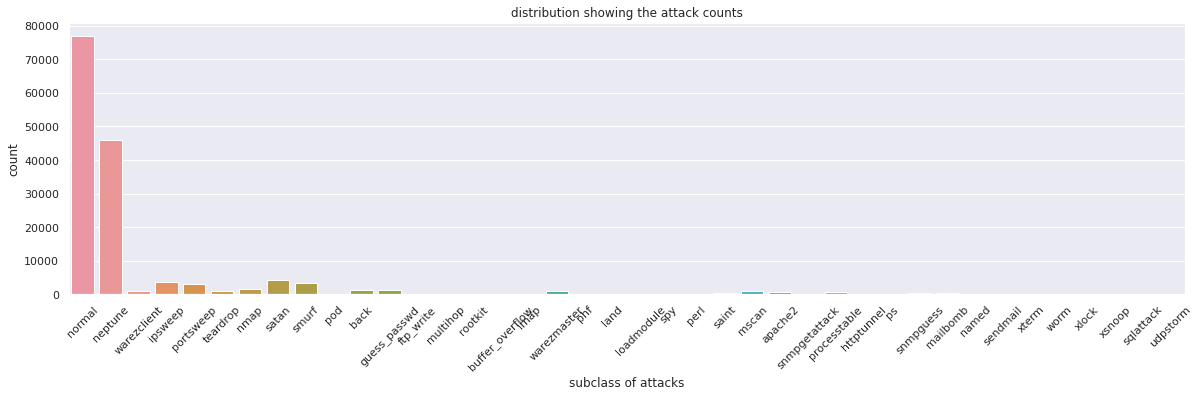

In [11]:
#takes some time to plot represents horizontal count plot for all the features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
chart=sns.countplot(x='subclass', data=combined_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel('subclass of attacks')
plt.title("distribution showing the attack counts")
plt.show()

In [12]:
#Dropping subclass column for training set
y = combined_data.pop('subclass') #these are basically the labels
#let's now check the shape
combined_data.shape

(148517, 42)

# eda on raw data

In [13]:
#datafile_2 
#classifying broadly the attack types into roughly 4 categories

#Fixing labels for training set
classlist = []
category_1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
category_2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
category_3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
category_4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for item in y:
    if item in category_1:
        classlist.append("DoS") #because category 1 denotes dos
    elif item in category_2:
        classlist.append("Probe") #category 2 denotes probe type 
    elif item in category_3:
        classlist.append("U2R") #this is some third type
    elif item in category_4:
        classlist.append("R2L")#fourth type
    else:
        classlist.append("Normal")#finally the majority points


In [14]:
#once we have generated the cheklist we wanna add this to the original data frame
#these now the data should have only 5 categories
combined_data["Class"] = classlist
#let's now check the shape
combined_data.shape

(148517, 43)

In [15]:
#print columns now
print("subclass" in list( combined_data.columns)) #subclass is absent
print("Class" in list( combined_data.columns)) #class is present

False
True


In [16]:
print(combined_data["Class"].value_counts())

Normal    77232
DoS       53387
Probe     14077
R2L        3702
U2R         119
Name: Class, dtype: int64


# saving the transformed data into 5 categories

In [17]:
#save the raw file as data_1.csv
combined_data.to_csv('categorized.csv', index=True) 

#these are all the attack categories
print(combined_data['Class'].unique())

['Normal' 'DoS' 'R2L' 'Probe' 'U2R']


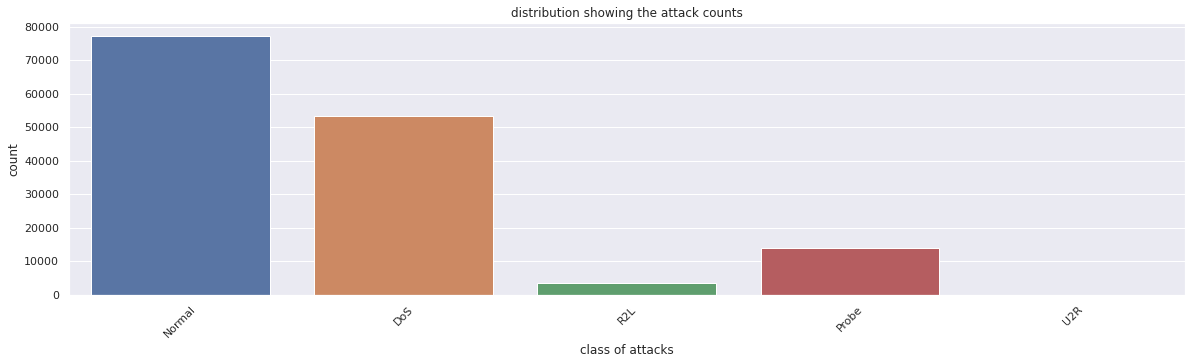

<function print>

In [18]:
#new attack counts for five categories
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
sns.set(style="darkgrid")
chart=sns.countplot(x='Class', data=combined_data)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.xlabel('class of attacks')
plt.title("distribution showing the attack counts")
plt.show()
print

In [19]:
combined_data.describe()
print(combined_data.shape)

(148517, 43)


In [20]:
#add the distribution plots for certain variables showing the relevance of class across the variable

(39, 39)


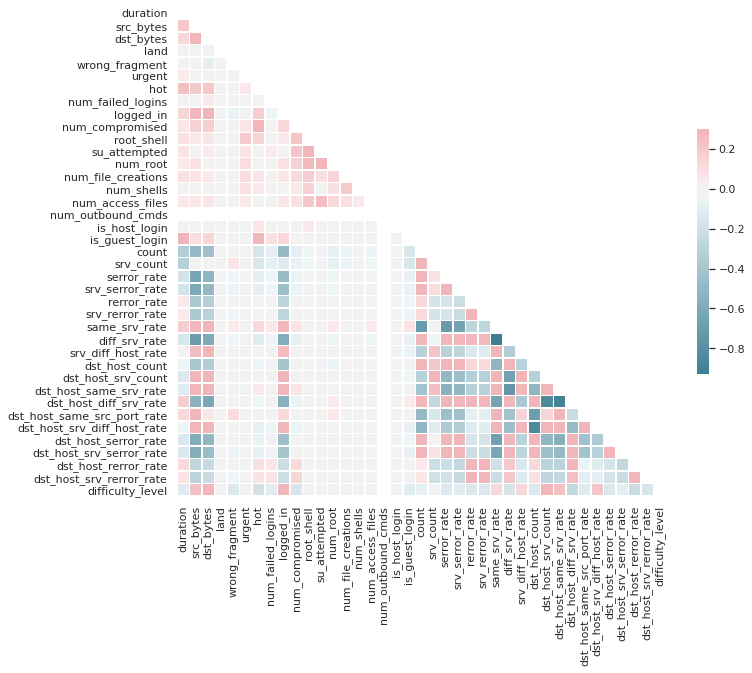

In [21]:
#spearman coefficiant plot

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = combined_data.corr(method="spearman")
print(corr.shape)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
#we deleted num outbounds because a col with 0 mean and 0 deviation
combined_data.pop('num_outbound_cmds')
print(combined_data.shape)

(148517, 42)


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


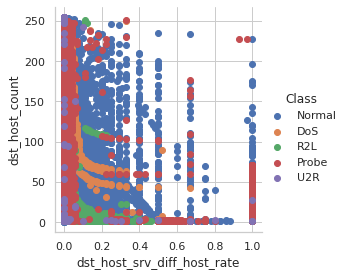

In [ ]:
#plot a few variables to prove the relations found in the correlation heat maps
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(combined_data, hue="Class", size=4) \
   .map(plt.scatter, "dst_host_srv_diff_host_rate", "dst_host_count") \
   .add_legend();
plt.show();

import plotly.express as px

fig = px.scatter_3d(combined_data, x='dst_host_srv_diff_host_rate', y='dst_host_count', z='dst_host_same_srv_rate',
              color='Class')
fig.show()

In [ ]:
#another set of important features
sns.set_style("whitegrid");
sns.FacetGrid(combined_data, hue="Class", size=4) \
   .map(plt.scatter, "same_srv_rate", "logged_in") \
   .add_legend();
plt.show();

import plotly.express as px

fig = px.scatter_3d(combined_data, x='dst_host_srv_diff_host_rate', y='same_srv_rate', z='logged_in',
              color='Class')
fig.show()

In [ ]:
sns.boxplot(x='Class',y='num_access_files', data=combined_data)
plt.show()

#write conclusions based on the box plot that shows the outliers

now we will apply one hot encoding to certain columns of the dataset 

In [88]:
combined_data.describe()


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [89]:
print(list(combined_data.columns))
print(combined_data.shape)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'Class']
(148517, 42)


In [23]:
x=combined_data.iloc[:,:43]
y=combined_data.iloc[:,-1]

def label_encoding(x):
    mapping_dict={'Normal':0, 'DoS':1, 'R2L':2, 'Probe':3, 'U2R':4}
    return mapping_dict[x]

combined_data["Class"]=combined_data["Class"].map(label_encoding)


brilliant blog at preprocessing - https://www.analyticsvidhya.com/blog/2016/07/practical-guide-data-preprocessing-python-scikit-learn/

In [24]:
#select which to choose between scaing and standardization

#just select all the columns with numerical entries

import matplotlib.pyplot as plt
t_combined_data=combined_data.select_dtypes(include=[np.float64,np.int64])

print(combined_data.shape,t_combined_data.shape)

x=t_combined_data.iloc[:,:43]
y=t_combined_data.iloc[:,-1]
print(y)

(148517, 42) (148517, 39)
0        0
1        0
2        1
3        0
4        0
        ..
22539    0
22540    0
22541    1
22542    0
22543    3
Name: Class, Length: 148517, dtype: int64


# Min Max scaling for testing (not to be used)

In [92]:
#applying min max scaling to test performance
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAvAAAAKhCAYAAAA2dJooAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOzdeViVdf7/8efhHEBlyVxSU8otUUnD3LXcGzcQENFKzaX0ajVtyA331ERxDC0qdSZLh3QQFDFMM8elEXDMX6XlkqgQ5m4IqAgH+P3h1zOSIucgqMDrcV3nmnPf92d533de17zPh8/9+Rjy8vLyEBERERGRUsHufgcgIiIiIiLWUwIvIiIiIlKKKIEXERERESlFlMCLiIiIiJQiSuBFREREREoRJfAiIiIiIqWIEngRERERkVJECbyIiIiISCmiBL4cc3d35/Lly8XWXlRUFMePH7ccf/vttwQHBxdb+yIiIiICpvsdgJQeZrMZk6ngfzLr1q3j4Ycfpl69egB0796d7t2736vwRERERMoFJfDlyJYtW/jb3/5G5cqV6dSpEwAnT55k6NChJCQkAJCSkoK/vz8JCQmW70OGDGH37t3069ePunXr8sEHH3Dt2jVycnJ49dVX6du3L5GRkRw4cIDZs2fzwQcfMGHCBE6fPs327dtZvHgxAEuXLmXDhg0ANGvWjClTpuDk5MSSJUs4fvw46enp/Pbbbzz22GOEhoZSsWLF+/OgRERERB5gmkJTTly4cIGpU6cSFhbG6tWrsbe3t6peamoqDRo04Msvv+SFF16gadOmhIeHs379ej777DOCg4O5dOkS/v7+PPnkk0yZMoXo6Gg6dOiQr50dO3awYcMGVq9eTUxMDDk5OYSFhVmuHzhwgIULF7Jp0ybMZjMxMTHFev8iIiIiZYUS+HLihx9+oGnTptSvXx+AQYMGWVXP0dGR3r17W44vXrzImDFj8PLy4uWXX+bSpUv55r0XJC4ujj59+uDs7IzBYGDgwIHExcVZrj/zzDO4urpiMBho3rw5ycnJNt6hiIiISPmgBL6cyMvLu+15V1fXfNeuXbuW73rFihUxGAyW4xkzZtCmTRtiYmKIjo6mZs2at9QpqP+b2/kzR0dHy3ej0UhOTk6hbYqIiIiUR0rgy4kWLVrwyy+/cOLECQAiIiIAcHFxITs7m6SkJAA2btx4x3bS09OpXbs2BoOB//znP5Z6AE5OTqSnp9+2XocOHYiNjSUjI4O8vDzWrl17yzQbERERESmcXmItJ6pWrcp7773Hq6++SuXKlenVq5flWlBQECNGjKB27dq0bdv2ju389a9/ZebMmSxbtgx3d3fc3d0t1wYNGkRwcDD/+Mc/GD9+fL56nTt35vDhwzz//PMAPPnkk7z22mvFeIciIiIi5YMhr6C5FSIiIiIi8sDRFBoRERERkVJECbyIiIiISCmiOfBSJlyO32t1Wad2rUowEhEREZGSpRF4EREREZFSRAm8iIiIiEgpogReCpWQkED//v1trhcVFWXVLq0iIiIiYj0l8OXQvdrldN26dZaNo0RERESkeOgl1jLm6tWrTJgwgaNHj2IymahXrx4vvvgic+fOpVWrVuzfv5/XXnuNxx57jDlz5nDu3DkARo4ciZ+fX4Htms1mJk2axKFDhzAajcybN4+GDRsyatQo/P39LRtDbdmyhdWrV9O3b18OHDjA7Nmz+eCDD5gwYQIdOnRg2bJlbN68mZycHGrUqMF7771H9erV2bp1K6GhodjZ2ZGTk8PUqVML3VRKREREpDxSAl/GfPfdd6SlpREbGwvApUuXOHToEEeOHGHGjBlMnToVs9lM3759GTt2LL179wbgjz/+uGO7hw8fZsqUKbRp04Z169Yxfvx4oqKiGDp0KMuWLbMk8P/85z8ZOnQoPXr0YP369YwcOZKuXbsCEB0dTXJyMv/617+ws7MjPDycefPmsXDhQhYvXsz06dNp1aoVOTk5XL16tQSfkoiIiEjppSk0ZUzjxo05duwYM2fOZNOmTTg4OADw+OOP06JFCwCOHz+O2Wy2JO8ADz/88B3bffzxx2nTpg0APj4+HDlyhIyMDJ599lnOnz9PYmIiiYmJ/Pbbb5aE/c+2bdvG7t278fPzw8fHh/DwcE6ePAlAu3btmDdvHsuXLycxMRFnZ+e7fhYiIiIiZZFG4MsYNzc3YmNjiY+PZ+fOnSxatIgpU6ZQqVIlS5m8vLxi689gMDB48GDCw8MBGDRoEEaj8bZl8/LyeO211xgwYMAt1yZPnszhw4eJj4/n7bffZsSIEQwcOLDY4hQREREpKzQCX8acPn0ao9FIjx49mDRpEhcvXuTSpUv5ytSvXx+TycSmTZss5wqbQpOUlMTevdc3S4qJiaFRo0aWUXJfX1+2bt1KbGwsAQEBljpOTk6kp6dbjrt160Z4eLglnqysLA4dOgTAsWPHcHd3Z9iwYfTr14/9+/ffxVMQERERKbs0Al/GHD58mIULFwKQm5vL6NGjeeSRR/KVMZlMhIWFMWvWLMLCwjAYDIwcORJfX98C223SpAkbN25k7ty52NnZMX/+fMs1Z2dnnn32WTIzM6lSpYrl/KBBgwgODuYf//gH48ePx9fXl9TUVIYMGQJcH5F/4YUXaNy4MQsXLiQpKQmj0Yirqytz5swpzsciIiIiUmYY8opzPoWUS2azmX79+jFv3jyaN29+v8MRERERKdM0hUbuyrfffstzzz1Hx44dlbyLiIiI3AMagReLV199lVOnTuU7V6tWLT755JP7FJH1Mg8dsbpshcaNSNv0jdXlXXs/V5SQREREREqE5sCLRWlI1EVERETKO02hKePc3d25fPnyba+lpKSwZs2aQtuIiopizJgxNve9YsUKLly4YHM9ERERESmYEvhy7OTJk1Yl8EX1xRdfKIEXERERKWaaQlPGbNmyhb/97W9UrlyZTp06AdeXaxwzZgxHjx7FZDJRr149QkNDmTVrFikpKfj4+PD444+zePHiAttNT0/nrbfeIikpicqVK7NgwQJq1KiBl5cXc+fOtbzA+tlnn3Hs2DEeffRRzp49y5gxY3B0dGThwoU89thjLFq0iP/+979kZ2fTqFEjZsyYgZOTE2vWrGHFihU4ODiQm5vLBx98QIMGDe7JMxMREREpTZTAlyEXLlxg6tSpfPnll9SvX59ly5YBsHXrVtLS0oiNjQWwbKQ0bdo0goODiYqKKrTt77//nvXr11O/fn0+/PBD5syZw+LFixk8eDBffvklzZs3Jy8vjy+//JLFixfTuHFjIiIiWLx4MY0aNQIgLCwMFxcX1q5dC8CCBQtYunQp48aNY/78+WzcuJFatWqRlZVFTk5OSTwiERERkVJPU2jKkB9++IGmTZtSv3594PpGSgCNGzfm2LFjzJw5k02bNuHg4GBz2y1btrS0GxAQQHx8PHB9F9Zdu3aRmprKrl27qFq1Ko0bN75tG9u2bWPDhg34+Pjg4+PDtm3bSE5OBqBdu3ZMmjSJlStXcubMGSpWrGhzjCIiIiLlgUbgy5CCVgR1c3MjNjaW+Ph4du7cyaJFi4iJibmrfgwGAwAVK1bE29ubqKgo9uzZw+DBg+9Yb/r06bRv3/6Wax9++CH79+8nPj6el156iRkzZtC5c+cixygiIiJSVmkEvgxp0aIFv/zyCydOnAAgIiICuD5/3Wg00qNHDyZNmsTFixdJTU3F2dmZjIwMq9ret2+fpd2oqCjatm1rufbiiy/y+eefc+DAAf7yl79Yzjs5OZGenm457tatGytWrCAzMxOAjIwMEhMTMZvN/PbbbzRv3pzRo0fTsWNHDh48eDePQkRERKTM0gh8GVK1alXee+89Xn31VSpXrkyvXr0A+OWXX/jggw8AyM3NZfTo0dSoUYOqVatSr149vLy8qF+//h1fYm3dujVLlizh119/tbzEeoObmxv169enefPm+abnvPTSS0yePJkKFSqwcOFCRo8ezYcffsiAAQMwGAwYDAbefPNN3NzcmDhxIunp6RgMBmrVqsVf//rXEnpKIiIiIqWbdmKVu5aRkUGvXr1Yu3YtNWvWvC8xaCdWERERKS+UwMtd+fLLL/n4448ZPnw4I0eOvN/hiIiIiJR5SuDFon///rcs3/jUU08xa9as+xSR9W6ea18YFxcXm8sXpQ8RERGRkqAEXsoEJfAiIiJSXmgVGrlr7u7uXL58udjaS0lJybfKjYiIiIj8jxJ4EREREZFSRMtISrEKDg5mz549ZGdn8/DDDzN37lxq165NSkoK/v7+PP/88+zYsYOrV68yZ84cWrVqBcA///lPVqxYQfXq1WnTps19vgsRERGRB5dG4KVYjRo1isjISDZs2ICXlxchISGWa6mpqXh6erJ+/XreeOMNy7VDhw7x8ccf8+WXXxIeHk5qaur9Cl9ERETkgacReClWO3fuJDw8nCtXrmA2m/Ndq1SpEl27dgXA09OT4OBgAPbs2UOXLl2oVq0aAIMGDWLTpk33NnARERGRUkIJvBSbkydP8v7777N27Vrc3NzYt28fgYGBlus379JqZ2dnSfC1EJKIiIiI9TSFRopNRkYG9vb2VK9endzcXFavXm1VvbZt27Jjxw4uXLgAwNq1a0syTBEREZFSTSPwUmzc3d3p1asXffv25dFHH6V169bs3bu30HqNGzfm1Vdf5YUXXqBatWp06dKl5IMVERERKaW0kZOUCdrISURERMoLJfAiIiIiIqWI5sCLiIiIiJQimgMvZcK9mELze2qG1XUereysKTciIiJSIjQCLyIiIiJSiiiBFxEREREpRZTAl0GTJk2ib9++jB079n6HYpODBw8SGxt7v8MQEREReaBpDvw9YDabMZnuzaM+f/48mzdvZu/evdjZ3fr7LCcnB6PReE9isdXBgwfZvn07ffr0ud+hiIiIiDywlMAXwerVqzl8+DDTp0/np59+IiAggIiICJo3b86MGTNo0qQJ06ZN491332XHjh20bNmSIUOGMH36dJKTkwF4+eWX8fX1BaBbt274+Piwe/duzp07x8iRIxkyZAgAe/fuZebMmcD1HUu//fZbPv30Uxo1anRLXBkZGbz00ktkZmbi5+eHn58frq6ufPXVV1SpUoXExETmzJlDXFwcX331FTk5OTg6OlpiBti8eTOLFi2iQoUK9OrVi0WLFrFv3z6cnJxwd3dn7NixbN26ldTUVGbPns3u3bvZtWsXZrOZ0NBQGjRoAMC6desIDw8nJycHZ2dnZsyYQf369YmKimLjxo24urry66+/4uLiwpIlSzCZTCxevJiMjAx8fHxo3bo1U6ZMKfH/liIiIiKljabQFEH79u2Ji4sDIC4ujhYtWhAfH285bt++PQC5ubmsXLmSsWPHMnv2bJ544gliYmL4+9//TkhICEeOHLG0mZmZyZo1a/jiiy9YuHAhly9fJisri3feeYfp06cTExND27Zt+f333wuMy9nZmaVLl+Li4kJ0dDTDhw8HYN++fbz11ltERUXRpEkTfH19iYyMZP369bz99ttMnz4dgAsXLjBt2jQ++eQT1q9fT4UKFW7pw9XVlcjISAIDA3n99ddp2bIl69evx8fHh48//hi4/qNj06ZN/POf/yQqKoqXX36ZyZMnW9rYv38/EyZM4KuvvqJhw4asWrWKhx9+mDFjxtChQweio6OVvIuIiIgUQCPwRfD4449z7do1Tp8+TVxcHO+88w4ff/wx3t7eZGdn89hjjwHg5+dnqRMXF8fEiRMBeOSRR+jcuTMJCQmWkfQb00bq1KmDq6srp0+fJjs7mwoVKtCqVSsAnnvuOVxdXW2O9+mnn7bEBHDgwAE+/fRTLl26hMFg4MSJEwD88MMPNG3alLp16wLg7+/P+++/n6+t3r17A+Dh4QFAly5dAHjyySf55ptvANi2bRuHDh0iICAAgLy8PNLS0vLFU6tWLQCeeuopdu/ebfM9iYiIiJRXSuCLqF27dmzfvp0LFy7Qpk0bZs2axfbt22nbtq2lTKVKlfLVMRgMBR47OjpavhuNRnJycm5bpyicnJws37Oysnj77bdZtWoVHh4enDlzhk6dOgHXE+3C+rsRp52dHQ4ODpbzdnZ2mM1mSzv+/v68/fbbd2wD8t+riIiIiBROU2iKqF27dixdupQWLVoA10eVly1bZpk+82ft27dnzZo1AJw7d44dO3bkS/Zvp379+ly5coXvv/8egK1bt+YbyS6KrKwszGazZQQ8PDzccs3T05Off/6ZpKQkAKKioorUR7du3YiOjub06dPA9RdnDxw4UGg9Z2fbNj8SERERKY+UwBdRu3btOHnypCVhv3Hcrl2725afMmUKhw4dwtvbm5EjRxIYGMgTTzxxxz4cHBxYuHAhM2bMICAggB9//JFq1ard1a6dzs7OjBkzhgEDBjB48OB8fyWoVq0aM2bMYPTo0Tz//PNcu3YNe3t7KlasaFMfrVu3ZuzYsbz22mv069cPLy8vvv3220LrtW/fnqtXr9KvXz9mz55t872JiIiIlAeGvLy8vPsdhBQsIyMDZ2dnAOLj45k4cSLbtm277RKRxd1fZGQka9eu5csvvyyRvkRERETEdpoD/4DbsmULK1asIC8vzzIiX1LJO8DKlSv5+uuvycnJ4aGHHio1I+Hmc+etLmuqXs2mqTo3/uJha5170YeIiIiUPxqBL6X69+9/y8ufTz31FLNmzbpPEd1fSuBFRESkvNAIfClV1BdMH3QrVqzA29ubqlWr3u9QRERERB5IeolViuTGkpHF7YsvvuDChQsl0raIiIhIWaAEXvJJSUnJt7zljeMb/7tkyRJeeOEFIiIiOHr0KAEBAXh5eREYGMjAgQP597//DcDZs2ctq914e3vzySefWNrs1q0boaGhDBo0iG7durFq1SoAPv74Y0s9Hx8fjh49em9vXkRERKQU0BQasVpqaioNGjTgrbfeAq7Pwx82bBg+Pj7s37+fgQMHWspOmDCB119/ndatW5OVlcXw4cNp1qwZHTt2BCAzM5M1a9aQkpKCt7c3fn5+vPbaa0RERLB48WLLDrUiIiIikp8SeLGao6MjvXv3Bq4vN3nkyBG8vb0BaNasGe7u7gBcuXKFPXv2cPHiRUvdy5cvk5iYaEng+/TpA0CdOnVwdXXl9OnTNGjQ4F7ejoiIiEippARe8jGZTNy8MNG1a9cs3ytWrIjBYAAgLy8Pg8FgOb5Zbm4uBoOBtWvXYm9vf9t+HB0dLd+NRuMtK+qIiIiIyO1pDrzkU61aNbKzs0lKSgJg48aNty3n4uJCw4YNLdd//vlnjhw5Alzf7bVly5YsXbrUUv7UqVOcO3eu0P6dnJxsWkpRREREpLxRAi/5mEwmgoKCGDFiBEOHDsVoNBZYNjg4mM8//5z+/fuzevVqGjdubFmbPCQkhMTERLy9vfH29mbcuHGkpaUV2v9LL73E5MmT9RKriIiISAG0kZMU2ZUrVyzTao4ePcrQoUP5+uuveeihh+55LNrISURERMoLJfBSZN999x3z58+3zJl/++236dGjx32OSkRERKRsUwIvIiIiIlKKaBUaKRMydvzH6rLOnTty5b/7rC5fqfXTAFzZ8731ddq0vCdTaMxnCn8x+AZTjepWlxUREZEHl15iFREREREpRZTAS4lwd3fn8uXLNtVJSUlhzZo1JRSRiIiISNmgBF4eGCdPnlQCLyIiIlIIJfBSYlauXIm/vz/du3dn8+bNlvM7d+7E19cXb29vhg0bZtk0atasWSQmJuLj48OYMWPuV9giIiIiDzS9xColxtnZmcjISL7//nvGjh1Lz549uXDhAuPHj2fVqlU0bNiQiIgIAgMDiYiIYNq0aQQHBxMVFXW/QxcRERF5YGkEXkpMnz59APD09OTs2bNcu3aNH3/8kcaNG9OwYUMA/P39OXjwIBkZGfczVBEREZFSQwm8lBhHR0cAjEYjAGazmby8PAwGw/0MS0RERKRUUwIv91SLFi04ePAgiYmJAKxbt46mTZvi7OyMs7OzRuJFRERECqE58HJPValShfnz5xMYGIjZbKZKlSosWLAAuL70ZL169fDy8qJ+/fosXrz4PkcrIiIi8uBRAi8l4vDhwwUed+rUiU6dOt1Sx2Qy8emnn5Z4bCIiIiKlmSEvLy/vfgchIiIiIiLW0Qi8lAnp6elWl3VxcbG5PID53Hmr65iqVytSH/fiPopSR0RERB4ceolVRERERKQUUQIvIiIiIlKKKIF/gOzbtw8vLy98fX2Jj48vsNyZM2cYOnSo5djd3Z3Lly/b3F9h9ZYsWUJwcLDN7d4sNDSU2NjYu2pDRERERP5Hc+AfINHR0fj6+vLKK6/csVyNGjVYuXLlPYrq7rz99tv3OwQRERGRMkUJ/G24u7szbtw4vvnmG1JTUxk/fjw9e/YkJSUFf39/EhISAPId3/g+cOBAdu3aRWZmJiEhIaxevZoff/yRChUqEBYWRvXq1W/b5/Lly9m0aRMVKlQgJiaGNWvWEBoayp49e8jOzubhhx9m7ty51K5d+5Y4bnbs2DHmzp3LH3/8QXZ2NsOGDcPf3x+ALVu28Le//Y3KlSvfdhnHO8nJySEkJIRdu3YB8OyzzxIYGIjRaOTMmTOMHz+e8+fP4+bmBsAzzzzDkCFDmDhxIk8++SRDhgxhyZIlHD9+nPT0dH777Tcee+wxQkNDqVixIlu3biU0NBQ7OztycnKYOnUqbdu2tSlGERERkfJAU2gK4OzsTGRkJPPnz2f27NlW1UlNTaVly5asX7+eAQMGMHz4cAYPHkxMTAweHh6sWrWqwLqvvPIK3bp1Y/To0URHR1OhQgVGjRpFZGQkGzZswMvLi5CQkDv2bzabCQwMZNKkSURGRhIeHs7SpUtJTEzkwoULTJ06lbCwMFavXo29vb1Nz2PNmjUcPHiQqKgooqKi+OWXX1izZg0As2fPpm3btnz11VdMnTqVPXv2FNjOgQMHWLhwIZs2bcJsNhMTEwPA4sWLmT59OtHR0URHR+Ph4WFTfCIiIiLlhUbgC9CnTx8APD09OXv2LNeuXSu0TqVKlejSpQsAHh4e1KxZkyZNmliOd+/ebVMMO3fuJDw8nCtXrmA2mwstf+LECRITE3nnnXcs57Kzszl27Bh2dnY0bdqU+vXrAzBo0KBCfxDcLC4uDj8/PxwcHADo378/W7du5cUXXyQhIYEpU6YAULt2bdq3b19gO8888wyurq4ANG/enOTkZADatWvHvHnz6NWrF506daJRo0ZWxyYiIiJSniiBL4CjoyMARqMRuD66bTKZuHnfqz8n9TeSWwA7O7t8x0ajkZycHKv7P3nyJO+//z5r167Fzc2Nffv2ERgYeMc6eXl5PPzww0RHR99ybevWrVb3XVDbBoMh37k/H1vjxnOF68/kxjOcPHkyhw8fJj4+nrfffpsRI0YwcODAu4pZREREpCzSFBobVKtWjezsbJKSkgDYuHFjifWVkZGBvb091atXJzc3l9WrVxdap169elSoUIH169dbziUmJpKRkUGLFi345ZdfOHHiBAARERE2xdOhQwfWrVtHdnY22dnZrF+/3jLS3qZNG9atWwfAqVOn7riCTkGOHTuGu7s7w4YNo1+/fuzfv9/mNkRERETKA43A28BkMhEUFMSIESOoXbt2ib5k6e7uTq9evejbty+PPvoorVu3Zu/evYXG98knnzB37lz+/ve/k5ubS9WqVfnggw+oWrUq7733Hq+++iqVK1emV69eNsUzaNAgkpOT8fPzA65PhbkxQh4UFMT48eOJjY2lfv36PP300zg7O9vU/sKFC0lKSsJoNOLq6sqcOXNsqi8iIiJSXhjybp4TIlIEmZmZmEwmTCYTZ8+eZcCAAaxYscIy315EREREio9G4OWunThxggkTJpCXl4fZbObNN99U8i4iIiJSQjQCf49FRETcdjnJefPmWVasuZcuXLjAyJEjbzn/3HPP8eabb97zeIoq8+Bhq8tWaOJO2qZvrC7v2vs5AJvrpKenW13excUFgDNp1u+oW8PVqUh9XN33o9V1Kj79FAAXr2RaXadKpQpWlxURERHbaQT+HgsICCAgIOB+h2FRtWrV265aIyIiIiIPJq1CIyIiIiJSiiiBL0Pc3d25fNn6KRglJSEhgf79+9+xTFBQUKGr6oiIiIjIrTSFRu4LLRMpIiIiUjRK4Muon376iTlz5nDlyhUqVapEUFAQzZs3B2DVqlV88cUXuLi40LlzZ/75z3+SkJBQ6LUdO3bw8ccfk5WVhb29PZMmTcLT0xOARYsWERsbS40aNWjWrFmh8Q0dOpSRI0fStWtXJk6ciIODAydOnOD06dN4enoSHBxcpJ1eRURERMo6JfBlUFZWFmPGjGHu3Ll06NCBuLg4xowZw5YtWzh27Biffvop0dHRVKlSJd9I+KFDhwq8lpycTFhYGH//+99xdnbm119/ZdSoUWzfvp1t27axbds21q9fT4UKFXjjjTdsjvnXX39lxYoVGAwG/Pz82L17Nx07diyW5yEiIiJSlmgOfBl0/Phx7O3t6dChAwDt27fH3t6e48ePs2fPHjp37kyVKlUA8Pf3t9S707Vdu3aRnJzM4MGD8fHxITAwELPZzPnz50lISKBPnz44OTlhNBoZMGCAzTH36NEDR0dHHBwcaNq0KcnJyXfzCERERETKLI3Al0F5eXm3nX5iMBgKvHanejc8++yzzJ8//7b17pajo6Plu9FoJCcn567bFBERESmLNAJfBtWvX5+srCzi4+MBiI+Px2w2U7duXdq2bcuOHTu4ePEiAOvWrbPUu9O1jh07smvXLn799VfLuZ9++gm4PsK/adMmrly5Qk5ODpGRkSV+jyIiIiLllUbgyyAHBwcWL16c7yXW0NBQHBwcaNy4Ma+88grPP/881apVo0OHDpYdOu90rW7duixYsICgoCAyMzPJzs7m6aefpnnz5nTt2pUffvgBX19fHnnkEdq2bcuZM2fu5yMQERERKbMMecUx/0FKlYyMDJydnQFYsmQJSUlJhISEFHpNRERERO4/jcCXQwsXLmTfvn1kZ2fj5ubGrFmzrLr2IMv+/bTVZQZCVc4AACAASURBVO0frcnV/T9bXb5iMw8Arv6w3/o6ns1IT0+3uvyNv3TYWif75Cmry9vXrgVA2qZvrK7j2vu5IsWVeeiI1eUrNG5kdVkRERFRAl8uTZ8+vUjXbLVjxw7+9re/3XL+nXfeoXPnzsXWj4iIiEh5ogReSkznzp2VqIuIiIgUM61CI3ft22+/JTg4uNjamzhxIqtWrSq29kRERETKEo3Al2M5OTkYjca7bqd79+507969GCISERERkcKU6wTe3d2dcePG8c0335Camsr48ePp2bMnKSkp+Pv7k5CQAJDv+Mb3gQMHsmvXLjIzMwkJCWH16tX8+OOPVKhQgbCwMKpXr15gv4mJicyZM4dz584BMHLkSPz8/EhKSmLatGlcvHgRk8nEuHHj6NSpkyXWsWPHsnXrVlJTU5k9eza7d+9m165dmM1mQkNDadCgAQkJCcyZMwcPDw8OHTqE0Whk3rx5NGzYkISEBObOnUurVq3Yv38/r732GlWrVs233GRQUBDNmze36T6joqLYvn07ixcv5tixY0yaNImrV6+Sm5uLn58fL7/8MllZWSxatIj//ve/ZGdn06hRI2bMmIGTkxNnzpxh/Pjx/PHHH9SpU0ebOImIiIjcQbmfQuPs7ExkZCTz589n9uzZVtVJTU2lZcuWrF+/ngEDBjB8+HAGDx5MTEwMHh4ed5z+YTabef311wkICCAmJoaYmBi6dOkCQGBgIF5eXsTExLBgwQLeffddy6ZKAK6urkRGRhIYGMjrr79uicHHx4ePP/7YUu7w4cP4+fmxbt06Bg8ezPjx4y3Xjhw5gpeXF//617/o2LEjY8aM4e233yYmJoaxY8cyZswYsrKyinyf4eHhdOrUiQ0bNrBx40YGDBgAwPLly3FxcWHt2rVER0fzyCOPsHTpUgBmz55N69at2bBhA5MmTWLPnj1W/XcQERERKY/KfQLfp08fADw9PTl79izXrl0rtE6lSpUsSbeHhwc1a9akSZMmluPk5OQC6x4/fhyz2Uzv3r0t5x5++GEyMjI4ePAg/v7+ADRs2JAmTZrwww8/WMrdqOPhcX1ZwxsxPPnkk/n6fPzxx2nTpg0APj4+HDlyhIyMDMu1Fi1aWGKxt7enQ4cOwPUdVe3t7Tl+/HiR77N169ZERkbywQcfEBcXh6urKwDbtm1jw4YN+Pj44OPjw7Zt2yz1ExISCAgIAMDNzY327dsX+PxEREREyrtyPYUGwNHREcAyF9xsNmMymbh5f6s/J/UODg6W73Z2dvmOjUbjHaeA2LpvlsFguCXWP/dpZ2eH2Wy2qr1KlSrli+Xm9v/cZ1Hus2fPnnh6evKf//yHZcuWERkZSUhICHl5eUyfPl3JuYiIiMhdKvcj8LdTrVo1srOzSUpKAmDjxo3F1nb9+vUxmUxs2rTJcu6PP/7A2dmZJk2asG7dOuD6PPlDhw7x1FNP2dxHUlISe/fuBSAmJoZGjRpZdlf9cyxZWVnEx8cDEB8fj9lspm7dukW4s//1Xb16dfr3788bb7zB/v3XNz/q1q0bK1asIDMzE7i+42tiYiIA7dq1IzIyEoDffvuNuLi4IvcvIiIiAtc3LrTlU5qU+xH42zGZTAQFBTFixAhq165N27Zti7XtsLAwZs2aRVhYGAaDgZEjR+Lr60tISAjTpk1jxYoVmEwm5s+fT5UqVWzuo0mTJmzcuJG5c+diZ2fH/Pnzb1vOwcGBxYsX53uJNTQ0NN9Iu602bdpETEwM9vb2GAwGJk+eDMDo0aP58MMPGTBgAAaDAYPBwJtvvkmDBg0ICgpi/PjxfP3119SrV4+OHTsWuX8RERGRss6QZ+ucDnmgJSQkEBwcTFRU1P0O5Z7K/v201WXtH63J1f0/W12+YrPr7xxc/WG/9XU8m5Genm51eRcXFwCb62SfPGV1efvatQBsGmVw7f1ckeLKPHTE6vIVGjeyuqyIiIi10r7+1qbyrr1Kz5LYGoGXMsH+0Zo2lb+RlNtUx7OZTeVvJOUlWedGUm6LG0m5LWyNS0m5iIjcbwa7W9/zKys0Al9CIiIibrvM4rx58ywruUjxyUpOsbqsw2N1MJ85Z3V5U43ra/rbOsp/L0bgr/x3n9XlK7V+GoDMAwetrlPhySZFiqsoz/dynPXLhzq1b2N1WRERKZ/Sv/m3TeVdnutaQpEUP43Al5CAgADL0ogiIiIiIsVFCbyIiIiIlD12ZXexxbJ7Z1IkaWlpLFu2rMj1lyxZQnBwsM31Jk6caJlyVNQ2RERERG64seqdtZ/SRAl8GWXtxk5/lpaWxvLly4s5GhEREREpLppCU4a4u7vz7rvvsmPHDlq2bMmQIUOYPn06ycnJALz88sv4+voC8NNPP+Vb/z0oKIjmzZsza9Ys0tPT8fHxoWLFiqxevfq2fR07doxJkyZx9epVcnNz8fPz4+WXXwbgzJkzjBo1it9++43HHnuM0NBQKlasSFZWFosWLeK///0v2dnZNGrUiBkzZuDk5HRvHpCIiIiUH2V4Co0S+DImNzeXlStXAjB27FieeOIJPvroI86ePUv//v1p2rQpdevWZcyYMcydO5cOHToQFxfHmDFj2LJlC9OmTcPf35/o6Og79hMeHk6nTp144403ALh06ZLl2oEDB1i7di0uLi68/PLLxMTEMHDgQJYvX46Liwtr164FYMGCBSxdupRx48aV0NMQERGRcquUTYuxhRL4MsbPz8/yPS4ujokTJwLwyCOP0LlzZxISEsjLy8Pe3p4OHToA0L59e+zt7Tl+/LjVo+GtW7cmODiY7Oxs2rZtS7t27SzXnnnmGVxdXQFo3ry55S8A27ZtIyMjg82bNwOQlZVF48aN7/6mRURERMoRJfBlTKVKlfId//mlDIPBQF5e3m1f1rDlBY6ePXvi6enJf/7zH5YtW0ZkZCQhISEAODo6WsoZjUauXbsGQF5eHtOnT6d9+/ZW9yMiIiJSJGV4I6eyOzlIaN++PWvWrAHg3Llz7Nixg7Zt21K/fn2ysrKIj48HID4+HrPZTN26dXF2diYzM7PQl2CTkpKoXr06/fv354033mD//v2FxtOtWzdWrFhBZmYmABkZGSQmJt7lXYqIiIjcymCws+lTmmgEvgybMmUK06ZNw9vbG4DAwECeeOIJABYvXpzvJdbQ0FAcHBxwcHDA29sbb29vHnrooQJfYt20aRMxMTHY29tjMBiYPHlyofGMHj2aDz/8kAEDBliWbHrzzTdp0KBB8d20iIiISBlnyMvLy7vfQYiIiIiIFKfL/0mwqbxTx7YlFEnx0wi8iIiIiJQ9JTgH/vjx40ycOJHU1FQqV65McHAwdevWzVfmo48+IjY2FqPRiMlkYty4cTz77LPF0r9G4OWOXn31VU6dOpXvXK1atfjkk0/uU0S3l33yVOGF/o997Vqkp6dbXd7FxQUA85lzVtcx1ahepD5srZOdctLq8vZ1ahepDwDzufNW1zFVr1akPi7H77W6jlO7VqRt+sbq8q69n7O6rIiIlA2X4/bYVN6pfRury7700kv4+/vj4+NDdHQ0kZGRfPHFF/nK7Nq1i1atWlGxYkUOHTrEkCFD+O6776hQoYJNcd2ORuDljh60RF1ERETEKiX0YuqFCxf45Zdf+OyzzwDw8vLivffe4+LFi1SpUsVS7ubRdnd3d/Ly8khNTaVmzZp3HUPpeuVWCpWWlsayZcvynYuKiuL48eP3NI676XPJkiUEBwcXc0QiIiJSnhjsDDZ90tLSSElJueWTlpaWr91Tp05Ro0YNjEYjcH3J7EceeeSWGQs3W79+PY899lixJO+gBL7MSUtLY/ny5fnOrVu3jhMnTtzTOO5HnyIiIiJF9fnnn9O9e/dbPp9//vldtbtnzx5CQ0NZuHBhMUWqKTT33NWrV5kwYQJHjx7FZDJRr149OnfuzPbt21m8eDFwffT65uPbCQ4OZs+ePWRnZ/Pwww8zd+5cateuzaxZs0hPT8fHx4eKFSsSEBDAgQMHmD17Nh988AETJkygQ4cOLFu2jM2bN5OTk0ONGjV47733qF69OkuWLOHYsWNkZGRw4sQJPDw8GD16NPPmzeP333/nueeeY8KECQAMHTqUxo0bc+jQIU6fPk3v3r155513iIyMtKnP9PR0goKCOHr0KLVq1aJKlSpUq1btnvz3EBERkTLKhg0qAYYNG5ZvR/sbbuwuf0OtWrU4c+YMOTk5GI1GcnJyOHv2LLVq1bql7v/7f/+Pd999l7CwMOrXr29b/HegBP4e++6770hLSyM2NhaAS5cu8e2339rczqhRoyyJdEREBCEhISxatIhp06bh7+9PdHS0pez69esZOXIkXbt2BSA6Oprk5GT+9a9/YWdnR3h4OPPmzbP8Mvz555+JjIykUqVK+Pn5sXDhQpYvX47ZbKZ79+4MGjTI8qZ1YmIin332GdeuXeP555+nRYsW+Pv729TnRx99hJOTE7GxsVy8eJH+/fvTu3fvIj9jEREREVsTeFdX11uS9dupWrUqTZo0YePGjfj4+LBx40aaNGmSb/47wE8//cS4ceNYvHgxHh4eNsVSGCXw91jjxo05duwYM2fOpE2bNnTp0qVI7ezcuZPw8HCuXLlS6K6pf7Zt2zYOHDhg+ZWZk5ODs7Oz5fozzzxjWRnE3d2dxo0bWzZ5qlevHsnJyZYE3tfXF5PJhMlkok+fPsTHx1uSdmv7TEhIYMqUKQBUqVKF557TiiEiIiLy4JoxYwYTJ04kLCwMV1dXy7t7o0aNYsyYMTRr1oyZM2eSmZnJtGnTLPXmz5+Pu7v7XfevBP4ec3NzIzY2lvj4eHbu3MmiRYt44403yM3NtZS5du3aHds4efIk77//PmvXrsXNzY19+/YRGBhodQx5eXm89tprDBgw4LbXHR0dLd+NRuMtxzk5OQW2ayjg1+6d+tRKpiIiIlLcDHYl96pngwYNiIiIuOX8zQuJREZGllj/eon1Hjt9+jRGo5EePXowadIkLl68SJ06dTh8+DBZWVlkZWWxefPmO7aRkZGBvb091atXJzc3l9WrV1uuOTs7k5mZmW9U3snJKd+63N26dSM8PJxLly4BkJWVxaFDh4p0P9HR0ZjNZq5cucLXX39N27Ztbe6zffv2REVFAfDHH3+wdevWIsUiIiIiYmFnZ9unFNEI/D12+PBhy1zz3NxcRo8eTcuWLWnfvj1eXl7UqVOHBg0acO5cwZsGubu706tXL/r27cujjz5K69at2bv3+iY4lStXxtvbG29vbx566CFWr17NoEGDCA4O5h//+Afjx4/H19eX1NRUhgwZAlwfAX/hhRdo3Lixzffj4eHBiBEjOHPmDL169bJMn7Glz9dff53JkyfTp08fateuTceOHW2OQ0RERCQfG+fAlybaiVWKbOjQofleVL2ftBNr4bQTq4iIlCdX9/9sU/mKzYr3RdOSpBF4KRPsa9+6dNOd3EgabWGqUb3E+7C1zo2kvCT7gOtJeUn34dSulU3llZSLiEh5pRH4B1hERASrVq265fy8efNo0qTJfYjowWXr6Pi9GLm+FyPwWcdOWF3eoX7dIvVRpLiSU6yP67E6AFz98YDVdSo+9STpW7ZZH9NfugFo1F5EpBzJPHDQpvIVniw9uZVG4B9gAQEBBAQE3O8wREREREqfMjwHvnS9citl3pIlS8jKyrrfYYiIiIg8sJTAS7GzdWOpm3344YdkZ2cXYzQiIiJSLtkZbPuUIkrgyxh3d3c++eQT/P396d69u2VN+ZSUFMsa7X8+vvF94cKF+Pr60qtXLw4cOMCUKVPw9vYmICDgjstawvV13j/66COGDh3KtGnTuHz5MpMmTcLLywsvLy+WLl1qKZuUlMSwYcPw9vbGz8+PnTt3AjBz5kwAnn/+eXx8fEhLSyvWZyMiIiLliMFg26cUUQJfBjk7OxMZGcn8+fOZPXu2VXVSU1Np2bIl69evZ8CAAQwfPpzBgwcTExODh4fHbV+m/bNz586xcuVK5s6dS1hYGLm5ucTExLB69Wqio6PZsWMHAIGBgXh5eRETE8OCBQt49913uXjxItOnTwewlHd1dS36QxAREREpo5TAl0F9+vQBwNPTk7Nnz3Lt2rVC61SqVIkuXboA1zdnqlmzpmWlGw8PD5KTkwttw9fX1/I9Li6OgIAADAYDzs7O9O3bl7i4ODIyMjh48CD+/v4ANGzYkCZNmvDDDz/YepsiIiIiBTIY7Gz6lCZahaYMcnR0BMBoNALX56SbTCZuXjH0z0m9g4OD5budnV2+Y6PRSE5OTqH9VqpUyfI9Ly8Pw5/+HPXnY2uviYiIiNislM1rt0Xp+rkhRVatWjWys7NJSkoCYOPGjSXaX4cOHVi7di15eXlkZGQQGxtL+/btcXZ2pkmTJqxbtw6AxMREDh06xFNPPQWAk5MTGRkZJRqbiIiISGmmEfhywmQyERQUxIgRI6hdu3a+F1pLwuuvv857772Ht7c3AP369aNTp04AhISEMG3aNFasWIHJZGL+/PlUqVIFgJEjR/LSSy9RoUIFVq5cqXnwIiIiUjR2ZXecWjuxSpmgnVgLp51YtROriEh5Ysv/R8L//n+yNFACLyIiIiJlTllO4DWFRqwWERFx2+Uk582bZ1mxRkREROSBoCk0Ig+2rKTfrC7r8Lgb2SdPWV3evnYtwPZpOg/qFJqi3LutcWX/ftr6Ph6tCcC1XxOtruP4RAOu/rDf6vIVPZsBto3GONSvS+bPh6wuX8GjsdVlRUSk5NmSG8D1/KC0KLs/TUREREREyiAl8PfRvn378PLywtfXl/j4eEaNGmXZMGno0KH8+9//vs8R3l5aWhrLli3Ldy4oKIi9e/fep4hERERE/sRgsO1TimgO/H0UHR2Nr68vr7zyCgDt2rW7p/3f2ODJVmlpaSxfvpxRo0ZZzs2ZM6c4QxMRERG5KwZt5FS2ubu788knn+Dv70/37t3ZvHkzACkpKfnWS7/5+Mb3hQsX4uvrS69evThw4ABTpkzB29ubgIAAzp0reM708uXL2bRpE1988QU+Pj5kZmbSrVs3jhw5ckvZjIwMgoKCGDBgAN7e3syePbvQnVHXrl1Lv3796NevH/7+/pw/f94S85IlS3jhhReIiIjg7NmzjBkzxtL2J598YmkjODgYf39/+vXrx7Bhwzh58vrSi7NmzSI9PR0fHx+ef/55IP9fDM6fP88bb7yBt7c33t7erF+/3tJmt27dCA0NZdCgQXTr1s3yUmxubi4zZsygV69e9OvXz9KuiIiISJEY7Gz7lCIagf8/zs7OREZG8v333zN27Fh69uxZaJ3U1FRatmzJX//6V5YvX87w4cNZuXIls2fPZsaMGaxatYpx48bdtu4rr7zC0aNHefLJJxkyZMgd+3n//fdp3bo1c+bMITc3l8DAQCIjIxk4cOBtyyckJPDpp58SHh5O9erVuXz5MiaTiczMTFJTU2nQoAFvvfUWACNGjOD111+ndevWZGVlMXz4cJo1a0bHjh0ZNWoUEyZMAK6vQBMSEsKiRYuYNm0a/v7+REdH37b/2bNn88QTT/DRRx9x9uxZ+vfvT9OmTWnUqBEAmZmZrFmzhpSUFLy9vfHz8yMpKYm4uDg2bdqEnZ0dly5dKvT5i4iIiBSolE2LsYUS+P/Tp08fADw9PTl79izXrl0rtE6lSpXo0qULAB4eHtSsWdOynKKHhwe7d+8ulti2bdvGTz/9xGeffQZcT4Br1KhRYPnt27fj4+ND9erVAXBycrJcc3R0pHfv3gBcuXKFPXv2cPHiRcv1y5cvk5iYSMeOHdm5cyfh4eFcuXIFs9lsdbxxcXFMnDgRgEceeYTOnTuTkJBgSeBvPOs6derg6urK6dOncXNzIycnh6CgINq2bUvXrl2t7k9ERESkPFEC/38cHR0BMBqNwP/mh9+8yuafk3oHBwfLdzs7u3zHRqOx0Gku1srLyyMsLAw3t7tf3qhixYoY/u8XaW5uLgaDgbVr12Jvb5+v3MmTJ3n//fdZu3Ytbm5u7Nu3j8DAQKv7MfzpV+/NxzeeNfzvObm4uPDVV1+RkJBAXFwcISEhrFu3zvIjRERERMQmmgNfPlWrVo3s7GySkpIA2Lhx432Jo1u3bixdutTyg+DixYv89lvBa5t27dqV6Ohozp8/D1wfVc/KyrqlnLOzMy1btmTp0qWWc6dOneLcuXNkZGRgb29P9erVyc3NZfXq1fnqZWZmFjgq3759e9asWQPAuXPn2LFjR753CW7n4sWLZGZm0qlTJwIDA3FxcbnjPYqIiIjcicFgZ9OnNNEI/B2YTCaCgoIYMWIEtWvXLjQJLSmTJ09mwYIF+Pj4YDAYsLe3Z/LkyQWOyLdp04bRo0czYsQIDAYDDg4O+V5OvVlISAjvv/8+3t7ewPXpNnPmzMHd3Z1evXrRt29fHn30UVq3bm1ZJrJy5cqWF1QfeuihfMk9wJQpU5g2bZqlzcDAQJ544ok73uOpU6eYOnUqZrOZnJwcOnXqhKenp03PSURERKQ80E6sUiZoJ9bCaSdW7cQqIlKemM+dt6m8qXq1Eoqk+CmBFxEREZEyx5bBJ/jfYFppoCk0JSwiIsKy1vnN5s2bZ1mxpqheffVVTp3KP5paq1atAqfLlGW2jhDfi9HxezICb+NfHsD2vyQUJa6i3Hv26TNW17GvWYOr+3+2unzFZh5AEZ7viWSryzvUfQyAK3v/n9V1KrVqYXVZERGRG5TAl7CAgAACAgJKpO3ymKiLiIiIlHel65VbEREREZH77Pjx4wwaNIiePXsyaNAgTpw4cUuZnJwcZs6cSY8ePXjuueeIiIgotv6VwEuRpKSkFGlVnoSEBPr3739XbYiIiIjcT9OnT+fFF19k8+bNvPjii0ybNu2WMjExMSQnJ7NlyxbWrFnDkiVLSElJKZb+lcCLiIiIiFjpwoUL/PLLL3h5eQHg5eXFL7/8km9ne4DY2FgCAgKws7OjSpUq9OjRg6+//rpYYtAc+FLE3d2dcePG8c0335Camsr48ePp2bMnKSkp+Pv7k5CQAJDv+Mb3gQMHsmvXLjIzMwkJCWH16tX8+OOPVKhQgbCwsAJ3PM3NzWXWrFnEx8fj4OBApUqV8q37vmjRInbs2MHVq1eZM2cOrVq1AmDHjh18/PHHZGVlYW9vz6RJk+64rvvVq1eZMGECR48exWQyUa9ePUJDQ4vx6YmIiIgULC0tjbS0tFvOu7q64urqajk+deoUNWrUwGg0Atd3lX/kkUc4deoUVapUyVfu0UcftRzXqlWL06etX2b5TpTAlzLOzs5ERkby/fffM3bsWHr27FlondTUVFq2bMlf//pXli9fzvDhw1m5ciWzZ89mxowZrFq1inHjxt227qFDh4iLi2PTpk3Y2dlx6dKlfO16enoybtw4NmzYYPlhkJycTFhYGH//+99xdnbm119/ZdSoUWzfvr3AGL/77jvS0tKIjY0FyNePiIiISEn7/PPP+fDDD285/+abb/LWW2/dh4gKpgS+lOnTpw8Anp6enD17lmvXrhVap1KlSnTp0gUADw8PatasaVnC0sPDg927dxdY183NjZycHIKCgmjbti1du3bN1+6NY09PT4KDgwHYtWsXycnJDB482FLWbDZz/nzBGyo0btyYY8eOMXPmTNq0aWOJV0REROReGDZsGH5+frecv3n0Ha6PpJ85c4acnByMRiM5OTmcPXuWWrVq3VLu999/p3nz5sCtI/J3Q3PgSxlHR0cAy59tzGYzJpOJm/fj+nNS7+DgYPluZ2eX7/jGP7yCuLi48NVXX9G7d28OHz5M3759OXfu3G3bNZvNluNnn32W6Ohoy+e7776jWrWCdzhzc3MjNjaWjh07EhcXh4+Pj1U/TkRERESKg6urK3Xq1Lnl8+cEvmrVqjRp0oSNGzcCsHHjRpo0aZJv+gxAr169iIiIIDc3l4sXL7J161arZk5YQwl8GVCtWjWys7NJSkoCsPyDKg4XL14kMzOTTp06ERgYiIuLC7/9dufNgzp27MiuXbv49ddfLed++umnO9Y5ffo0RqORHj16MGnSJC5evEhqamqx3IOIiIhIcboxBblnz56sWrWKmTNnAjBq1Cj2798PgI+PD3Xq1OEvf/kLAwcO5I033sDNza1Y+tcUmjLAZDIRFBTEiBEjqF27drEuzXjq1CmmTp2K2WwmJyeHTp064enpye+//15gnbp167JgwQKCgoLIzMwkOzubp59+2vInpNs5fPgwCxcuBK6/ODt69Ghq1KhRbPchIiIiUlwaNGhw23Xdly1bZvluNBotiX1xM+TdPPdCRERERKQMSE9Pt6m8i4tLCUVS/DSFRkRERESkFNEUGgEgIiKCVatW3XJ+3rx5lhVrHmTmM+esLmuqUZ3s361fh9X+0ZoAZJ88ZX2d2rVs+uV/41e/rXWyT5+xPqaaNYrUR5HisvFZAWQl3fndips5PO7GlT3fW12+UpuWAGRs22l1Hedunbh2+KjV5R3dGwKQlWz9LnsOj9Wx+d+uiIiIEngBICAggICAgPsdhoiIiEixyDba3+8QSowSeBEREREpc8ryW56aAy/FYuvWrfTu3RtfX1+OHTuGj48PmZmZAHTr1o0jR47c5whFRESkPMnN+//s3Xl0zOf+wPH3JJGQRYsmsTQqcjVq31NLhYQrRHZb0RZttVpbW0QIjSCiYq2rLuXqz1KKRATprVskt1cSVWrpTaJCFEFoIhtZZvn9kWOuyPadWBOf1zlzzny/83mW78wcPnnm+T6PzqBHdSIj8OKR2L59O5MnT2bgwIEAREZGPuUeCSGEEELUTJLAK+Do6Mgnn3zCwYMHuX37NjNmzGDAgAFcuXIFPz8/EhISAEoc33s+bNgw/v3vf5Ofn09YWBjbt2/n1KlT1K5dmzVr1mBtXf5NaYsXL+bYsWMUFRVRr149vJQahQAAIABJREFUQkJCaNKkCQCHDx/myy+/RK1WY2RkRGhoKC1btuTkyZN88cUX5OXlATBjxgx69erFhQsXCAkJITMzk6KiIt555x38/Py4e/cu/v7+nD9/HhMTE+zt7Vm5ciUXLlwgICCAu3fvotVq8fHx4d133y2znyEhIfzyyy9cvHiRbdu2sXnzZhwdHTlx4gQWFhYlYtPT01mwYAFpaWkUFBTg7u7Ohx9+iFarJTg4mPj4eExNTTE3N2f79u2P4uMTQgghxHOoJq+ULgm8QpaWluzevZtffvmFqVOnKtoK9/bt23Tu3JnPPvuMr7/+mjFjxrB582YWLFig38Hrk08+Kbf8+++/j7+/P1C8SkxYWBjLly/n4sWLBAYGsnXrVpo1a0ZhYSGFhYXcvn2biRMn8uWXX9KpUyc0Gg25ubmo1WqmTZvGkiVLcHBwIDc3Fz8/Pzp06MCFCxfIzs7mwIEDAGRlZQGwbds2evfuzccff1zifFlmzZpFYmIi48aNo2/fvhW+J/7+/nz00Ud07dqVwsJCxowZQ9u2balXrx5xcXFER0djZGRUYXtCCCGEEJWRBF4waNAgADp06EB6ejoFBQWVljE3N6dPnz4AtG7dmoYNG+qXZGzdujVHjx6tsHxsbCzbtm3jzp07qNVq/fmjR4/Su3dvmjVrBoCpqSmmpqYcOXIEBwcHOnXqBBTvAPbCCy9w/vx5UlJS+PTTT/V1FBUVceHCBVq2bMmFCxeYN28e3bp10/e3a9euLF68mKKiIpycnHj99dcVvU8VuXPnDseOHSMjI0N/Li8vj5SUFHx8fNBoNMyePRsnJ6dK/xAQQgghhHheSQKvkJmZGVCcFAOo1WpMTExK/HX3YFJvamqqf25kZFTi2NjYGI1GU257V69eZdGiRezatQs7OztOnDjBtGnTgPL/oqzofL169cqdl37gwAHi4+OJjY1l+fLlREVFMWDAADp06MB//vMf1q9fz+7duwkLCyu3v0potVpUKhW7du2iVq3SSzvt37+fhIQE4uLiCAsLIyIiosIpRkIIIYQQ5aluN6YaQlaheQgvvfQSRUVFXLp0CYB9+/Y9srpzc3OpVasW1tbWaLXaEvPBe/XqRWxsLKmpqQAUFhaSm5tLx44dSUlJ4eTJkwBoNBqysrKwt7endu3a7NmzR19HSkoKubm5XL9+HWNjY/r160dAQAAZGRncvn2bS5cuYW1tja+vLx9//DFnzpx56GuytLSkc+fOrFu3Tn/u2rVr3Lx5k4yMDPLz8+nduzfTpk3DysqKy5eVb+wjhBBCCHE/nc6wR3UiI/APwcTEhNmzZzN27FiaNGmCk5PTI6vb0dERNzc33N3dady4MV27duX48eMANGvWjPnz5/PJJ5+g0WgwNjYmNDQUR0dHvvzyS0JDQ7lz5w5GRkb4+/vTo0cP1q5dS0hICBs2bECr1dKgQQNWrFhBcnIyS5cuBYpHyMePH4+trS1r164lKiqKWrVqoVKpmDVr1iO5rrCwMBYtWoSHhwcAFhYWLFy4kPz8fObMmYNarUaj0dC7d286dOjwSNoUQgghhKhJVLqaPMNfCCGEEEI8l65m5hgU36Se1WPqyaMnI/BCCCGEEKLG0VJzx6glgX/Kdu7cyZYtW0qdDw0N1a9Y86xYvXo1Bw8eLHV+48aNNGjQ4Cn0SAghhBDi+SNTaIQQQgghRI3zR4Zhe8o0rf/CY+rJoyer0DwlV65cYceOHSXOubi4cO7cuafSn4SEBHx9fZ94u0/zmoUQQghRc2l1OoMe1Ykk8E/J1atXSyXwQgghhBBCVKZGJfCOjo6sXbsWPz8/XF1d+ec//wkUj3bfv8Tj/cf3ni9duhRvb2/c3Nw4e/YsgYGBeHh4MHToUG7evFlhu6dPn2b48OF4eHgwfPhwTp8+DZQe1b7/ODg4mJSUFLy8vJg8ebI+JioqilGjRtG/f/8Sc+Or0kZCQgJeXl7MnTsXDw8PPD09SUlJ0ccuX76c/v37M3r0aI4cOVLp+3vjxg0mTZqEh4cHHh4e/P3vfwdg5syZzJ07l7fffpu+ffsSEhJCXFwcI0eOxMXFhW+++UZfx/Hjx/Hw8GDIkCEsWLBAv/mUVqslKCgINzc3PD09GTFiRKX9EUIIIYQoj1arM+hRndSoBB6KNwvavXs3X3zxBQsWLFBU5vbt23Tu3Jk9e/YwZMgQxowZw6hRo4iKiqJ169Zl3mR6T2FhIZMnT2bKlClERUUxdepUJk+eTGFhYYVtzp07FwcHByIjI1m1apX+/K1bt9i6dSvffvsta9euJSkpqcptAJw/f54RI0YQFRXFwIEDWbNmDQCHDh3i0KFD7Nmzh2+++YaLFy9WWte0adNo3749UVFRREVFMXToUP1rv//+O19//TUHDhwgKiqKvXv3smXLFr799ltWrFhBXl4ehYWFfPLJJwQGBrJr1y46depEWloaAElJScTFxXHgwAH27t2r/+NACCGEEKIqavJGTjUugR80aBAAHTp0ID09nYKCgkrLmJub06dPHwBat25Nw4YN9SvAtG7dmj/++KPcshcvXqRWrVr06NEDgO7du1OrVi1FCXFZhgwZAhTv8tqnTx+OHTv2UG3Y29vTqlUroPg9ube7aUJCAoMGDcLCwgJjY2N9u+XJy8vj5MmTjBkzRn+ufv36+uf9+vXD1NSUOnXqYG9vj7OzM0ZGRtja2lK3bl2uX7/OhQsXqFOnjv7Xj0GDBmFlVbzmqp2dHRqNhtmzZ5fYMVYIIYQQQpRU4xJ4MzMzAIyNjQFQq9WYmJhw/2I7Dyb1pqam+udGRkYljo2NjdFoNOW2p9PpUKlUpc6rVCqMjY0rbLcy9+p+mDYevDa1Wq2v+1G6975D8Xv24HFF7yGAlZUV+/fvZ+DAgSQnJ+Pu7l7p1CUhhBBCiPLodDqDHtVJjUvgy/LSSy9RVFTEpUuXANi3b98jq7t58+YUFhYSHx8PQHx8PGq1mmbNmmFnZ8fly5fJyspCp9Oxf/9+fTlLS0tyc3NL1RcREQFARkYGsbGxdOvWrcptVKR79+5ER0dz584dNBoNu3fvrjDewsKCjh07smnTJv25jIwMRW3d07x5c/Lz8/n5558B+P7778nJydHXlZ+fT+/evZk2bRpWVlb6XwuEEEIIIQylRWfQozp5LjZyMjExYfbs2YwdO5YmTZqUuKH1YZmamrJq1SoWLlzInTt3MDc3Z+XKlZiammJra8vYsWPx9fXl5Zdfpm3btvz+++9A8Q239vb2DB48mObNm+vnwTdq1IiRI0dy8+ZNPvjgAxwdHQGq1EZF+vbty6+//oq3tzc2NjY4OTlx48aNCsuEhYUxb948Bg8ejJGREYMHD2b8+PEGvVfLli1j3rx5mJmZ8frrr9O4cWMArl27xpw5c1Cr1Wg0Gnr37k2HDh0U1y2EEEIIcb/qNqpuCNnISQghhBBC1DhJ1wybituykfVj6smj91xMoRFCCCGEEKKmeC6m0DwKO3fuLHM5ydDQUP2KNTVBTEwMy5YtK3X+008/xdnZ+Sn0SJl7c+mVsLKyMji+JrVRlHZdcZlajRs+sX4ZWkZ985bieBPrl6rUxrP6GValjBBCPG+q2dLuBpEEXqGhQ4eWWPe8pnJ2dn6mE3UhhBBCCCVq8ixxmUIjhBBCCCFENSIJ/DPCy8uL/Px8g8vNnDmzwp1iDZGdnc369esrjUtISMDX1/eh2vrxxx9ZvHjxQ9UhhBBCCFEeWQdePHaRkZHUrl37qfYhOzubr7/++om05erqir+//xNpSwghhBDPH61OZ9DjUbp79y5Tp06lf//+uLm5cfjw4TLj/vWvf+Hr68vgwYNxd3dn48aNiuqXOfDPCEdHR06cOEGdOnUIDg4mPj4eU1NTzM3N2b59e4Vlz507x9tvv83169fp0KEDixcvRqVScevWLT7//HP++OMPAN599128vb3RarVlthEcHExOTg5eXl7UqVOn0nbv2bNnDxs2bACgadOmBAcH06BBAwoLC5k/fz7Hjh2jfv36vPbaa9y6dYtVq1YRHh7OkSNHWLVqFQkJCYSEhNC+fXtOnjyJSqVi+fLlODg4PNybKoQQQgjxFGzYsAELCwsOHjxIamoqo0aN4ocffsDCwqJEnLW1NV999RW2trbk5OTg6+tLu3bt6NKlS4X1SwL/jElKSiIuLo7o6GiMjIzIysqqtMzvv//Opk2bUKlU+Pj4cPToUXr27MmCBQto0aIFf/vb30hPT8fX15dWrVqhVqvLbGPu3Ln4+fkRGRmpuL/nzp0jLCyM8PBwbGxsWLFiBfPnz2fFihXs2LGDtLQ09u/fj0aj4a233qJhw4Zl1nP+/HkWLVpEcHAwX331FWvWrGHp0qWK+yGEEEIIcb9HPapuiOjoaEJDQwFo1qwZbdq0ITY2loEDB5aIa9++vf65lZUVDg4OXL16tdIEXqbQPGPs7OzQaDTMnj2bPXv2KCrTr18/zMzMMDU1pVWrVvoR97i4OEaMGAGAjY0Nzs7OJCQkVKmN8iQkJODs7IyNjQ0AI0aMIC4uTv+al5cXJiYmmJmZ4e7uXm499vb2tGrVCoAOHTpw+fLlh+qXEEIIIZ5vhs6Bz87O5sqVK6Ue2dnZBredlpZGkyZN9MeNGjXi+vWKl3FOSUnh119/5fXXX6+0fhmBf8ZYWVmxf/9+EhISiIuLIywsjIiICKyty98dzMzMTP/c2NgYjUajP1apVCViVSpVuW1UhU6nK9WGktceZGpqqn9uZGSEWq2uUn+EEEIIIarim2++YfXq1aXOT5w4kUmTJpU45+PjQ1paWpn1HD161OC209PT+eijj5g7dy62traVxksC/4zJyMjA2NiY3r1707NnT44cOcLly5crTODL0717d3bs2MHkyZO5efMmMTExjBkzptw2mjdvTn5+Pmq1GhMTZV+N7t27s379em7evIm1tTXfffcdPXr0AMDJyYm9e/cycOBANBoN0dHR+pF6IYQQQojHydApNO+88w4+Pj6lztetW7fUucoGPhs3bszVq1epX78+ANeuXcPJyanM2D///JOxY8fy3nvvMWjQIEV9lQT+GXPt2jXmzJmDWq1Go9HQu3dvOnToUKW6AgMDmTt3Lh4eHgBMmzaNFi1a8Ntvv5XZhpGRER4eHnh4ePDCCy8ouom1RYsWfPbZZ4wbNw4ongIUHBwMFE+nSUpKwt3dnUaNGtG6dWvu3r1bpWsRQgghhDCEoVPg69atW2ayXhVubm7s2LGDtm3bkpqaypkzZ8q8ty8zM5OxY8cyatQogzYMVemq28KXolrJzc3F0tKSwsJCJkyYgJub23Oxo60QQgghnq7jF68aFN/FvknlQQrduXOHmTNnkpiYiJGREdOnT6dfv34ArFy5EhsbG958800WL17M1q1bsbe315d9++238fPzq7B+SeDFYzV06FAKCwspKCigR48ezJo1S/H0HENkRx9UHFt3YH8KL6Qqjjdt3gyA/KRzisvUbvkqOTk5iuOtrKwADC5TlTYMfa8ACi8pv6nY9BU7CpLPK443c/wL8GSu/XltoyqeRBtCCPE4/XzhikHxXZu//Jh68ujJFJpqIDExkZkzZ5Y6P3r06Mc6mv3hhx9y7dq1EucaNWrE2rVrFdexc+fOR90tIYQQQohKPc1lJB83SeCrgddee82gtdkfFUMSdSGEEEII8WTIOvBPkJeXF/n5+U+7G+XKzs5m/fr1lcYlJCTg6+v7UG39+OOPLF68+KHqEEIIIYQoj6HrwFcnksA/QZGRkdSuXftpd6Nc2dnZfP3110+kLVdXV/z9/Z9IW0IIIYR4/uh0hj2qE5lC8wQ5Ojpy4sQJ6tSpQ3BwMPHx8ZiammJubl7hko03btxgxowZ3Lp1Czs7OwB69erF6NGjeeuttxg3bhx9+/YFKHGcnp7OggULSEtLo6CgAHd3dz788EO0Wm2Z7QcHB5OTk4OXlxd16tRRtIwkwJ49e9iwYQMATZs2JTg4mAYNGlBYWMj8+fM5duwY9evX57XXXuPWrVusWrWK8PBwjhw5wqpVq0hISCAkJIT27dtz8uRJVCoVy5cvx8HB4SHfcSGEEEKImkcS+KcgKSmJuLg4oqOjMTIyIisrq8L4BQsW4OTkxEcffcTVq1fx8PCgV69elbbj7+/PRx99RNeuXSksLGTMmDG0bduWevXqldn+3Llz8fPzM2i+/blz5wgLCyM8PBwbGxtWrFjB/PnzWbFiBTt27CAtLY39+/ej0Wh46623aNiwYZn1nD9/nkWLFhEcHMxXX33FmjVrylwvVQghhBBCCbmJVTxSdnZ2aDQaZs+ejZOTk370vDwJCQkEBgYC0KRJE7p3715pG3fu3OHYsWNkZGToz+Xl5ZGSkoKPj49B7VfWN2dnZ/0OqyNGjMDLy0v/mpeXFyYmJpiYmODu7s4vv/xSZj329va0atUKgA4dOnD48OEq90kIIYQQorrNazeEJPBPgZWVFfv37ychIYG4uDjCwsKIiIjA2tra4LqMjY3RarX644KCAgC0Wi0qlYpdu3ZRq1atUuXKar8qdDodKpXK4NceZGpqqn9uZGSEWq2uUn+EEEIIIaBmj8DLTaxPQUZGBvn5+fTu3Ztp06ZhZWXF5cvlb5TTrVs3fYJ97do14uPj9a81bdqUM2fOAMXTUBITEwGwtLSkc+fOrFu3Th977do1bt68WW77lpaW5OfnG5Q8d+/enZiYGG7evAnAd999R48ePQBwcnJi7969qNVqCgoKiI6OVlyvEEIIIcTD0Op0Bj2qExmBfwquXbvGnDlzUKvVaDQaevfuTYcOHcqNnz17NjNmzODAgQM0b96cTp06YWlpCcD777/PlClTiI2NxdHRUT8NBSAsLIxFixbh4eEBgIWFBQsXLiQ/P7/M9o2MjPDw8MDDw4MXXnhB0U2sLVq04LPPPmPcuHFA8fSg4OBgoHg6TVJSEu7u7jRq1IjWrVtz9+7dKr9vQgghhBACVLqaPEGohsjPz9fPI09PT2fIkCFs2rSJ5s2bP+2uVSo3NxdLS0sKCwuZMGECbm5uj3X3WCGEEEIIgMP/TTEovm+r6rP6nYzAVwOpqan4+/uj0+lQq9VMnDixWiTvAGPHjqWwsJCCggJ69OiBj4/P0+6SEEIIIUS1JiPwz4jExERmzpxZ6vzo0aOf2oj1hx9+yLVr10qca9SoEWvXrn0q/alI1IlExbEenV7jbz/8R3H8x3/tCcCmmJ8Vlxnj3JWcnBzF8VZWVgAGl6lKG/9Nu6m4TKvGxTdWp93OVVym8YuWfHXwqOL4Cf17VKmNjDvKdzWub168gZqh79e1LOV9avRC8bS2m7nKp4lZW9ap0mdoaBtVUZV+JV+/pbiMY8OXDO6TEEIY4tBv5w2Kd2n9l8fUk0dPRuCfEa+99ppB668/Cc9ioi6EEEIIoYS2Bg9Ryyo04plx5coVduzY8bS7IYQQQgjxTJMEXjwzrl69Kgm8EEIIIR4JnU5n0KM6kQReKHLy5EnefPNNPD098fT05KeffuL06dMMHz4cDw8Phg8fzunTp4HiHVh9fX31Ze8/vrc769y5c/Hw8MDT05OUlOK7xIODg0lJScHLy4vJkyc/+YsUQgghRI0hCbx4rt2+fZuJEycyffp09u7dS0REBC1btmTy5MlMmTKFqKgopk6dyuTJkyksLKy0vvPnzzNixAiioqIYOHAga9asAWDu3Lk4ODgQGRnJqlWrHvdlCSGEEEJUS5LAi0r9+uuvODg40KlTJwCMjY35888/qVWrln7X1e7du1OrVi0uXrxYaX329vb6Dac6dOhQ4S60QgghhBBVoUVn0KM6kVVoRKXK+llJp9OhUqlKnVepVBgbG5coU1BQUCLG1NRU/9zIyAi1Wv0IeyuEEEIIUXb+UlPICLyoVMeOHUlJSeHkyZMAaDQaXnrpJQoLC4mPjwcgPj4etVpNs2bNsLOz4/Lly2RlZaHT6di/f7+idiwtLcnNVb7uthBCCCHE80hG4EWlXnzxRb788ktCQ0O5c+cORkZG+Pv7s2rVKhYuXMidO3cwNzdn5cqVmJqaYmtry9ixY/H19eXll1+mbdu2/P7775W24+joiL29PYMHD6Z58+YyD14IIYQQVVaT14GXBF4o0qlTpzKXeCxv2cePP/6Yjz/+uNR5JycnwsPDyzw2MTHh73//+yPqsRBCCCGeZ9oanMGrdDV5gpAQQgghhHguRZ1INCjeo9Nrj6knj56MwIsa4fvTyYpj3do5kpOTozjeysoKwOAyVWmj6MpVxWVqvdykSm0kX7+luIxjw5cASLut/N6Exi9akvrnbcXxzRq8CMCN7DzFZWzrWpBxJ19xfH3z2oDhn+G1LOXX3egFSwBu5t5VXMbask6VPsOqXLuhqtKvpGs3FZdp2cia7OiDiuPrDuyvOFYIIaBm38QqCbwQQgghhKhxanICL6vQiGfKpk2b+PPPP592N4QQQgghnlmSwD9nNBrN0+5Chf7v//5PEnghhBBCPDSNTmvQozqRBL4GuXv3LpMnT2bQoEF4enoyZcoUEhIS8PLyYv78+QwbNoyoqCh69uxJUVGRvtykSZOIiIgot96cnBwCAgLw8PDA09OT4OBgAPLy8ggICGDw4MEMHjyYdevW6cu4uLhw7ty5Mo9dXFxYuXIlw4cPx8XFhS1btgDw1VdfkZ6ezuTJk/Hy8uL8+fOP9P0RQgghhKgJZA58DfLTTz+RnZ3NgQMHAMjKyiIpKYlz584RFBTEnDlzAIiIiCA2NhZXV1cyMzM5duwYixcvLrfekJAQzM3NiYyMxMjIiIyMDADWrFmDVqslKiqKvLw8hg8fjqOjI87OzpX2NT8/nx07dnDlyhU8PDzw8fFhwoQJ7Ny5k1WrVvHqq68+gndECCGEEM+rGjwFXkbga5KWLVty4cIF5s2bR3R0NKampgC88sordOzYUR/n4+OjH3Hft28frq6umJubl1vv4cOHeffddzEyKv661K9fH4C4uDiGDh2KSqXC0tISd3d34uLiFPV10KBBALz88svUrVuX69evG37BQgghhBDl0Op0Bj2qE0ngaxA7OzsOHDhAz549iYuLw8vLi4KCglLJ+YABA/j555/JzMwkIiICX1/fKrWn0+lQqVQlzt07NjY2Rqv933yygoKCEnFmZmb658bGxs/83HwhhBBCCKXu3r3L1KlT6d+/P25ubhw+fLjC+IKCAgYNGqQ4J5MEvga5fv06xsbG9OvXj4CAADIyMsjKyioVV6dOHVxdXVm+fDm5ubl06dKlwnr79u3Lhg0b9Msx3ZtC06NHD3bt2oVOpyM3N5cDBw7QvXt3AJo2bcqZM2eA4pH6W7eUrT1uYWFh0PrTQgghhBBl0el0Bj0epQ0bNmBhYcHBgwdZu3YtgYGB5OWVv9/J8uXL6dChg+L6JYGvQZKTkxk+fDienp4MHTqU8ePHY2NjU2asr68vO3bswNvbu9J6AwICyMvLY/DgwXh6erJmzRoAPvroI3Q6HR4eHowYMQJPT0969+4NwJQpU/jHP/7BsGHDiImJoXHjxoqu4e2332bWrFlyE6sQQgghHsrTTOCjo6MZMWIEAM2aNaNNmzbExsaWGXv8+HFSU1Px8vJSXL/cxFqDODs7l3kDaXh4eKlzXbp0ITlZ2e6ldevWJTQ0tNR5CwuLMs8DtGvXTn8zLcDMmTP1zw8dOlQi9v7joUOHMnToUEX9EkIIIYR4VLKzs8nOzi51vm7dutStW9egutLS0mjSpIn+uFGjRmXe73fnzh1CQkL46quvSE1NVVy/JPCiRnBr52hQ/L2t3x9nmaq0UevlJpUHPWQbjg1fMrhM4xctDYpv1uBFg9uwrWthUHx989oGt2Ho+9XoBcOuG8Daso5B8VX5DKty7YaqSr9aNrI2KL7uwP4GtyGEEEoZemPqN998w+rVq0udnzhxIpMmTSpxzsfHh7S0tDLrOXr0qOI2v/jiC0aOHImtra0k8MJwiYmJJUbJ7xk9erSMiAshhBCi2jE0gX/nnXfw8fEpdb6s0feK9s8BaNy4MVevXtWv3Hft2jWcnJxKxf3yyy/ExsayZs0aCgoKyMrKwsPDg6ioqArrV+ke9aQfIZ6Cs1duKI5t87It/tv2KY5fPHIwACsOlD13rSxTB/U26Gbce6OdGXfyFZepb167Sm1czVRepkm9qvVr3Y/xiuPHu74OQHrOHcVlbKzMq3TthpYx9Lqr0saTuI6qqEobN7LLv0HrQbZ1LciOPqg4/t5ofdGVq4rLGPqLlhCiZtn6nxMGxY/q2emRtf3ll19y48YNFixYQGpqKiNHjuSHH37A0rL8X3YTEhJYvHhxmVOfHyQ3sQohhBBCiBrnad7E+u6775KdnU3//v354IMPCA4O1ifvK1eu5Ntvv32o+mUKjXiiEhMTuXjxon4jJyGEEEKIx0H7FOeYmJubs2rVqjJfmzJlSpnnnZycFI2+g4zAP1ce3CxJrVYrLqs0trK4xMREvv/+e8XtCiGEEEKIkmQEvhq5e/cu/v7+nD9/HhMTE+zt7Vm5ciURERFs27YNjUaDpaUlQUFBNG/enPDwcPbv30/9+vVJSUlh4cKFeHt7M336dGJiYujcuTOjR4/m888/548//gCKf/K5tza8i4sLfn5+xMfHY2dnR0hISJn9euutt+jYsSOnTp3CzMyMNWvW8MEHH5CZmUlBQQHt2rVj3rx55OXlsWrVKnJzc/Hy8qJr164EBgZy6tQpwsLC9BscTJ48mT59+jyR91QIIYQQNVNNvs1TEvhq5KeffiI7O1u/vnpWVhbHjx8nOjqarVu3YmpqSkxMDLNmzWL79u0AnDhxgsjISJo2baqvR6vVsnnzZgCmTp1KixYt+Nvf/kZ6ejq+vr60atWKV199FYCbN2/qYyty7tw5NmwSFAF2AAAgAElEQVTYgImJCTqdjrCwMOrVq4dOp8Pf35/du3fz5ptvMnnyZI4cOaL/WSk7O5vPP/+cdevWYWNjQ3p6OkOGDGHfvn0Gr7kqhBBCCHGPJPDimdCyZUsuXLjAvHnz6NatG3369OHQoUMkJSXpl3rU6XQlNiHo1KlTieQdKLFEUlxcnH75SBsbG5ydnUlISNAn8Ep2agXw8PDAxKT466TVatm4cSOxsbFotVqysrKoXbvsdatPnjzJlStXeP/99/XnVCoVly5dom3btoraFkIIIYR4nkgCX43Y2dlx4MAB4uPjiY2NZfny5bi6uuLn51fuDREWFqU3xzE3Ny9xrFKpyj1+MLY898dFRUXxyy+/sHXrViwtLVm7dm25mxPodDocHR3ZunWronaEEEIIIZQwdB346kRuYq1Grl+/jrGxMf369SMgIICMjAxcXFyIjIzUb8+r0Wg4e/as4jq7d+/Ojh07gOLpMjExMWVuNGCInJwc6tWrh6WlJTk5Oezb97811++du6djx45cunSJ+Pj/rRt++vTpGv2zlxBCCCEeP53OsEd1IiPw1UhycjJLly4FiqepjB8/nq5duzJ16lQmTJiARqOhqKgINzc32rRpo6jOwMBA5s6di4eHBwDTpk2jRYsWD9VPb29vfvzxR9zd3bG1taVz584UFBQAxX8wbNy4EU9PT7p160ZgYCBr1qxhyZIlhISEUFRUhJ2dHWvXri31y4AQQgghhJAEvlpxdnbG2dm51HlPT088PT1Lnff19cXX17fEueTk5BLHL730EmvWrCmzvUOHDinq14M3uVpZWbFp06YyY62srPQ32N7Trl07RTfKCiGEEEIoVZN/zVfpavLVCSGEEEKI59K6H+MrD7rPeNfXH1NPHj0ZgReKxMTEsGzZslLnP/300zJ/FRBCCCGEeJpq8hi1JPBCkfKm7zwrfruarji2dRMb5nwXrTh+/rCBAPzth/8oLvPxX3uWuFm3MlZWVgDczL2ruIy1ZZ0qtZF2O1dxmcYvWgKQcSdfcZn65rXZeOSY4vhxfboBT+baDS1j6HVXpY0ncR1VUZU2bmTnKS5jW9eC7OiDiuPrDuwPQEHKRcVlzBzsq9SGEKJmkFVohHiEvvzySwoLC592N4QQQgghqiVJ4J8SjUbzxNtUq9UVHldEq9Uq/imqsmtbvXo1RUVFitsWQgghhDCUVqcz6FGdyBSax+Du3bv4+/tz/vx5TExMsLe3Z+TIkYSEhNClSxfOnDnDyJEjWbJkCUeOHKFWrVoATJo0CRcXlxI7pd5vx44dbNq0CVNTU7RaLStWrMDBwYELFy4QEhJCZmYmRUVFvPPOO/j5+QHg6OjI9OnTiYmJoXPnzly/fh0LCwtSU1PJzMwkPDycdevWsXfvXgDatm1LYGAgFhYWfPnll1y6dIk7d+5w+fJltmzZwgsvvFCqX+Hh4ezfv5/69euTkpLCwoULiYuLY//+/Wg0GszMzAgKCuK1115j3rx5AIwYMQIjIyM2b96MkZERixYtIjk5mYKCApycnAgICMDY2PhxfDxCCCGEeA7IHHhhkJ9++ons7GwOHDgAQFZWFklJSZw7d46goCDmzJkDQEREBLGxsbi6upKZmcmxY8dYvHhxufV+8cUX7Nu3j0aNGlFYWIhGo0GtVjNt2jSWLFmCg4MDubm5+Pn50aFDBxwcHIDi0fN7yzTOnDmTkydPsmXLFszNzYmJiWHv3r1s374dCwsL/P39WbNmDdOnTwfg+PHjhIeHU79+/Qqv+cSJE0RGRtK0aVMAbG1tGTduHABHjx7l888/57vvvuPzzz9n27Zt+vYAZs+eTdeuXVm4cCFarZZp06axe/duhg0bVtWPQAghhBCixpIE/jFo2bIlFy5cYN68eXTr1o0+ffoA8Morr9CxY0d9nI+PDxEREbi6urJv3z5cXV0xNzcvt97XX3+dgIAAXF1d6dOnD3Z2dpw/f56UlBQ+/fRTfVxRUREXLlzQJ/APjui7ubnp24mLi2PQoEFYWhbfrDhs2DBCQkL0sb179640eQfo1KmTPnkHOHv2LH//+9/JyspCpVKRmppabtlDhw5x+vRp/vGPfwCQn5+Pra1tpW0KIYQQQpSnBg/ASwL/ONjZ2XHgwAHi4+OJjY1l+fLlBAYGlkrOBwwYwKJFi8jMzCQiIoJZs2ZVWO/q1as5c+YM8fHxvP322wQFBdG4cWPq1atHZGRkueUebPf+Y51OV+GOp/dGyStzf1xhYSFTpkxhy5YttG7dmhs3btC7d+9yy+p0OtasWYOdnZ2itoQQQgghKlPd5rUbQm5ifQyuX7+OsbEx/fr1IyAggIyMDLKyskrF1alTB1dXV5YvX05ubi5dunQpt061Ws3ly5dp164d48ePp2fPniQmJmJvb0/t2rXZs2ePPjYlJYXcXGVLBfbo0YMDBw6Qm5uLTqdj165d9OjRw/CLvk9hYSFqtZpGjRoBsG3bthKvW1hYlOifi4sL69at09/8mpGRweXLlx+qD0IIIYQQNZWMwD8GycnJLF26FCiefz5+/HhsbGzKjPX19WXUqFFMmTKlwjq1Wi0zZ84kJycHlUpFo0aN+OyzzzAxMWHt2rWEhISwYcMGtFotDRo0YMWKFYr66uzsTHJyMiNGjACgTZs2TJgwwYCrLc3S0pLJkyczZMgQGjVqVGr0fdy4cbz99tvUrl2bzZs3M2vWLJYsWYKXlxcqlYpatWoxa9YsGZEXQgghRJXV5JtYVbqafHXiuSEbOSlvQzZyUl5GNnIyrA3ZyEkI8SxZvj/GoPhP3J/dDSsfJFNohBBCCCGEqEZkBP4Zk5iYyMyZM0udHz16NEOHDn0KPfofX1/fUps0tW/fnuDg4KfUIyGEEEKIsi3dd8Sg+M8G93ks/XgcJIEXNYL6xk3FsSa21uxMOK04fqhTOwD2/5qkuIx7h5ZPZGrEk5p+YWiZf509rzi+X5u/VKmNmvL+1qQpNIZOOSpIVv49MXMs/p4YOl3uv2nK/21o1dgagOMXryou08W+ieJYIcSTFWZgAj+tGiXwMoVGCCGEEEKIakQSePHEhYeHc/Gi8hvRhBBCCCEMpdXpDHpUJ5LAV3NqtfqhYh+c014RpbGV9SkiIqLCnVmFEEIIIR6WTqcz6FGdyDrw1ZCjoyPTp08nJiaGzp07895777Fo0SKSk5MpKCjAycmJgIAAjI2Neeutt+jYsSOnTp3CzMwMNzc39u/fT/369UlJSWHhwoXcvHmTZcuWodFoqF+/PsHBwbzyyiskJCQQEhJCly5dOHPmDBMmTKBv376l+nPlyhX8/PwYPXo0R48exdPTk2bNmrFixQoKCgrQaDR8+OGHuLu7s3v3bs6ePcuCBQtYsWIF/v7+9OjRg/Xr1/PPf/4TjUaDra0t8+fPx9ra+im8u0IIIYQQzzZJ4KsprVbL5s2bAZg9ezZdu3Zl4cKFaLVapk2bxu7duxk2bBgA586dY8OGDZiYmBAeHs6JEyeIjIykadOm/Pnnn4wdO5YtW7bwl7/8hZ07dzJt2jR27typLxsUFMScOXMq7M/t27dxcHBg0qRJAGRlZbFt2zaMjY25desWvr6+9OrVCz8/P/bs2cO4ceP0fwxERkbyxx9/8N1332FkZMS2bdsIDQ3Vb4YlhBBCCGEorbZ6jaobQhL4asrHx0f//NChQ5w+fZp//OMfAOTn52Nra6t/3cPDAxOT/33UnTp1omnTpgCcOnWKli1b8pe/FK/w4Ofnx7x588jNLd7s55VXXqFjx46V9sfMzIyBAwfqjzMyMpg1axaXLl3C2NiYrKwsLl68SIcOHUqVPXToEGfPntVfk0ajwdLSUvF7IYQQQgjxoOo2LcYQksBXU+bm5vrnOp2ONWvWYGdnV2ksgIWFRYmyKpVKUTsVqVOnTol6goKCcHFxYfXq1ahUKgYMGEBBQUGZZXU6HRMmTGDIkCGK2hJCCCGEeJ7JTaw1gIuLC+vWrdPfZJqRkcHly5cVle3YsSOJiYmkpKQAxTeYtmrV6qFHwHNycmjSpAkqlYr//Oc/XLp0Sf+ahYVFiTWmXVxc2LZtG1lZWQAUFhaSlKR8zXUhhBBCiAdpdDqDHtWJjMDXALNmzWLJkiV4eXmhUqmoVasWs2bNKndE/n7169fniy++YNq0aajVaurXr8+SJUseuk+fffYZ8+bNY/369Tg6OuLo6Kh/bfjw4SxevJiNGzcyY8YMvL29uX37NqNHjwaKR+TffPNNWrZs+dD9EEIIIYR40u7evUtAQAC//fYbxsbG+Pv7l7kQCEBiYiILFiwgMzMTAH9/f5ydnSusX3ZiFTWC7MT6+NqoShnZifXZaqMqZCdWZWQnViGeXcG7fzAofq7fXx9Z26tXr+batWssXLiQ1NRURo0axQ8//FBiGjPAnTt38PDwYOnSpXTo0AG1Wk1OTg716tWrsH5J4IUQQgghRI0TtOufBsV/+tfuZGdnlzpft25d6tata1Bd7u7uhIaG0rZtWwA++OADvL29Syz4AfDdd99x/PhxvvjiC4Pqlyk0QrG5c+dy6tSpEueMjY0JDw9/Sj0SQgghhHg0vvnmG1avXl3q/MSJE/XLZCuVlpZGkyb/+4WuUaNGXL9+vVTc+fPnMTEx4f333yc9PZ3WrVvj7+/PCy+8UGH9ksALxYKDg592F8qlvnlLcayJ9UuE/3xGcbxv1+K/nn84fU5xmb+2e/WJTEF4VqfQHP5viuL4vq0cqtRGTZneUpOm0PyZp/z728CiNgW/K/+emLUo/p48iSk0CSnKFgEAcHKwIzv6oOL4ugP7K44VQjwcQyeZvPPOOyWW6b6nrNF3Hx8f0tLSyqzn6NGjitvUaDTEx8ezfft2XnrpJRYtWkRoaCiLFi2qsJwk8OKJSkxM5OLFiwwaNOhpd0UIIYQQNZjWwATekKkyERERFb7euHFjrl69Sv369QG4du0aTk5OZcY5OTlhY2MDFO/dM2vWrErbl2Ukn6J7yz5WlVqtfqj2DCmvNLayuMTERL7//nvF7QohhBBCVDdubm7s2LEDgNTUVM6cOcMbb7xRKm7gwIGcOXNGv4FmbGxsiZX7yiMj8I/J3bt38ff3189tsre3Z+TIkYSEhNClSxfOnDnDyJEjWbJkCUeOHKFWrVoATJo0CRcXlzJ/wgGYOXMmFhYWpKamkpmZSXh4OBEREWzbtk2/g2lQUBDNmzcnPDyc/fv3U79+fVJSUli4cCHe3t5Mnz6dmJgYOnfuzOjRo/n888/5448/AHj33Xfx9vYGitdn9/PzIz4+Hjs7O0JCQsrs01tvvUXHjh05deoUZmZmrFmzhg8++IDMzEwKCgpo164d8+bNIy8vj1WrVpGbm4uXlxddu3YlMDCQU6dOERYWRl5eHgCTJ0+mT58+j/gTEUIIIcTz5Gku0/Luu+8yc+ZM+vfvj5GREcHBwfo9dlauXImNjQ1vvvkmjRs35r333mPEiBGoVCpefvll5s+fX2n9ksA/Jj/99BPZ2dkcOHAAgKysLJKSkjh37hxBQUHMmTMHKP4JJjY2FldXVzIzMzl27BiLFy+usO6TJ0+yZcsWzM3NOX78ONHR0WzduhVTU1NiYmKYNWsW27dvB+DEiRNERkbStGlTfXmtVsvmzZsBmDp1Ki1atOBvf/sb6enp+Pr60qpVK1599VUAbt68qY+tyLlz59iwYQMmJibodDrCwsKoV68eOp0Of39/du/ezZtvvsnkyZM5cuQIq1atAiA7O5vPP/+cdevWYWNjQ3p6OkOGDGHfvn0G3/EthBBCCHHP01xo0dzcXJ/rPGjKlCkljr29vfWDp0pJAv+YtGzZkgsXLjBv3jy6deumH1F+5ZVX6Nixoz7Ox8eHiIgIXF1d2bdvH66urpibm1dYt5ubmz7m0KFDJCUlMXToUKD4y3r/EkidOnUqkbzfa/OeuLg4Zs6cCYCNjQ3Ozs4kJCToE3ilXygPDw9MTIq/Tlqtlo0bNxIbG4tWqyUrK4vatWuXWe7kyZNcuXKF999/X39OpVJx6dIl/dJLQgghhBDifySBf0zs7Ow4cOAA8fHxxMbGsnz5cgIDA0sl5wMGDGDRokVkZmYSERGh6MaF++vQ6XT4+fmV+mvungc3DHiwPBQnzOUdV/bHRFlxUVFR/PLLL2zduhVLS0vWrl1LampqmeV0Oh2Ojo5s3bpVUTtCCCGEEEoYehNrdSI3sT4m169fx9jYmH79+hEQEEBGRgZZWVml4urUqYOrqyvLly8nNzeXLl26GNSOi4sLkZGR+rVFNRoNZ8+eVVy+e/fu+pssbt68SUxMTJl3SRvi3g5ilpaW5OTksG/fPv1r987d07FjRy5dukR8fLz+3OnTp5/qz15CCCGEqP60Op1Bj+pERuAfk+TkZJYuXQoUTykZP368fomgB/n6+jJq1KhyR9Er0rVrV6ZOncqECRPQaDQUFRXh5uZGmzZtFJUPDAxk7ty5eHh4ADBt2jRatGhhcD/u5+3tzY8//oi7uzu2trZ07tyZgoICoPgPho0bN+Lp6Um3bt0IDAxkzZo1LFmyhJCQEIqKirCzs2Pt2rWlfhkQQgghhBCg0slQp6gBZCMn5W3IRk7PXxtVIRs5KSMbOQnx7JqxNcqg+C9GeTymnjx6MgIvhBBCCCFqnJo8Ri0j8M+gxMRE/cow9xs9erR+tZknLSYmhmXLlpU6/+mnn+Ls7PwUeiSEEEIIUb7pW/YaFL9ktOdj6smjJwm8qBHunjilOLZOp/ZV+snb0DJVmYKgvqH8534TW+sqtVGVaQuG9qsq72/RlauKy9R6uckTmXpi6HVXpY0qfU8MnDJWFVXpl6Gf4YSvdymO/+q9IVXqV1XaMOQ//SWjPas0ZexI4gXFZfq81lxxrBDifz7bbFgCv/St6pPAyxQaIYQQQghR49TkMWpZRlI8Uf/61784ffr00+6GEEIIIUS1JQm80FOr1Y+9DknghRBCCPEk6HQ6gx7ViUyheYzu3r2Lv78/58+fx8TEBHt7ewIDA/n000/Jy8ujoKAAZ2dnZsyYAcCXX37JhQsXyM3NJTU1ldatWzN+/HhCQ0NJS0ujf//++Pv7A5Cens6CBQtIS0ujoKAAd3d3Pvzww3L7cuLECebPn49Wq0WtVjNhwgQGDx7MzJkzsbCwIDU1lczMTFxdXcnKytLvCJuZmYmbmxuHDx8ud1dWR0dHpk+fTkxMDJ07d2bgwIHMmzePu3fvUlBQwLBhwxgzZgz//ve/OXToEEePHmXnzp2MHTsWb29vIiIi2LZtGxqNBktLS4KCgmjeXOZ8CiGEEKLqqtvmTIaQBP4x+umnn8jOzubAgQMAZGVlUbt2bdauXYuFhQVFRUW8++67xMbG0rt3bwB+++03du/ejbm5OT4+PixdupSvv/4atVqNq6srw4cPp1mzZvj7+/PRRx/RtWtXCgsLGTNmDG3btqVnz55l9mX9+vW88847eHt7o9PpStwIdvLkSbZs2YK5uTlpaWkMGzaMGTNmYGJiwr59+3BxcSk3eb9Hq9WyefNmAHJzc9m0aROmpqbk5eUxdOhQ3njjDd544w1cXFxo06YNo0ePBuD48eNER0ezdetWTE1NiYmJYdasWWzfvv2h338hhBBCPL+q26i6ISSBf4xatmzJhQsXmDdvHt26daNPnz5oNBq++OILTp48iU6n49atWyQlJekT+F69eulXdHB0dKRly5aYmppiamqKvb09f/zxBzY2Nhw7doyMjAx9W3l5eaSkpJSbwDs5ObFu3TrS0tLo2bMn7du317/m5uamT9AbN26Mg4MDMTExuLq6EhERoR+Nr4iPj4/+eX5+PkFBQSQnJ6NSqUhPTycpKQkHB4dS5Q4dOkRSUpJ+eUydTkd2dnal7QkhhBBCVERbc/N3SeAfJzs7Ow4cOEB8fDyxsbEsX74cLy8vsrOz2blzJ2ZmZsyZM4eCggJ9GTMzM/1zY2PjUscajQatVotKpWLXrl3UqlVLUV/GjBmDi4sLR48eZf78+fTs2ZNPPvkEoNTouo+PD3v27MHOzo6cnBy6dOlSaf3317Fs2TKsra0JDQ3FxMSEcePGlbjG++l0Ovz8/JgyZYqi6xBCCCGEeN7JTayP0fXr1zE2NqZfv34EBASQkZHBlStXsLa2xszMjBs3bvDjjz8aXK+lpSWdO3dm3bp1+nPXrl3j5s3y16y+ePEiTZs2ZcSIEbz99tucOXOm3NgBAwbw888/s3HjxhIj60rl5OTQsGFDTExMOHfuHMePHy/R9/un77i4uBAZGcn169cB0Gg0nD171uA2hRBCCCHup9VpDXpUJzIC/xglJyezdOlSoHiO+Pjx43F3d2fKlCl4e3vTsGFDunfvXqW6w8LCWLRoER4eHgBYWFiwcOFCrK2ty4zfvHkzCQkJ1KpVC1NTUwIDA8utu06dOri6uhIeHl6lPzAmTJjAjBkz2Lt3L02bNqVr16761zw9PQkICOD777/X38Q6depUJkyYgEajoaioCDc3N9q0aWNwu0IIIYQQ99TgKfCSwD9Ozs7OODs7lzq/a1fZOwNOmjSpxHFoaGiJ43s3iQJYW1uzbNkyxX2ZO3dumecfbOOehQsXsnDhQkV1Jycnlzhu1aoV+/btKzO2Xbt27N+/v8Q5T09PPD2rz+5nQgghhBBPk0pXk2/RFUIIIYQQz6UP1+80KH7t+0MfU08ePRmBr2F8fX3RaDQlzrVv357g4OCHqnf16tUcPHiw1PmNGzfSoEGDh6pbCCGEEOJRq8nrwMsIvKgRkq/fUhzr2PAlJm4MVxy/epwvAEG7/qm4TNCQASVu1q3MvaVDM+7kKy5T37x2ldpI/fO24jLNGrwIwJ95yvvVwKI2C8JL/7FXnkDf/gBcy8pVXKbRC5ZVunZDyxj6eVSljSfxPamKqvTrRnae4jK2dS3Ijlb+Pak7sPh7Yui1V6UNQ8tkf6/8XqG6bq4A5Bw8rLiMVf++9AlarTj+SNBExbFC1GTj131nUPy68cMeU08ePRmBF0IIIYQQNU5NHqOWBF4IIYQQQtQ4NTmBl3Xgn3GOjo7k5eXh5eVFfn7xT8cnTpxg8ODBeHt7Ex8fX+r4Wfavf/2L06dPP+1uCCGEEEJUW5LAVxORkZHUrl1b/9zb25s9e/bw+uuvlzquKrVa/dD9rKwOSeCFEEII8SRodYY9qhOZQvOM+eGHH1i2bBkvvvgivXv31p93dHTkxIkTfPvtt0RHR1O7dm2ioqL461//WuJ4x44d+kT/fidOnGD+/PlotVrUajUTJkxg8ODBzJw5EwsLC1JTU8nMzMTV1ZWsrCxmzZoFQGZmJm5ubhw+fBhzc/My++zo6Mj06dOJiYmhc+fODBw4kHnz5nH37l0KCgoYNmwYY8aM4d///jeHDh3i6NGj7Ny5U7+RU0REBNu2bUOj0WBpaUlQUBDNmzd/PG+wEEIIIZ4LNXkKjSTwz5A///yTOXPm8O2339K8eXPWr19fKua9997j/PnztGnThtGjRwNw+fLlEsdlWb9+Pe+88w7e3t7odLoSK0ycPHmSLVu2YG5uTlpaGsOGDWPGjBmYmJiwb98+XFxcyk3e79FqtfqNpnJzc9m0aROmpqbk5eUxdOhQ3njjDd544w1cXFxK9PX48eNER0ezdetWTE1NiYmJYdasWWzfvt3g908IIYQQ4nkgCfwz5Ndff6VVq1b60efhw4cTFhb2SOp2cnJi3bp1pKWl0bNnT9q3b69/zc3NTZ+gN27cGAcHB2JiYnB1dSUiIkI/Gl8RHx8f/fP8/HyCgoJITk5GpVKRnp5OUlISDg4OpcodOnSIpKQkhg4t3jxBp9ORnZ39sJcrhBBCiOecFhmBF0/A4/ypZ8yYMbi4uHD06FHmz59Pz549+eSTTwBKja77+PiwZ88e7OzsyMnJoUuXLpXWf38dy5Ytw9ramtDQUExMTBg3bhwFBQVlltPpdPj5+TFlypSHuDohhBBCiJJq8hQauYn1GdKxY0f++9//kpqaCsDOnYZtAVyRixcv0rRpU0aMGMHbb7/NmTNnyo0dMGAAP//8Mxs3biwxsq5UTk4ODRs2xMTEhHPnznH8+HH9a5aWJTfgcXFxITIykuvXrwOg0Wg4e/aswW0KIYQQQjwvZAT+GdKgQQPmz5/Phx9+yIsvvoibm9sjq3vz5s0kJCRQq1YtTE1NCQwMLDe2Tp06uLq6Eh4ezo8/Kt9h8J4JEyYwY8YM9u7dS9OmTenatav+NU9PTwICAvj+++/1N7FOnTqVCRMmoNFoKCoqws3NjTZt2lTpOoUQQgghALTVbWkZA6h0Nfn3BSGEEEII8VwatWqzQfFbJ7/1yNq+e/cuAQEB/PbbbxgbG+Pv70/fvn1LxWm1WkJCQoiLi8PIyAgbGxtCQkKwtbWtsH4ZgRc1wv3TcipjZWVFzo8xyuNdnQHIjj6ouEzdgf0N7hNU4TqeQBtVKZN7KFZxvKVL7yq1UVPe3yf1GRqqKm3czL2ruIy1ZR1+OH1Ocfxf270KQN5Pyjers+j1OgfP/K44vn/bFgAc/m+K4jJ9Wzlw7safiuNftW0AQOqftxWXadbgRYP//QGIOpGouIxHp9cUxwohKrdhwwYsLCw4ePAgqampjBo1ih9++AELC4sScYcOHeL06dNERkZiYmLCokWL+OqrrwgKCqqwfkngaxhfX180Gk2Jc+3btyc4OPih6l29ejUHD5b+D2Tjxo00aNDgoeoWQgghhHjUNAZOocnOzi5zJby6detSt25dg+qKjo4mNDQUgGbNmtGmTRtiY2MZOHBgqdjCwkIKCgowMjIiLy+Pl19+udL6JYGvYcLDwx9LvRMnTmTixImPpW4hhBBCiKftm2++YfXq1aXOT5w4kUmTJhlUV1paGk2aNNEfN2rUSL9gx/1cXFw4duwYvXr1oi28ZJgAACAASURBVHbt2jRv3py5c+dWWr8k8E/ZzJkz9RsbrVy5khYtWjBo0CAKCwv5+OOPuX79Ot27d2fatGkljstbm/3ejq0P/kRTFQkJCRQVFdGrV6+HruueK1eu8J///Ifhw4c/sjqFEEIIIR6kM3Ad+HfeeafM1ffKGn338fEhLS2tzHqOHj2quM3ffvuNlJQUYmNjMTc3JyQkhNDQ0EqTeEngH4JGo8HY2PiR1Xf/WuiJiYmkpaWxf/9+AE6dOlXi+Ek4duwYd+7cMSiBV6v/n717j4q6zh8//kRwQEEj+SJN39DAEjPT8C54acFWTBTBFVx1ya2vrGyEN1QgNIWkxfuFr+tquR4hdZYEQcJ+6JqoK2quWrTiDSRAUwxRQA2Gmfn9wWG+KgwMCKbyepzjOczM+/1+vd6fQc57PvO+VGFmZvjX6sqVK6hUKhnACyGEEKJFaRu5T0tjpsokJSXV+/qLL77IlStX6NSpEwA//fQTgwYNqrOdwYMH69cSjRs3zqgDNGUAb8C9e/dYsGABly5dwszMDAcHByZPnkx0dDT9+/cnKyuLyZMns3z5cg4ePEjbtm0B+PDDD3FzczO4f/r169eZP38+JSUlvPTSSw/MV6+5G+/i4kJISAhFRUV4eXkxZswYEhIS9I//9Kc/8c477xjMPS4ujn379nHr1i3mz5/PqFGjADh06BCrVq1Co9HQqVMnIiMj6dq1K7m5uYSFhXHv3j20Wi3e3t4MHTqUnTt3otVqOXr0KGPGjCEgIKDOeKGhoVhaWpKXl0dJSQmJiYnMnTuXy5cvo1ar6dKlC9HR0Tz33HNERkZSWFiIl5cXXbt2Zd26deTm5hIdHU1JSQlqtZp3332XCRMmNPWtE0IIIYT4VXl4eKBSqXjjjTfIy8sjKyuLlStX1ir30ksv8a9//Ytp06bRtm1bMjIyePXVVxtsXwbwBhw5coTS0lLS0tIAuH37NufOnePChQssXryYhQsXAtWfnA4dOoS7uzslJSWcOHGCmJgYg+1+8sknDBgwgKCgIAoKChg3bhzDhg17oIyjoyOffPIJMTEx+jntffr0eeBxfaysrNi1axf//ve/mTVrFqNGjaK4uJj58+cTHx/PK6+8QkJCAiEhISQkJLB9+3aGDx/OBx98oO/rc889x6RJk7h79y4LFixoMObp06eJj4/Xn8j60Ucf6T91rl69ms2bNxMSEsKiRYse6EdVVRUhISEsX76cbt26UV5ezoQJE3jzzTfp1q1bg3GFEEIIIerya+6U/v777xMaGsrbb79NmzZtiIyMxMrKCoC1a9fSuXNnfv/73zNlyhQuXrzIuHHjMDMzQ6lUEhUV1WD7MoA3oEePHuTm5rJkyRIGDhzIW2+9BUDXrl1xdnbWl/P29iYpKQl3d3dSU1Nxd3fXD2Lrcvz4cf0hSvb29gwZMqTZc6+5O//mm29SVFRERUUF3333HT169OCVV14BYMKECSxZsoTy8nIGDBhATEwMarWaQYMGMXjw4EbH9PDweKDfycnJ7NmzB7Vazd27d3n55ZfrrJeXl0dOTg5z5szRP6dWq8nNzZUBvBBCCCGa7Nc8x6l9+/asW7euztfunzJtbm7Op59+2uj22zQ5s2ecvb09aWlpuLq6kpmZiZeXFxUVFbUG56NGjeLbb7+lpKSEpKQkfHx8fqWM/4+5uTmAfn5+VVUVOp0OExOTOsuPGjWKHTt20KVLFzZv3sy8efMaHfP+63Ly5El27NjBZ599xp49e5g1axaVlZV11tPpdDz//PMkJyfr/x04cIC333670TkIIYQQQrQGMoA34Nq1a5iamjJy5EjCwsK4efMmt2/frlWuXbt2uLu7s3r1asrLy+nfv3+97Q4ePJhdu3YBUFBQQGZmZovk/zBnZ2eys7PJyak+oCQpKYmePXtiZWXFjz/+iK2tLT4+PnzwwQdkZWUB1VNxGnOYS43S0lKsrKywtramsrJS39+aNsvLy/WPHRwcsLCwYPfu3frncnJyHigjhBBCCNFYOp2uUf+eJjKFxoDz58/rFxtotVoCAgLo3LlznWV9fHyYMmXKA1+JGPLRRx8xf/58vv76axwcHHB1dW3WvA3p1KkTy5YtIyQkhKqqKjp16sTy5cuB6sMG9uzZQ9u2bTExMdGvfh45ciTJycn6hbSGFrE+bPjw4aSkpDB69Gjs7Ozo1auX/kOBk5MTDg4OeHp64ujoyLp169i4cSPR0dF8/vnnaLVabGxsWLNmTctcCCGEEEK0Ck/boLwxTHTPcu+EEEIIIUSrNH75540qv3ve+y2USfOTO/BCCCGEEOKZ09h94J8mMoBvAdnZ2YSGhtZ6furUqUycOPGR24+NjWXfvn21nt+yZQs2NjaP3H5dWrpPj+rm3V+MLtupvQX/OPad0eV9B/cBYM+pbKPrjO37WqPWD9Qc4NDYOk2JUXzH+GtlY2nRpLy++Ncpo8tPce3bpBiP4/reKL9ndHlbq3ZNivE4+tEUjyOv0r21/44Z0nF09cL2uyf+bXSd9gP7NSlGY+tUnL9kdHlzp+qdwCou5hhf59VurN172OjyM0dXb03c2H7sy7podPm332h4n2ohfm0ygBeN8tprr5GcnNxi7QcFBREUFNRi7delpfskhBBCCCGMIwN4IYQQQgjxzHmWl3nKNpKPiZOTE3fu3KnztcLCQlQqVYNtJCYmEhwc3Gw5bd26leLi4mZr71EZex2EEEIIIRqi0zXu39NEBvBPgCtXrvwqA9dt27Y9UQP4X+s6CCGEEEI8TWQA30LS09Px8PBg0qRJbNiwAaj+Kic4OJh33nmHcePG6feNj4yMJCcnBy8vrwbvsJeXlzNr1izGjBnDpEmTuHHjBgAajYaYmBg8PT3x9PQkJiYGjUYDgEqlYvTo0Xh5eTF27FhycnL461//SlFREcHBwXh5eXHpkuFFWKdPn+b3v/8948aNY9y4cRw5cgSA77//Hj8/P8aOHYufnx/ff/89AMePH3/gRNr7Hx8/fhwvLy8WLVrE2LFjGTdunP5wqcZcByGEEEKI+mh1ukb9e5rIHPgWUFxczMKFC9mxYweOjo5s3rwZgP3791NaWkpaWhqA/mTXRYsWERMTQ2JiYoNtZ2VlkZKSglKpJCIigvj4eGbPno1KpSI7O1vfxvTp01GpVEyePJlly5aRmpqKUqmksrISjUZDYGAgCQkJrFu3ju7duxuMd+vWLYKCgli/fj19+/ZFo9FQXl5OZWUlwcHBREdH4+LiQmZmJsHBwaSnpzfYh0uXLvHpp58SGRnJX//6VzZs2MDKlSsbdR2EEEIIIeojc+BFo5w5c4aePXvi6OgIgJ+fHwA9evQgNzeXJUuWsHfvXhQKRaPb7tu3L0qlEoA+ffqQn58PQGZmJt7e3igUChQKBT4+PmRmZgIwePBgwsLCiIuL4/r167Rr165RfenWrRt9+1Zv9Wdqaspzzz3H5cuXadu2LS4uLgAMGTKEtm3bcvny5QbbdHBwoGfPngC8+eabFBQUGH8BhBBCCCFaORnAtwBDn/js7e1JS0vD1dWVzMxMvLy8qKioaFTb5ubm+p9NTU3102R0Oh0mJiYPlK15HBsby5w5c7h37x7+/v5kZGQ8cl/qilcT09TU9IF6D/fx/g8ubdq0oaqqyuh8hBBCCCGM8SxPoZEBfAtwdnbm7Nmz5OXlAZCQkABUH3JiamrKyJEjCQsL4+bNm9y6dQsrKyvKy8sfKaaLiwtJSUmo1WrUajW7d+9myJAhVFVVUVBQQO/evQkICMDV1ZXs7OoDiSwtLRs8eMXZ2ZmcnBxOnz4NVM+1v337No6OjlRWVnLs2DEAjh07RlVVFS+//DL29vYUFBRw+/ZtdDodX331lVF9aI7rIIQQQggB1TcbG/PvaSJz4FuAjY0NUVFRzJgxA2trazw8PAA4e/Ysa9asAUCr1RIQEICdnR02NjY4ODjg6emJo6Mj69ata3RMPz8/8vPz8fb2BmDo0KH4+vqi0WgIDQ2lrKwMExMTlEolc+fOBcDf35/w8HAsLCxYuXIlr7zySq12ra2tWb9+PX/5y1+4e/cubdq0YcGCBbi4uLBu3TqWLl3K3bt3ad++PWvXrkWhUGBnZ8cf//hHfHx8eOmll3jjjTe4eLHhE/6cnJwe+ToIIYQQQsDTtzVkY5jonraPHEIIIYQQQjTgN0v+t1Hlv/n4gxbKpPnJHXjxTMgpKjG6bLfOz1O6d5/R5TuOfhug0XUamp50vw4dOgA0us7jiNGUOk25vk9i35+VGE3RlBg37/5idJ1O7S1I//6C0eV/27t6t6zG/m7F/r8jRpcPGjUUgM+/OWF0nfd/M5CvzpwzuvyYN3sAsPc74+uM7tOjSf+n5mxLNrrOKn+vJsVobD+EEM1DBvBPIB8fH/3i1Bp9+vQhMjKyxWLGxsayb1/tP95btmzBxsamxeIKIYQQQrSEZ3mSiQzgn0C/xj7oQUFBBAUFPfa4QgghhBCicWQA/xAnJydOnTqFpaVlrdcKCwv517/+pd/X3ZDExEQOHjzYbIswt27dytixY1vFnfDW1FchhBBCtJyDi5/dG5OyjWQjXLlyBZVK9djjbtu2jeLi4mZp6+GpOU+a5uyrEEIIIcSzqNUP4NPT0/Hw8GDSpEls2LABqJ4zFRwczDvvvMO4ceOYOXMmAJGRkeTk5ODl5UVwcHC97ZaXlzNr1izGjBnDpEmTuHHjBlA9gI6JicHT0xNPT09iYmL0g2qVSsXo0aPx8vJi7Nix5OTk8Ne//pWioiKCg4Px8vLi0qVLdca7d+9enTkfP34cLy8voqKi8PX1Zc+ePbi6uqJWq/V1P/zwQ5KSkgz2paysjLCwMMaOHcu4ceP0c/Hv3LlDWFiYvi+bNm3S13Fzc+PChQt1PnZzc2Pt2rX4+fnh5uZGfHw8gNF9FUIIIYRozVr1FJri4mIWLlzIjh07cHR0ZPPmzQDs37+f0tJS0tLSALh9+zYAixYtIiYmxqg56llZWaSkpKBUKomIiCA+Pp7Zs2ejUqnIzs7WtzF9+nRUKhWTJ09m2bJlpKamolQqqaysRKPREBgYSEJCAuvWraN79+4G4x05cqTOnAEuXLjA4sWLWbhwIQBJSUkcOnQId3d3SkpKOHHiBDExMQbbjo6Opn379iQnJ9OmTRtu3rwJwIYNG9BqtezZs4c7d+7g5+eHk5MTI0aMaPD6/PLLL6hUKgoLCxk7dize3t5G91UIIYQQojVr1Xfgz5w5Q8+ePXF0dATQz23v0aMHubm5LFmyhL1796JQKBrddt++fVEqlUD1DjL5+fkAZGZm4u3tjUKhQKFQ4OPjQ2ZmJgCDBw8mLCyMuLg4rl+/Trt27YyOV1/OXbt2xdnZWf/Y29tbf8c9NTUVd3d32rdvb7Dtb775hvfff582bap/XTp16qTvy8SJEzExMcHKyooxY8bo+9KQd955B4CXXnqJjh07cu3aNaP7KoQQQgjRmrXqAbyh7YXs7e1JS0vD1dWVzMxMvLy8qKioaFTb5ubm+p9NTU3102R0Oh0mJiYPlK15HBsby5w5c7h37x7+/v5kZGQYHa++nB8enI8aNYpvv/2WkpISkpKS8PHxaVTfatTXF1NTU7Rarf75h6+foesjhBBCCCHq16oH8M7Ozpw9e5a8vDwAEhISgOo536ampowcOZKwsDBu3rzJrVu3sLKyory8/JFiuri4kJSUhFqtRq1Ws3v3boYMGUJVVRUFBQX07t2bgIAAXF1dyc7OBsDS0rLBQ1WuXbtWZ851adeuHe7u7qxevZry8nL69+9fb9u/+c1v+Pzzz/UfeGqm0Li4uPDll1+i0+koLy8nLS2NIUOGANClSxeysrKA6jv1P//8s1HXx5i+CiGEEEK0Zq16DryNjQ1RUVHMmDEDa2trPDw8ADh79ixr1qwBQKvVEhAQgJ2dHTY2Njg4OODp6Ymjo2OTton08/MjPz8fb29vAIYOHYqvry8ajYbQ0FDKysowMTFBqVQyd+5cAPz9/QkPD8fCwoKVK1fyyiuv1Gr3/PnzrFy5slbONR9OHubj48OUKVP0i13rExYWRnR0NJ6enpiamjJw4EAiIiL485//TFRUFGPHjgVg3LhxDB8+HICZM2cSGhpKQkICffv25cUXXzTq+hjTVyGEEEKI1sxE9ywfUyWEEEIIIcQzplVPoRFCCCGEEOJp06qn0DwqHx+fWosv+/Tpo98nvSXExsayb9++Ws9v2bLlkU4vzc7OJjQ0tNbzU6dOZeLEiU1u93HJK657vn9dXraxpnRv7WtoSMfRbwM0uk5j5vJ36NABoNF1mhKj6voNo+uY2dk2Ka+mXF/1lZ+MrtP2v5VP7PV9EmM0xePI64t/nTK6/BTXvgCUHzhkdB0rt+Es2/ON0eXnj/0NALH/74jRdYJGDWXvd+eMLj+6Tw8A0r+/0EDJ//Pb3t2b9H9q+t+MP3hw85/8mhRj7d7DRteZOXpYo2LcH0cI8SAZwD8CY/aDb25BQUEEBTX/0cCvvfYaycnJzd6uEEIIIYRoXjKFRgghhBBCiKfIEz+Ad3Jy4s6dO3W+VlhYiErV8FeEiYmJBAcHN1tOW7dupbi4uNnaa03279/P999//2unIYQQQgjx1HriB/D1uXLlilED+Oa2bdu2Z3IAX1VV1eJtyABeCCGEEOLRPHFz4NPT01m1ahXW1tb6PcV1Oh3BwcFcunQJMzMzHBwcWLt2LZGRkRQWFuLl5UXXrl3r3Ze9vLycWbNmcfHiRTp06MD69euxtbVFo9GwYsUKDh+uXogzbNgwQkJCMDU1RaVSsXXrVhQKBVqtljVr1pCenk5RURHBwcGYm5sb3Kv83r17LFiwoFbON27cYM6cOdy5c4eKigpGjBjB/PnzAVi/fj25ubmUl5eTl5fH66+/TkBAAH/5y1+4evUqb7/9NgsWLACgqKiITz75hKtXr1JRUcGYMWOYMWOGwf6fOnWKqKgotFotVVVVBAYG4unpSWhoKJaWluTl5VFSUoK7uzu3b98mPDwcgJKSEjw8PPjmm29qnehaw8nJiXnz5pGRkUG/fv0YPXo0S5Ys4d69e1RUVODr68u0adM4fPgwBw4c4OjRoyQkJPDHP/6R8ePHk5SUxPbt29FoNFhZWbF48WIcHR2N+G0RQgghhGh9nqgBfHFxMQsXLmTHjh04OjqyefNmoPqubWlpKWlpaQDcvn0bgEWLFhETE2PUYtKsrCxSUlJQKpVEREQQHx/P7NmzUalUZGdn69uYPn06KpWKyZMns2zZMlJTU1EqlVRWVqLRaAgMDCQhIYF169bRvXt3g/GOHDlSZ84dO3Zk48aNWFpaolaref/99zl06JD+w8p//vMfdu3aRfv27fH29mblypV89tlnVFVV4e7ujp+fHy+//DILFizgz3/+MwMGDKCyspJp06bxxhtv4OrqWmc+mzdv5t1332X8+PHodLoHdos4ffo08fHxtG/fnqtXr+Lr68v8+fMxMzMjNTUVNzc3g4P3Glqtlri4OKD6w1LNB587d+4wceJEhg0bxrBhw3Bzc6NXr15MnToVgJMnT7J3716++OILFAoFGRkZhIeHs3PnzgbfUyGEEEKI1uiJGsCfOXOGnj176u+++vn5sWLFCnr06EFubi5Llixh4MCBvPXWW41uu2/fviiVSqB6q8ejR48CkJmZibe3NwqFAqjeGnL//v1MnjyZwYMHExYWhru7O2+99Rb29vZGxzOUs0ajYdmyZZw+fRqdTsfPP//MuXPn9AP4oUOH6rdkc3JyokePHigUChQKBQ4ODuTn59O5c2dOnDjBzZs39fHu3LlDTk6OwQH8oEGD2LRpE1evXsXV1ZU+ffroX/Pw8NAP0F988UW6detGRkYG7u7uJCUl6e/G16fmZFmAX375hcWLF3P+/HlMTEwoKiri3LlzdOvWrVa9AwcOcO7cOf1WlTqdjtLS0gbjCSGEEEK0Vk/UAN7QobD29vakpaVx7NgxDh06xOrVq9mzZ0+j2jY3N9f/bGpqqt+/XafTYWJi8kDZmsexsbFkZWVx7Ngx/P39Wbx4MSNGjDAqnqGc//73v1NaWkpCQgLm5uYsXLiQiooKg3nWlbdWq8XExIQvv/yStm3bGpXPtGnTcHNz4+jRo0RFReHq6srs2bMBat1d9/b2Zvfu3djb21NWVkb//v0bbP/+NlatWoWtrS1/+ctfMDMz47333nugj/fT6XRMmDCBmTNnGtUPIYQQQojW7olaxOrs7MzZs2fJy8sDICEhAag+HMTU1JSRI0cSFhbGzZs3uXXrFlZWVpSXlz9STBcXF5KSklCr1ajVanbv3s2QIUOoqqqioKCA3r17ExAQgKurK9nZ2QBYWlo2eGDJtWvX6sy5rKwMW1tbzM3NuX79Ov/85z8bnbOVlRX9+vVj06ZN+ud++uknbtwwfEDP5cuX6dKlC5MmTcLf35+srCyDZUeNGsW3337Lli1bHrizbqyysjJeeOEFzMzMuHDhAidPnnwg9/uvnZubG8nJyVy7dg2o/obihx9+aHRMIYQQQojW4om6A29jY0NUVBQzZszA2toaDw8PAM6ePcuaNWuA6rnWAQEB2NnZYWNjg4ODA56enjg6Ota7iNUQPz8/8vPz9QPVoUOH4uvri0ajITQ0lLKyMkxMTFAqlcydOxcAf39/wsPDsbCwMLiI9fz586xcubJWzn/4wx+YOXMm48eP54UXXmDIkCFNulYrVqzg008/ZezYsUD1h4qlS5dia2tbZ/m4uDiOHz9O27ZtUSgUREREGGy7Xbt2uLu7k5iY2KQPGIGBgcyfP5+UlBS6dOnCgAED9K+NGzeOsLAwvv76a/0i1lmzZhEYGIhGo0GtVuPh4UGvXr0aHVcIIYQQojUw0RmatyKEEEIIIYR44jxRd+CFaKp7ZwxPCXpYuzffYEXqQaPLh3i+BUCEaq/RdT7xG93gNKv71SxcbmydpsS4efcXo+t0am/RpLxiUg4YXX7BODcAisruGl2nc4f2j+X6Vt342ejyZrb/1aQYj6MfTdGUGFXXDU/je5iZnS2le/cZXb7j6LcBOHI+z+g6Q51eblKMxtZpUoyvjf92s6OHO/PiU4wuv3zquOoYjcwr4bjxZ3RMHNS7STHGL//c6PIAu+e9z8ioDUaX37/wz41qX4in1TM1gPfx8dEvTq3Rp08fIiMjWyxmbGws+/bV/gO2ZcsWbGxsWiyuIS11DZ60fgohhBBCtFbP1ADemP3gm1tQUBBBQUGPPa4hLXUNnrR+CiGEEEK0Vk/ULjTNwcnJiTt37tT5WmFhISqVqsE2EhMTCQ4Obractm7dSnFxcaPr3d8XLy8vfvmleurDqVOn8PT0ZPz48Rw7dqzW4yfZ/v37+f5747+mFUIIIYQQD3rmBvD1uXLlilED+Oa2bdu2Jg3g75ecnIyFhYX+5/Hjx7N7924GDx5c63FTVVVVPVKOxrQhA3ghhBBCiEfz1E+hSU9PZ9WqVVhbW+tPM9XpdAQHB3Pp0iXMzMxwcHBg7dq1REZGUlhYiJeXF127dq1328ny8nJmzZrFxYsX6dChA+vXr8fW1haNRsOKFSs4fPgwAMOGDSMkJARTU1NUKhVbt25FoVCg1WpZs2YN6enpFBUVERwcjLm5ucFtJw31pYaTkxOnTp1ix44d7N27FwsLC/bs2cNvf/vbBx6rVCr9QP9+p06dIioqCq1WS1VVFYGBgXh6ehIaGoqlpSV5eXmUlJTg7u7O7du39aevlpSU4OHhwTfffFPrwKf7c5s3bx4ZGRn069eP0aNHs2TJEu7du0dFRQW+vr5MmzaNw4cPc+DAAY4ePUpCQoJ+G8mkpCS2b9+ORqPBysqKxYsX60/jFUIIIYQQD3qqB/DFxcUsXLiQHTt24OjoyObNm4Hqu7ylpaWkpaUBcPv2bQAWLVpETEyMUfPEs7KySElJQalUEhERQXx8PLNnz0alUpGdna1vY/r06ahUKiZPnsyyZctITU1FqVRSWVmJRqMhMDCQhIQE1q1bR/fu3Rvdl4f9z//8D5cuXaJXr15MnToVgIKCggce12Xz5s28++67jB8/Hp1O98AOE6dPnyY+Pp727dtz9epVfH19mT9/PmZmZqSmpuLm5mZw8F5Dq9USFxcHVH/4qfkgc+fOHSZOnMiwYcMYNmwYbm5uD+R68uRJ9u7dyxdffIFCoSAjI4Pw8HB27txZbzwhhBBCiNbqqZ5Cc+bMGXr27Km/W+vn5wdAjx49yM3NZcmSJezduxeFQtHotvv27YtSqQSqd3HJz88HIDMzE29vbxQKBQqFAh8fHzIzMwEYPHgwYWFhxMXFcf36ddq1a/fIfWkugwYNYtOmTWzYsIHvv/+ejh076l/z8PDQD9BffPFFunXrRkZGBgBJSUlMmDChwfbvP7H1l19+ITw8nLFjx/L73/+eoqIizp07V2e9AwcOcO7cOSZOnIiXlxcrV67Un8oqhBBCCCFqe6oH8IbOoLK3tyctLQ1XV1cyMzPx8vKioqKiUW2bm5vrfzY1NdVvzajT6TAxMXmgbM3j2NhY5syZw7179/D399cPgh+lL81l2rRpbNy4kU6dOhEVFcXq1av1rz18d93b25vdu3dz4cIFysrK6N+/f4Pt39/GqlWrsLW1JSkpiZSUFHr37m3w+ut0OiZMmEBycjLJycmkpKRw8ODBpnVSCCGEEKIVeKoH8M7Ozpw9e5a8vDwAEhISgOoDSExNTRk5ciRhYWHcvHmTW7duYWVlRXl5+SPFdHFxISkpCbVajVqtZvfu3QwZMoSqqioKCgro3bs3AQEBuLq6kp2dDYClpWWDh6IY6ktzuXz5Ml26dGHSpEn4+/uTlWX44KNRo0bx7bffsmXLlgfurBurrKyMF154ATMzMy5cuMDJkyf1r1lZWT1wLdzcV0CDPAAAIABJREFU3EhOTtbfdddoNPzwww+NjimEEEII0Vo81XPgbWxsiIqKYsaMGVhbW+Ph4QHA2bNnWbNmDVA9NzsgIAA7OztsbGxwcHDA09MTR0fHehexGuLn50d+fr5+YDt06FB8fX3RaDSEhoZSVlaGiYkJSqWSuXPnAuDv7094eDgWFhYGF7Ea6ktziYuL4/jx47Rt2xaFQkFERITBsu3atcPd3Z3ExET++U/jTwusERgYyPz580lJSaFLly4MGDBA/9q4ceMICwvj66+/1i9inTVrFoGBgWg0GtRqNR4eHvTq1atJ/RRCCCGEeNaZ6Fp67oYQQgghhBCi2TzVU2iEEEIIIYRobZ7qKTSPysfHR784tUafPn2IjIxssZixsbHs27ev1vNbtmzBxsbmkdtvqT61dN6PquJijtFlzV/tRune2n0xpOPotwFQXzV+d5y2L77Q4LqH+3Xo0AGAipzLRtcx7+bQpBiPo07F+UtGlzd3eqVJMR5HP9TXrhtdvu0Ldk2K8bjew8Z6HHn9b/q/jC7/wW9dATj30w2j6/RQ2rLl4Amjy7/31kAAth3+t9F1/If14+ot49dWvWhtBdDoOk35mxV/xPh+TB3aj1/+U/duYXWxeL0HAMF/b3hb5hrr/ujTqBg1cZrS929zC42uM8DxpUblJMSToFUP4I3ZD765BQUFERQU1GLtt1SfWjpvIYQQQghhHJlCI4QQQgghxFOkSQN4Jycn7ty5U+drhYWFqFSqBttITEwkODi4KeHrtHXrVoqLi5utPWH8e9lY69evp7KystnbFUIIIYRoDZr9DvyVK1daZNDXkG3btj2TA/iqqqpfLW5T38uH5+A/LDY2FrVa3dTUhBBCCCFaNaPmwKenp7Nq1Sqsra0ZPnw4UH2CZnBwMJcuXcLMzAwHBwfWrl1LZGQkhYWFeHl50bVr13r3Wi8vL2fWrFlcvHiRDh06sH79emxtbdFoNKxYsYLDhw8DMGzYMEJCQjA1NUWlUrF161YUCgVarZY1a9aQnp5OUVERwcHBmJubG9xr/d69eyxYsKBWzjdu3GDOnDncuXOHiooKRowYwfz584Hqu8W5ubmUl5eTl5fH66+/TkBAAH/5y1+4evUqb7/9NgsWLACgqKiITz75hKtXr1JRUcGYMWOYMWOGwf6fOnWKqKgotFotVVVVBAYG4unpSWhoKJaWluTl5VFSUkJiYiJffvkl27ZtA6Bt27b87W9/47/+67/qbDc0NBQzMzMKCwv56aefGDBgAIsWLUKhUPDzzz/z8ccfk5+fD8D777/P+PHjgepDlSZMmMCxY8ewt7fnu+++M+q9TExM5KuvvqJTp07k5OSwdOlSMjMz+eqrr9BoNJibm7N48WJee+01lixZAsCkSZNo06YNcXFxtGnThk8//ZTz589TUVHBoEGDCAsLw9TU1OC1E0IIIYRorRocwBcXF7Nw4UJ27NiBo6MjmzdvBmD//v2UlpaSlpYGwO3btwFYtGgRMTExRi2mzMrKIiUlBaVSSUREBPHx8cyePRuVSkV2dra+jenTp6NSqZg8eTLLli0jNTUVpVJJZWUlGo2GwMBAEhISWLduHd27dzcY78iRI3Xm3LFjRzZu3IilpSVqtZr333+fQ4cO6T+s/Oc//2HXrl20b98eb29vVq5cyWeffUZVVRXu7u74+fnx8ssvs2DBAv785z8zYMAAKisrmTZtGm+88Qaurq515rN582beffddxo8fj06ne2AHh9OnTxMfH0/79u05fvw4f/vb39i+fTu2trbcuXMHM7P637rvvvuOnTt3Ym5uTkBAAP/4xz+YOnUqn3zyCa+++ir/+7//S1FRET4+PvTs2VN/3W7cuEFcXBwAx48fN/q9PHXqFMnJyXTp0gUAOzs73nvvPQCOHj3Kxx9/zD/+8Q8+/vhjtm/fzs6dO7G0tATgo48+YsCAASxduhStVktISAi7du3C19e3wbhCCCGEEK1NgwP4M2fO0LNnTxwdHYHqk0hXrFhBjx49yM3NZcmSJQwcOJC33nqr0cH79u2LUqkEqrc6PHr0KACZmZl4e3ujUCiA6q0R9+/fz+TJkxk8eDBhYWG4u7vz1ltvYW9vb3Q8QzlrNBqWLVvG6dOn0el0/Pzzz5w7d04/gB86dKh+mzQnJyd69OiBQqFAoVDg4OBAfn4+nTt35sSJE9y8eVMf786dO+Tk5BgcwA8aNIhNmzZx9epVXF1d6dOnj/41Dw8P2rdvD8DBgwfx8vLC1tYWQD/wrc8777yjLzd+/HjS09OZOnUqmZmZhIaGAtC5c2dGjBjB8ePH9QP4mrvxjdW3b1/94B3ghx9+4G9/+xu3b9/GxMSEvLw8g3UPHDjA999/z9///ncAfvnlF+zs7JqUhxBCCCHEs67BAbyhg1rt7e1JS0vj2LFjHDp0iNWrV7Nnz55GBTc3N9f/bGpqqp87rdPpMDExeaBszePY2FiysrI4duwY/v7+LF68mBEjRhgVz1DOf//73yktLSUhIQFzc3MWLlxIRUWFwTzrylur1WJiYsKXX35J27Ztjcpn2rRpuLm5cfToUaKionB1dWX27NkA+sF7c3j4ehq6to8S9/4PFZWVlcycOZP4+Hhef/11rl+/rv8wZCi/DRs2NOrDmBBCCCFEa9XgIlZnZ2fOnj2rv4OakJAAVB/YYWpqysiRIwkLC+PmzZvcunULKysrysuNP6CiLi4uLiQlJaFWq1Gr1ezevZshQ4ZQVVVFQUEBvXv3JiAgAFdXV7Kzs4HqAWRDh4hcu3atzpzLysqwtbXF3Nyc69ev889//rPROVtZWdGvXz82bdqkf+6nn37ixg3Dh45cvnyZLl26MGnSJPz9/cnKyqqz3G9+8xuSk5P5+eefgeo7+w3t4vL1119z9+5dqqqqSElJYdCgQQAMGTJEvzD1xo0bZGRk6F+rq09NeS8rKyupqqrSf7uyffv2B163tLR8oF03Nzc2bdqk/wB38+ZNCgoKGh1XCCGEEKI1aPAOvI2NDVFRUcyYMQNra2s8PDwAOHv2LGvWrAFAq9USEBCAnZ0dNjY2ODg44OnpiaOjY72LWA3x8/MjPz8fb29voHoKi6+vLxqNhtDQUMrKyjAxMUGpVDJ37lwA/P39CQ8Px8LCwuAi1vPnz7Ny5cpaOf/hD39g5syZjB8/nhdeeIEhQ4Y0OmeAFStW8OmnnzJ27FigeqC6dOlS/dSXh8XFxXH8+HHatm2LQqEgIiKiznIDBw4kICCAP/7xj5iYmKBQKNi4caPBRawAAwYM4IMPPuDq1asMGDBAP588IiKCRYsW6XMMCQnh1VdfrbMNJyenJr2XVlZWBAcH87vf/Q6lUlnr7vt7772Hv78/FhYWxMXFER4ezvLly/Hy8sLExIS2bdsSHh4ud+SFEEIIIepgojM0R0Y8tUJDQ+nVqxdTp079tVMRQgghhBDNTE5iFUIIIYQQ4inS4nfgfXx8ah3s06dPHyIjI1ssZmxsLPv27av1/JYtW7CxsWmxuIa0xDXIzs7W7yZzv6lTpzJx4sQmt1ufX+O9NNbNu78YXbZTewtK99b+/TCk4+i3ARpdp6E1Gfer2eWosXWaEuOn28ava1A+ZwU8nut7o/ye0XVsrdo9sdf3SYzRFE2Jcb207hO662LX0ZL1Xx8xuvyHHkMByCu+ZXSdl22sSTr5g9Hlvfv3AmDPqWyj64zt+1qjcwLIv3nb6DpdOj3XpP9Tn39zwug67/9mYJNijF/+udF1ds97v1ExauI0Ja+/7c80us6fRg5pUgwhfk1GHeT0KIzZQ7y5BQUFERQU9NjjGtIS1+C1114jOTm52dutz6/xXgohhBBCiAe16BQaJycn7typ+45MYWGhfjeU+iQmJhIcHNxsOW3dupXi4uJma+9RhYaGEh8fD8DatWv1h0xVVlYyffp0xo4dS3R0dK3HhtR3zRvr+PHjHDli/B0yYxj7vgshhBBCiLq1+B14Q65cuYJKpcLPz++xxt22bRsuLi7NMpVGo9FgamraDFlVmzlzpv7n7Oxsrl69yldffQVUn6x6/+PH4cSJE9y9e5ehQ4caXaeqqqreU2J/rfddCCGEEOJZ0awD+PT0dFatWoW1tbV+60CdTkdwcDCXLl3CzMwMBwcH1q5dS2RkJIWFhXh5edG1a9d6tygsLy9n1qxZXLx4kQ4dOrB+/XpsbW3RaDSsWLGCw4cPAzBs2DBCQkIwNTVFpVKxdetWFAoFWq2WNWvWkJ6eTlFREcHBwZibmxvcbvLevXssWLCgVs7Hjx8nOjqa/v37k5WVxeTJk1m+fDkHDx7UH9704Ycf4ubmpt8C82HXr19n/vz5lJSU8NJLLz0wp7xm9xgXFxdCQkIoKirCy8uLMWPGkJCQoH/8pz/9iXfeecfg9YqLi2Pfvn3cunWL+fPnM2rUKAAOHTrEqlWr0Gg0dOrUicjISLp27Upubi5hYWHcu3cPrVaLt7c3Q4cOZefOnWi1Wo4ePcqYMWMICAioM15oaCiWlpbk5eVRUlJCYmIic+fO5fLly6jVarp06UJ0dDTPPfdcne97bm4u0dHRlJSUoFareffdd5kwYYLB/gkhhBBCtGbNNoAvLi5m4cKF7NixA0dHRzZv3gzA/v37KS0t1U8NuX27euHOokWLiImJMWpedVZWFikpKSiVSiIiIoiPj2f27NmoVCqys7P1bUyfPh2VSsXkyZNZtmwZqampKJVKKisr0Wg0BAYGkpCQwLp16+jevbvBeEeOHKkzZ4ALFy6wePFiFi5cCEBSUhKHDh3C3d2dkpISTpw4QUxMjMG2P/nkEwYMGEBQUBAFBQWMGzeOYcOGPVDG0dGRTz755IHr06dPH6Ovl5WVFbt27eLf//43s2bNYtSoURQXFzN//nzi4+N55ZVXSEhIICQkhISEBLZv387w4cP54IMP9P197rnnmDRpEnfv3mXBggUNxjx9+jTx8fH6k1w/+ugjOnXqBMDq1avZvHkzISEhtd73qqoqQkJCWL58Od26daO8vJwJEybw5ptv0q1btwbjCiGEEEK0Ns02B/7MmTP07NkTR0dHAP0UiR49epCbm8uSJUvYu3cvCoWi0W337dtXf6pnnz59yM/PByAzMxNvb28UCgUKhQIfHx8yM6tXng8ePJiwsDDi4uK4fv067dq1MzpefTl37doVZ2dn/WNvb2+SkpIASE1Nxd3dXT+Ircvx48f1u8TY29s3+dCo+tTcnX/zzTcpKiqioqKC7777jh49eui/cZgwYQLZ2dmUl5czYMAAdu3axZo1a8jMzKRjx46Njunh4fFAv5OTk/Hx8WHs2LGkpqbqT8x9WF5eHjk5OcyZMwcvLy+mTJmCWq0mNze3CT0XQgghhHj2NdsA3tBulPb29qSlpeHq6kpmZiZeXl5UVFQ0qm1zc3P9z6ampvppJzqdDhMTkwfK1jyOjY1lzpw53Lt3D39/fzIyMoyOV1/ODw/OR40axbfffktJSQlJSUn4+Pg0qm8toeZ61czPr6qqqvNa1Rg1ahQ7duygS5cubN68mXnz5jU65v3X5eTJk+zYsYPPPvuMPXv2MGvWLCorK+usp9PpeP7550lOTtb/O3DgAG+/Ldt0CSGEEELUpdkG8M7Ozpw9e5a8vDwAEhISgOq9hE1NTRk5ciRhYWHcvHmTW7duYWVlRXm58ftR18XFxYWkpCTUajVqtZrdu3czZMgQqqqqKCgooHfv3gQEBODq6qq/A2xpadng/sbXrl2rM+e6tGvXDnd3d1avXk15eTn9+/evt+3Bgweza9cuAAoKCvTfGLQ0Z2dnsrOzycnJAaqn/vTs2RMrKyt+/PFHbG1t8fHx4YMPPiArKwuonorTmL2ga5SWlmJlZYW1tTWVlZX6/ta0ef/77uDggIWFBbt379Y/l5OT88i/G0IIIYQQz6pmmwNvY2NDVFQUM2bMwNraGg8PDwDOnj3LmjVrANBqtQQEBGBnZ4eNjQ0ODg54enri6OhY7yJWQ/z8/MjPz9cvGB06dCi+vr5oNBpCQ0MpKyvDxMQEpVLJ3LlzAfD39yc8PBwLCwuDi1jPnz/PypUra+Vc8+HkYT4+PkyZMuWBXWQM+eijj5g/fz5ff/01Dg4OuLq6NrrfTdGpUyeWLVtGSEgIVVVVdOrUieXLlwOwd+9e9uzZQ9u2bTExMSE8PByAkSNHkpycrF9Ia2gR68OGDx9OSkoKo0ePxs7Ojl69euk/FDg5OdV63zdu3Eh0dDSff/45Wq0WGxsb/e+MEEIIIYR4UIufxCrE4yAnsRofQ05iNb7OsxKjKeQkVuPISaxyEqsQvwYZwAshhBBCCPEU+dUOcnqYj4/PA3uiQ/WOM5GRkS0WMzY2ln37an/q3rJlyyMd9JSdnU1oaGit56dOnarfgeZRtFTe9WnpPj2qS9dvGl32FbtORO5KN7r8ogm/BSD2/xl/tzBo1NAn9u5tUdldo+t07tC+SXltzfjW6PLTRgxoUown9fo+iTGaoikxHsc3NY3N63F82/afK0VGl3/9vzsDNLrOnG3JRpdf5e8FNL4f+7IuGl3+7TdebVKMxnzrAtXfvMSkHDC6/IJxbk3Ka9vhfxtd3n9YPwCST/7H6Dpe/V83uqwQxnhiBvDG7G/e3IKCgggKCmr2dl977TWSk43/Y9tYLZV3fVq6T0IIIYQQwjjNtguNEEIIIYQQouW1ugG8k5MTd+7UvdCqsLAQlUrVYBuJiYkEBwc3W05bt26luLi42dp7kmVnZ+tPuBVCCCGEEI3X6gbw9bly5YpRA/jmtm3btscygH94jUFVVZXRdY0t21C57Oxsvv76a6PjCiGEEEKIBz0xc+BbSnp6OqtWrcLa2prhw4cD1ad/BgcHc+nSJczMzHBwcGDt2rVERkZSWFiIl5cXXbt2rXdv+vLycmbNmsXFixfp0KED69evx9bWFo1Gw4oVKzh8+DAAw4YNIyQkBFNTU1QqFVu3bkWhUKDValmzZg3p6ekUFRURHByMubm5wb3p7927x4IFC2rlDNWHMm3fvh2NRoOVlRWLFy/G0dGRxMREvvrqKzp16kROTg5Lly5l/PjxzJs3j4yMDPr168fUqVP5+OOPyc/PB+D9999n/PjxALi5uTFhwgSOHTuGvb090dHRdV6LP/zhDzg7O/Pdd99hbm7Ohg0b+NOf/kRJSQkVFRX07t2bJUuWcOfOHdatW0d5eTleXl4MGDCAiIgIvvvuO1asWKH/ZiQ4OJi33nqraW+4EEIIIcQz7pkewBcXF7Nw4UJ27NiBo6MjmzdvBmD//v2Ulpbqp3Lcvl29H++iRYuIiYkxakFtVlYWKSkpKJVKIiIiiI+PZ/bs2ahUKrKzs/VtTJ8+HZVKxeTJk1m2bBmpqakolUoqKyvRaDQEBgaSkJDAunXr6N69u8F4R44cqTPnkydPsnfvXr744gsUCgUZGRmEh4ezc+dOAE6dOkVycjJdunTRt6XVaomLiwNg1qxZvPrqq/zv//4vRUVF+Pj40LNnT30uN27c0Jetz4ULF/j8888xMzNDp9OxYsUKnn/+eXQ6HQsWLGDXrl38/ve/Jzg4mIMHD+o/HJWWlvLxxx+zadMmOnfuTFFREb/73e9ITU2lY8eODcYVQgghhGhtnukB/JkzZ+jZsyeOjo5A9cmtK1asoEePHuTm5rJkyRIGDhzYpLu9ffv2RalUAtXbXR49ehSAzMxMvL29USgUQPX2mPv372fy5MkMHjyYsLAw3N3deeutt7C3tzc6nqGcDxw4wLlz5/RbOep0OkpLSx/I8/7BO6A/ubYm35rtITt37syIESM4fvy4fgBfcze+IWPHjsXMrPrXSavVsmXLFg4dOoRWq+X27dtYWFjUWe/06dMUFhYyffp0/XMmJib8+OOPvPHGG0bFFkIIIYRoTZ7pAbyhM6rs7e1JS0vj2LFjHDp0iNWrV7Nnz55GtW1ubq7/2dTUVD+/XKfTYWJi8kDZmsexsbFkZWVx7Ngx/P39Wbx4MSNGjDAqnqGcdTodEyZMYObMmXXWs7S0rPVc+/bt68yvrscPlzXk/nJ79uzh3//+N1988QVWVlZs3LiRvLy8OuvpdDqcnJz44osvjIojhBBCCNHaPdOLWJ2dnTl79qx+8JiQkABUHwRiamrKyJEjCQsL4+bNm9y6dQsrKyvKy40/Zr4uLi4uJCUloVarUavV7N69myFDhlBVVUVBQQG9e/cmICAAV1dXsrOrj+u2tLRs8HCSa9eu1Zmzm5sbycnJXLt2DaheqPrDD8YfHT5kyBD9wt0bN26QkZHBoEGDmtj7amVlZTz//PNYWVlRVlZGamqq/rWa52o4Ozvz448/cuzYMf1z33//vcEPX0IIIYQQrd0zfQfexsaGqKgoZsyYgbW1NR4eHgCcPXuWNWvWANXTPQICArCzs8PGxgYHBwc8PT1xdHSsdxGrIX5+fuTn5+unqQwdOhRfX180Gg2hoaGUlZVhYmKCUqlk7ty5APj7+xMeHo6FhYXBRaznz59n5cqVtXK2s7Nj1qxZBAYGotFoUKvVeHh40KtXL6PyjYiIYNGiRYwdOxaAkJAQXn311Ub3+37jx4/nn//8J2PGjMHOzo5+/fpRUVEBVH9g2LJlC+PGjWPgwIFERESwYcMGli9fTnR0NGq1Gnt7ezZu3FjrmwEhhBBCCAEmOrnVKYQQQgghxFPjmZ5CI4QQQgghxLPmmZ5C86h8fHxqHX7Up08fIiMjWyxmbGws+/btq/X8li1bsLGxabG4DcnIyGDVqlW1np8zZ47RC3FbUk5RidFlu3V+nuik/UaXD/ceCcBnB44bXed/3AY1uK7hfh06dADgRvk9o+vYWrVrUozrpXWfRFwXu47Vi6AbG+eLf50yuvwU175NitGUvrfWGE3xOH63SvfW/ltnSMfRbwOgLrxidJ22L/13k2I0ts7Jy8bn1N/hvwE4nlNgdJ1B3ez5aKfxJ1gvnfQO0Ph+HMzONbr8W685NinG1oxvjS4PMG3EAP6676jR5QPfdmlSXk35m5X+/QWj6/y2d/cm/S4KYYgM4OthzH7wzS0oKIigoKDHHrchI0aMeCIG6kIIIYQQrd0TO4XGyclJfzLnwwoLC/U7p9QnMTGR4ODgZstp69atFBcXN1t7rdX69euprKz8tdMQQgghhHgqPbED+PpcuXLFqAF8c9u2bVuzDeAfnprzOFRVVdX7uD5ardborR0b6ltsbCxqtdro2EIIIYQQ4v88MVNo0tPTWbVqFdbW1gwfPhyoPuQnODiYS5cuYWZmhoODA2vXriUyMpLCwkK8vLzo2rVrvds9lpeXM2vWLC5evEiHDh1Yv349tra2aDQaVqxYweHDhwEYNmwYISEhmJqaolKp2Lp1KwqFAq1Wy5o1a0hPT6eoqIjg4GDMzc0Nbvd47949FixYUCvn48ePEx0dTf/+/cnKymLy5MksX76cgwcP0rZtWwA+/PBD3NzcHjgp9X515dWtWzdyc3OJjo6mpKQEtVrNu+++y4QJE4DqbzLmzZtHRkYG/fr149q1a1haWpKXl0dJSQmJiYls2rSJlJQUAN544w0iIiKwtLRk/fr1/Pjjj9y9e5eCggLi4+N57rnnauWVmJjIV199RadOncjJyWHp0qVkZmby1VdfodFoMDc3Z/Hixbz22mssWbIEgEmTJtGmTRvi4uJo06YNn376KefPn6eiooJBgwYRFhaGqampsb8+QgghhBCtxhMxgC8uLmbhwoXs2LEDR0dHNm/eDMD+/fspLS0lLa168c7t27cBWLRoETExMUbNUc/KyiIlJQWlUklERATx8fHMnj0blUpFdna2vo3p06ejUqmYPHkyy5YtIzU1FaVSSWVlJRqNhsDAQBISEli3bh3du3c3GO/IkSN15gxw4cIFFi9ezMKFCwFISkri0KFDuLu7U1JSwokTJ4iJiTHYdl15VVVVERISwvLly+nWrRvl5eVMmDCBN998k27dugHVd8/j4uIACA0N5fTp08THx9O+fXsyMjJISUlh586dWFpasmDBAjZs2MC8efMAOHnyJImJiXTq1Kne63zq1CmSk5Pp0qULAHZ2drz33nsAHD16lI8//ph//OMffPzxx2zfvl0fD+Cjjz5iwIABLF26FK1WS0hICLt27cLX17femEIIIYQQrdETMYXmzJkz9OzZE0fH6lXtfn5+APTo0YPc3FyWLFnC3r17USgUjW67b9++KJVKoHoHmfz8fAAyMzPx9vZGoVCgUCjw8fEhMzMTgMGDBxMWFkZcXBzXr1+nXbt2RserL+euXbvi7Oysf+zt7U1SUhIAqampuLu70759e4Nt15VXXl4eOTk5zJkzBy8vL6ZMmYJarSY39/92E3j4jr6Hh4c+TmZmJu+88w5WVlaYmJjg6+urvw4Aw4cPb3DwDtXXuWbwDvDDDz8wZcoUPD09+fTTT/WnztblwIEDfP7553h5eeHt7c1//vMfLl++3GBMIYQQQojW6Im4A29obrW9vT1paWkcO3aMQ4cOsXr1avbs2dOots3NzfU/m5qa6udn63S6Wid91jyOjY0lKyuLY8eO4e/vz+LFi43egaW+nB8enI8aNYpPP/2UkpISkpKSCA8Pr7ftuvJ68cUXef7550lOTjZY7+G49z+u6zrcr+YueUPuL1dZWcnMmTOJj4/n9ddf5/r16/ppUXXR6XRs2LABe3t7o2IJIYQQQrRmT8QdeGdnZ86ePUteXh4ACQkJQPU+xKampowcOZKwsDBu3rzJrVu3sLKyory8/JFiuri4kJSUhFqtRq1Ws3v3boYMGUJVVRUFBQX07t2bgIAAXF1d9XePLS0tG9wb+dq1a3XmXJd27drh7u7O6tWrKS8vp3///gbbNZSXg4MDFhYW7N69W182JyfH6Ovj4uJCWloa5eXl6HQ6vvzUm7ZUAAAgAElEQVTyS1xcXIyqa0hlZSVVVVX6bz62b9/+wOuWlpYP5Ofm5samTZv0H65u3rxJQYHxeyQLIYQQQrQmT8QdeBsbG6KiopgxYwbW1tZ4eHgAcPbsWdasWQNUz+MOCAjAzs4OGxsbHBwc8PT0xNHRsd5FrIb4+fmRn5+vn14ydOhQfH190Wg0hIaGUlZWhomJCUqlkrlz5wLg7+9PeHg4FhYWBhexnj9/npUrV9bKuebDycN8fHyYMmUKM2fOrDdfrVZbZ15mZmZs3LiR6OhoPv/8c7RaLTY2Nvrr1pARI0Zw/vx5Jk2aBECvXr0IDAw0qq4hVlZWBAcH87vf/Q6lUlnr7vt7772Hv78/FhYWxMXFER4ezvLly/Hy8sLExIS2bdsSHh4ud+SFEEIIIepgojN2b0AhnmByEqvxMeQk1tYXoynkJFbj68hJrMbHkJNYjc9JiPrIAF4IIYQQQoinyBMxheZR+fj41Do8qE+fPkRGRrZYzNjYWPbtq/1pesuWLdjY2DS53ezsbEJDQ2s9P3XqVCZOnNjkdv8/e+cdFtXx9fHvCmIBYouFGBtGIcSGGkWxYolKx4Iglphg0BgUxQIqIqCIEDXRGFCjxigGC6BgjeEHaASUGBUNWCgCRkUpUkTK7rx/7LP3ZWH37r2XxRCcz/Psozt75k5d9szMmXPUwb/Rz1ypeJjOWbZFn96CdpoSHmZzzjOiT/dGu3tbmcW9HVo9pZ6Fqv55xjlP8w+6CNqR5DuGjbV/G2MZQngb9ap+/oKzvGbnjgCAP7O4z60hPbsKmotX72dxzjPKoOdb2eW/lf2Us/yg7tL7R6+v/8k5T+thQ/DgOfdAhX07S3/n+H5vY+494iwPAGaffITLd7nnmdhPatrKt3/5nn4CQFa+4vttiujZoS3uPcnjLP9J104A+M9FyrtDk1DgufiDVzdLly7F0qVL1f7cjz/+mNWjzL/Jv9HPFAqFQqFQKBR5GoUXGgqFQqFQKBQKhcKNd1aBNzAwQFmZ4gtXubm5CAsLU/mM8PBwuLq6qq1Ohw4dQn4+9yPM/yrh4eE0UBOFQqFQKBSKQN5ZBZ6NJ0+ecFLg1c3hw4d5K/DV1dX1kq1t084GV1lVdYqIiFDqVpNCoVAoFAqFwk6TsIHnwqVLl7B9+3a0bduW8UtOCIGrqysePXoETU1N9OrVC9999x18fHyQm5sLa2tr9OjRg9XPfGlpKZYvX46HDx9CV1cXu3btQseOHSEWixEUFIQrV64AAEaPHg13d3doaGggLCwMhw4dgpaWFiQSCXbu3IlLly4hLy8Prq6uaNGihVI/84D09GDVqlWIi4vDkCFD8OWXX8Lf3x/3799HRUUFhg8fDg8PD2hoaGDu3LkwNjbG7du30aJFC0yZMgVnz55F+/btkZ6ejs2bN+PFixfYvn07xGIx2rdvDx8fH/To0QNJSUnYsmULhg4dipSUFCxevBjjx4+vU5/c3FxMnz4dTk5OuHbtGqysrNCzZ0/s3LkTFRUVEIvFcHFxgbm5OU6dOoW7d+/Cz88PO3fuxJo1azBy5Ejs27cPFy9ehFgsRufOneHr64uOHTuqYeQpFAqFQqFQmhbvhAKfn5+PDRs24NixY9DX18e+ffsAAJcvX0ZxcTHOnZP613316hUAwMvLCwEBAZwubaakpODMmTPQ09PD+vXrceTIEbi5uSEsLAypqanMM5ydnREWFgZHR0ds27YN0dHR0NPTQ2VlJcRiMRYvXowTJ07g+++/R9++fVWWK5FI8MsvvwAA1q1bh08//RSbN2+GRCKBu7s7Tp06hVmzZgEAHjx4gJ9++gmampoIDw/HzZs3cfr0aXTv3h35+fn4/PPPceTIEXz00Uc4ceIE3N3dmWi4Dx48gLe3NzZs2MBan6KiIvTu3RvffPMN05ehoaHQ0NDAy5cvYWdnh1GjRmH69OmIjIzEwoULmcXA6dOnkZ2djePHj6NZs2YIDQ3F1q1bmYBYFAqFQqFQKJT/551Q4G/dugUjIyPo60vdAdrb2yMoKAiGhobIyMjApk2bMGzYMIwbN473swcPHgw9PanLroEDB+LaNWnAiYSEBNja2kJLSwuA1AXj5cuX4ejoCBMTE3h4eGDChAkYN26coIijsgiyABATE4M7d+7g4MGDAIA3b96gc+fOzOeWlpbQ1Pz/oR48eDC6d5e6B7x9+zYMDQ2Z3f7p06dj06ZNKC0tBQD06NEDxsbGKuvTokULTJ06lXlfUFAAT09PPH78GBoaGnj16hUyMzMxaNCgOnljYmJw9+5dpk1isRg6Ojqc+4JCoVAoFArlXeKdUOCVxarq1q0bzp07h8TERMTHx2PHjh2Iiori9ewWLVow/9fQ0GDsxAkhEIlEcrKy97t370ZKSgoSExMxb948eHt7Y+zYsbzKbd26NfN/Qgj27NmjdCFQUxYAtLW15fLWridbXmW0atVK7jne3t4wMzPD7t27IRKJ8Nlnn6GiokJhXkIIFi9ejBkzZnAqi0KhUCgUCuVd5p24xGpsbIy///6buTgpMw8pKSmBhoYGJk6cCA8PDxQUFKCoqAg6OjrMDrRQRo4ciYiICFRVVaGqqgqRkZEYMWIEqqurkZOTgwEDBmDRokUwNTVFamoqAKlizScQigwzMzPs3buXWTwUFBQgJ4dbmG5jY2OkpqYiPV0ajCMiIgJGRkb13gEvKSlB165dIRKJ8Mcff+Dx48fMZ7XbaWZmhtDQUMaEqbKyEmlpafUqn0KhUCgUCqWp8k7swHfo0AG+vr5wcXFB27ZtMWXKFADA33//jZ07dwKQ2pQvWrQInTt3RocOHdCrVy9YWFhAX1+f9RKrMuzt7ZGdnc2YhYwaNQqzZs2CWCzG2rVrUVJSApFIBD09PaxcuRIAMG/ePHh6eqJly5asl1hr4+npicDAQFhbW0MkEqF58+bw9PTkZJrTvn17bNu2De7u7qiurkb79u0RGBjIu721WblyJTZt2oR9+/bBwMAABgYGzGf29vYICAjAgQMHsHr1atjY2KCoqAhOTk4ApDvyDg4OMDQ0rHc9KBQKhUKhUJoaIqLMvoRCoVAoFAqFQqE0Ot4JExoKhUKhUCgUCqWp8E6Y0NQXOzu7OkGMBg4cCB8fnwYrc/fu3fjtt9/qpB84cAAdOnRosHLZ8PLywu3bt+XSNDQ0OLnbbGiqcp9wlm3+YVdcvvuIs/zEflJTpqR0bvcKAGB472687jPo6uoCAApev+Gcp33rloLK4NtXQvIkZ3KXH9pLWsab1Puc87T82EBQ2/nmaSplCOFt1Kvqn2ec5Zt/0AUAcCv7Kec8g7rr4U4O9zIGdJOWkfAwm3OeEX26o/h83b/Vynhv6iQA4J1HyHeqLOE65zzaI4Yh40UhZ3n9ju0AAJWPuf9d1OrRDbGpGZzlAWDcx/q4ej+Ls/wog54AgNLYq5zz6IwbhX+KuN97+6Ct9I4Y3zx3c59zlu/3odSTHN/fHSFzkfLfhCrwHPg3FNSlS5di6dKlb71cNhpywUKhUCgUCoVC4QY1oaFQKBQKhUKhUP5DNGoF3sDAAGVlZQo/y83NRVhYmMpnhIeHw9XVVW11OnToEPLz89X2vHeN1NRUJvIthUKhUCgUCoU/jVqBZ+PJkyecFHh1c/jwYbUp8LXt6vlSXV1dr/L45Ocqq0ouNTUVFy5c4FwuhUKhUCgUCkWeRmUDf+nSJWzfvh1t27bFmDFjAEh9gru6uuLRo0fQ1NREr1698N1338HHxwe5ubmwtrZGjx49WH21l5aWYvny5Xj48CF0dXWxa9cudOzYEWKxGEFBQbhy5QoAYPTo0XB3d4eGhgbCwsJw6NAhaGlpQSKRYOfOnbh06RLy8vLg6uqKFi1aKPXVXl5ejjVr1tSpc1JSErZs2YKhQ4ciJSUFjo6OCAwMRGxsLJo3bw4A+Oabb2BmZsb4j6/N2rVroa2tjaysLBQWFiI8PBwREREIDQ2FWCyGjo4OvL29oa+vj/DwcJw9exbt27dHeno6Nm/eDBsbG6xatQpxcXEYMmQInJycsHHjRmRnSy9tffHFF7CxsQEgDbA0ffp0JCYmolu3btiyZYvCOs2dOxfGxsa4ffs2WrRogT179uCrr75CYWEhKioqMGDAAGzatAllZWX4/vvvUVpaCmtra3z66adYv349bt++jaCgIOa0xdXVFePGjeMwYygUCoVCoVDePRqNAp+fn48NGzbg2LFj0NfXx759+wAAly9fRnFxMWN2IYvW6eXlhYCAAE4XTFNSUnDmzBno6elh/fr1OHLkCNzc3BAWFobU1FTmGc7OzggLC4OjoyO2bduG6Oho6OnpobKyEmKxGIsXL8aJEyfw/fffo2/fvkrLu3r1qsI6A8CDBw/g7e2NDRs2AJBGPo2Pj8eECRNQWFiI69evIyAggLU9f/31F44cOYLWrVsjOTkZ58+fx9GjR6GlpYW4uDh4enri119/BQDcvHkTp0+fRvfu3Zn8EokEv/zyCwBg+fLl6NOnD3744Qfk5eXBzs4ORkZGTPtevHjByLLx4MED/PTTT9DU1AQhBEFBQWjXrh0IIVizZg1OnToFBwcHuLq6IjY2lllwFRcXY+PGjdi7dy86deqEvLw8zJgxA9HR0XjvvfdUlkuhUCgUCoXyrtFoFPhbt27ByMgI+vr6AKTROoOCgmBoaIiMjAxs2rQJw4YNE7QzO3jwYOjp6QGQun+8du0aACAhIQG2trbQ0tICIHUXefnyZTg6OsLExAQeHh6YMGECxo0bxymqqQy2Ovfo0QPGxsbMe1tbW0RERGDChAmIjo7GhAkT0Lp1a9bnT5kyhZGJiYlBWloaZs6cCUB6YlFcXCzX9prKu6xMGQkJCVi7di0AoFOnThg7diySkpIYBV62G68KS0tLaGpKp5NEIsGBAwcQHx8PiUSCV69eoWXLlgrz/fXXX8jNzYWzszOTJhKJ8PjxY/Tv359T2RQKhUKhUCjvEo1GgVcWELZbt244d+4cEhMTER8fjx07diAqKorXs1u0aMH8X0NDg7EFJ4RAJBLJycre7969GykpKUhMTMS8efPg7e2NsWPHciqPrc61lfPPPvsM/v7+KCwsREREBDw9PVU+v+YzCCGYPn06li1bplBWW1ubNT8ApX2gSJZLnaKiovDnn3/i6NGj0NHRQXBwMLKyshTmI4TAwMAAR48e5VQOhUKhUCgUyrtOo7nEamxsjL///ptR9E6cOAFAGhhEQ0MDEydOhIeHBwoKClBUVAQdHR2UlnIPoqCIkSNHIiIiAlVVVaiqqkJkZCRGjBiB6upq5OTkYMCAAVi0aBFMTU2RmpoKQKoQqwpW8uzZM4V1VkSrVq0wYcIE7NixA6WlpRg6dCivNpiZmeH06dN49kwarEQsFuPu3buc848YMYK5DPzixQvExcVh+PDhvOpQm5KSErRr1w46OjooKSlBdHQ085ksTYaxsTEeP36MxMREJu3OnTtKF3QUCoVCoVAo7zqNZge+Q4cO8PX1hYuLC9q2bYspU6YAAP7++2/s3LkTgNQ0Y9GiRejcuTM6dOiAXr16wcLCAvr6+qyXWJVhb2+P7OxsxqRk1KhRmDVrFsRiMdauXYuSkhKIRCLo6elh5cqVAIB58+bB09MTLVu2VHqJ9f79+/j222/r1FnZLrSdnR3mzJmjdBedjU8//RTLly/H4sWLIRaLUVVVhSlTpqBfv36c8q9fvx5eXl6wtLQEALi7u6NPnz6861ETGxsb/P777zA3N0fnzp0xZMgQVFRUAJAuGA4cOAArKysMGzYM69evx549exAYGIgtW7agqqoK3bp1Q3BwcJ2TAQqFQqFQKBQKICJ0q5NCoVAoFAqFQvnP0Gh24CmU+pCVr9hESRE9O7RFadwfnOV1xpoCAIrP/8Y5z3tTJ6k0taqJrq4uAODR8wLOeT7q3F5QGXdynnHOM6BbFwBAdsErFZL/T/f2bXj3FQCkPX3BOY+hXkdBbeebp6mUIQQhZfCdJ09fcTeD1GujI6he6XmFnOV7d2oHgH87HjznHhukb+cOAPh/1ysepnOWb9GnNwDg73+4f6eMPuiIN2kPOMu3NJQ6OuDbDj5/GwDp3wchf6+v3s/inGeUQU/evyEAUJZwnXMe7RHDBM2TJ4Xc53vXdrpISs/hLD+8t9Q5B9+/vZTGQZNR4O3s7OoEKho4cCB8fHwarMzdu3fjt9/q/jE6cOAAOnToIPi5qampjGeYmjg5OTHeZt42cXFx2L59e530FStWcL7cS6FQKBQKhUKpP01GgefiD17dLF26FEuXLlX7cz/++GOcPn1a7c+tD2PHjqWKOoVCoVAoFEojoNF4oXmXMDAwQFlZGaytrfHmzRsA0oBLFhYWsLGxQWJiYp33zs7OTLRUIcydOxf/+9//AEiDY925c0fws5KSkmBnZyc4vyrMzMzw4AH3o1wKhUKhUCiUd4kmswP/X6TmLvvp06dhY2ODL7/8EgCwceNGufcmJiZqK/fy5cvo168fBgwYoLZnUigUCoVCoVDeDnQH/i1w6dIlTJkyBbNnz8aePXuYdNlO/P79+3H+/HkcPnwY1tbW+OGHH+Tev3nzRm5X+vnz5/jmm29gaWkJS0tLhISEAJDfZVf0HgCuXLmCmJgY7N27F9bW1oiMjISzszMuXLggV9+FCxdybl9cXBxmz54NOzs72Nvb49atWwCA+fPn4/Lly4xcTEwM5s6dCwDIy8uDq6srZsyYAUtLSwQHB3Muj0KhUCgUCuVdhu7ANzD5+fnYsGEDjh07Bn19fezbt6+OzJdffolHjx6hX79+cHJyAgDk5OTIva+Ju7s7xo4di127dgEACgq4ewEYPXo0zMzM5J7dvn177Nu3j/G9f/ToUUbRVkV2djb27NmDn376CTo6Onj48CGcnZ0RGxsLW1tbREZGYuLEiQCAiIgITJ8+HQCwZs0aLFmyBJ9++ikqKyuxYMEC9O/fH6amppzbQqFQKBQKhfIuQhX4BubWrVswMjKCvr4+AGnwqKCgIMHPKysrw19//YWDBw8yae3bt69XHUePHg1/f3+kp0vdlOXk5GD8+PGc8l65cgXZ2dmYM2cOk1ZdXY2XL1/is88+g7+/PwoKCiASiXD9+nUEBATg9evXuH79utzCo6ysDOnp6VSBp1AoFAqFQlEBVeAbmLcZJ0tDQwMSiYR5L4t+qgqRSIQ5c+YgNDQUgHSRoaGhwbnc0aNHY9u2bQo/mzBhAs6ePcv8v3Xr1igtLYVIJMLJkyfRvHlzzuVQKBQKhUKhUKgNfINjbGyMv//+G1lZWQCAEydO1Ot52traMDY2xqFDh5g02U529+7dkZKSAgB49OgRUlNTFT5DR0enTjAUGxsbXL58GefOnePla97U1BRXrlzBw4cPmbSaHm7s7OwQERGBiIgIxnONjo4OhgwZgr179zJyT58+xYsX3INJUCgUCoVCobyrUAW+genQoQN8fX3h4uKC2bNn89rZVkZQUBDjZtLKygonT54EADg7OyM+Ph52dnb46aefYGRkpDC/lZUVoqOjmUusgFSpHj16NExNTXmZ5PTs2ROBgYFYt24drKysMHXqVISFhTGfDx06FKWlpSgtLcXQoUPl2pCens5cxHVzc0NxcbGQ7qBQKBQKhUJ5pxCRt2njQWm0VFdXw8rKClu3bqXuJSkUCoVCoVAaMXQHnoLff/8dkyZNgqmpKVXeKRQKhUKhUBo5dAeeohQXFxc8ffpULk1PT4/6bKdQKBQKhUL5F6EKPIVCoVAoFAqF8h+CmtBQKBQKhUKhUCj/IagCT6FQKBQKhUKh/IegCjyFQqFQKBQKhfIfgirwFAqFQqFQKBTKfwiqwFMoFAqFQqFQKP8hqAJPoVAoFAqFQqH8h6AKPIVCoVAoFAqF8h+CKvAUCoVCoVAoFMp/CKrAUyhNhPT0dE5pFP6UlpZySqO8HehcbxrQcaRQhEMVeEqToqKiAidOnMD27duxbds25sXGjRs3UFZWBgA4ceIEvLy8kJOTo1Q+MzMTFRUVAIArV65g7969ePXqlfoaAWDz5s2c0mri7u7OKU3GsmXLOKXVhG9fyUhISEBYWBiOHj3KvBRR83NFr/pSc04oeilj7ty5nNLYyM/Px61btzjLV1ZW4sWLFw1aBl/5hoLvXOQ71wHpguvevXuc60QIwYkTJxAYGAgAyM3Nxc2bN1nz5Ofnw93dHXPmzAEApKWl4dixY2qt19skMzMTly9fBgCUlZWhqKiIVf5tjOPbQMjY8+0rgN/YN7b5+OjRI9YXpeHR/LcrQKGok2XLlqGqqgoDBgyAlpYWpzw+Pj44c+YMHj58iIMHD8LKygrr1q3D4cOHFcovX74cJ0+eRE5ODjZu3AhTU1OsWbMGwcHBdWRNTEwgEomUlp2QkKAwPTk5uU7ajRs3FMoWFBSgoKAAFRUVSE9PByEEAFBSUoLXr18rLTs7O7tOWkZGhlJ5gH9fAcDatWtx9+5dGBkZQUNDg/X5d+/eBQAUFhbi+vXrGDFiBABpP40aNYr5IZKhanG2evVqufetW7cGIG37jRs3MGnSJADA5cuXMWrUqDr5q6urUVVVBYlEgjdv3sj1bXl5OWvZAODo6IiQkBAQQmBjY4P33nsPY8aMwZo1axTKu7m5wcfHB82bN4e1tTUKCwvx1Vdf4YsvvlBbGXzlAem8+PHHH5GTk4Pq6mom/eTJk2qR5zoXhc71uLg4eHl5QUNDAzExMUhJScEPP/yg8Dsrw9/fH/n5+bh37x5WrVoFbW1tbNmyRWkbAGD9+vUYM2YMQkNDAQD6+vpYtWoVHBwc1FavrKwseHh44Pnz54iJicG9e/cQExODb775Rq15IiIiEBISgqqqKkycOBHPnz+Hj48PDh06pDRPQ4+jkLYIaTvfsRfSV3zHvrHNx0WLFiktVyQS4ffff1f6OUU9UAWe0qR4/Pgxzp8/zyuPpqYmRCIR4uPj4eDggLlz5+LChQtK5Zs1a4bmzZsjLi4ODg4OcHZ2hrW1tULZU6dOAZAqLkVFRbC3twchBKdOnULnzp3ryJ8/fx7nz5/HkydP5HauSktL0bJlS4VlREVF4eeff0ZeXh6cnZ2ZdF1dXXz55Zd15I8fP46wsDBkZWVhxowZTHpJSQl69eqltN0A/74CgL/++gvR0dFo3rw5qxwg/ZECgK+//hqnT59Gt27dAAA5OTnYvn17HXmZQs6VpUuXAgCcnZ0RHh6Odu3aAQAWL16MtWvX1pEPDg7G7t27IRKJMGjQICZdR0cHn3/+ucryXr9+DV1dXZw+fRqWlpZwd3eHtbW1UmU5MzMTurq6uHDhAoYPHw4PDw/MmjWLVYHnWwZfeQBYsWIFpkyZAjs7O5WLMD7yfOci37ku4/vvv8fJkyeZPP3791eobNYkKSkJkZGRsLW1BQC0a9eOOXlTxvPnz+Hg4ICwsDAAgJaWFpo1U37QLaRe3t7eWLx4Mb799lsAwMcff4zVq1ezKqRC8vz88884deoUs2jW19fHy5cvFcq+rXEU0hYhbec79nz6SgbfsW9s8zEmJoa1bErDQxV4SpOiW7duKC0thY6ODuc81dXV+PPPP3Hx4kXGTEUsFiuVr6ioYHZz3NzcAIDZQapN165dAUh3z48cOcKkr1+/Hk5OTnI/XgDQq1cvjBs3DikpKRg3bhyTrqOjw+xG12b+/PmYP38+goOD4eLiorK9pqam6NGjB3x9feV2qHV0dGBgYMCal29fAUCXLl1U1qk2T548YZR3QDqumZmZdeRkCjlfnj59yijvgPTH8MmTJwqfv3TpUvj4+MDLy4t3OZWVlQCkP77Tpk1Ds2bNWBVa2W71jRs3MHbsWLRq1Yr1B1dIGXzlAUAikXCaW3zl+c5FvnO9Jh07dpR7r+qErkWLFnKnZxKJRGUZmpryP6nFxcVK/zYIrVdJSQnGjBnDLGhlGwrqztO8eXNoa2vLpSmbJ29zHPm2RUjb+Y49n76qCZ+xb6zzEZCekKanp8PJyQn5+fkoLi5WuRlEqT9Ugac0KXR1dTF9+nSMHj1a7g9PbVOKmixbtgw+Pj4wMTFBnz59kJmZiR49eiiVnz9/PszNzTFixAj0798fOTk50NXVZa1XXl4eCgoK0L59ewDSI2RF9s2GhoYwNDSEmZkZ2rZtq6q5cri4uKC8vBzPnj2TU6o/+ugjObmuXbuia9euiI6OBgDmyJrLbjbfvgKAnj17YsGCBZg4caLcmNQ2h6lJ27Zt8cMPP2DmzJkApCcZivpDlV28sjL09fWxbt06ZrcwPDwc+vr6Sp/j5eWFwsJC3L59GyKRCAMHDuQ0PsOGDcNnn30GQgi8vb1RXFzMqpD37t0bCxcuREZGBlauXIk3b96ovQy+8gAwaNAgpKWlwdDQUGV9+MjXnotc4TrXZWhra+Ply5eMApSUlKTyO9u3b1+cOXMGhBDk5uZi7969GDJkCGueyZMnw8vLC2VlZQgPD0doaCimT5+uVF5IvTQ0NFBVVcXkef78ucrxE5Knbdu2yMzMZPKcPn1a6WL8bY2jkLYIaTvfsefTVzL4jn1jnY979+5FXFwcXrx4AScnJ1RVVcHT01OlrT2l/oiIquUYhfIfYvfu3QrThe7UckEsFkMsFrPuVBw9ehQhISHMrnpcXBy++uorODo6KpTPz8/HL7/8UseG+LvvvmMtIygoCG3atGF+oNhsEXNycrBy5UqkpqZCJBLByMgIgYGBcjvf6sDDw0NhusxcRhHPnz/H5s2bkZSUBEB6l8DT07OO2ZGyZ6sqo7S0FLt378b169dBCIGJiQm+/vprpSc3V65cwapVq/Dxxx8DAO7fv4/AwECYmpqylk8IQVpaGrp16wYdHR0UFBTg2bNnMDIyUij/5s0bXL16FQYGBujWrRueP3+O+/fvY8yYMWorg688ADk0S6sAACAASURBVNjY2ODRo0fo1asXWrRowaQrs7/lK8/XZp7vXL99+za8vb2Rm5sLQ0NDZGVl4ccff0S/fv2Utrm0tBRbt25lTAXMzMzg4eFRZ6e1NmfOnEFMTAwIITAzM1NqXie0XpGRkTh//jzu37+P6dOnIzIyEm5ubrCwsFBrnoyMDLi7uyMjIwPt27dHy5YtERwcjO7du7PmachxFNIWIW3nO/ZC+orv2DfW+WhlZYVTp05h5syZiIyMBABYWloiKiqKtV6U+kMVeMo7T35+Pvz9/fH06VMcPXoUaWlp+Ouvv5Re9CkvL0dISAhycnLw7bffIj09HZmZmZg4cSJrOWlpabhx4wYIIRg+fDiruYqjoyN69+6NgQMHyh3FyuwfFTFhwgQcPnyYMdtRxeeffw5zc3NmRyY8PBzR0dE4ePCg0jwVFRU4c+ZMnR9othOOpoCdnR0CAwPRu3dvAFJXd6tWrUJ4eLjKvHx3GIVQ8wj75cuXCm2PVXmGYKvT9evXFaYPGzZMLfI2NjaYMmVKnfmuTJ7vXAekphQyrx3GxsZ47733WOUVmeKpMs9LSEioY+qmKK0+9QKkl9z/97//MUrZ0KFDGySPWCxGVlYWCCHo1auXSrOQtzGOQtrCV17I2PPtK4Df2DfW+Thr1iwcP34cNjY2jAJvZWWFM2fOsOajqAFCoTQhXr9+TYKCgoidnR2ZPn062b59O3n9+jVrHhcXFxIaGkosLCwIIYRUVFQw/1fE6tWrSWBgIJk2bRohhJDS0lJibW2tvkYQQszNzXnnsbe35yVvZWXFKa0mX331FVm4cCHZuXMn2bVrF/NSRHJyMiGEkNjYWIUvNl6/fk127NhBVqxYQQgh5NGjR+S3335Tm/zLly/JypUriaOjIyGEkNTUVBIaGqpU3tLSklNabY4cOUIGDRpExo0bR8aPH0/Gjx9PzMzM6sgNHz6cmJiY1HnJ0tkICQkhjo6OZNKkSYQQQp4+fUpmz55dR05W9vjx44mhoSEZOnQoGTp0KDE0NCTjx49X2ZaGhEtf1oTvXPfz8+OUVhMbGxtOaao+t7W1VWu9IiMjOaXVN4+rqyuntJo09DgSwr8tQtrOd+yF9BXfsW+s8/Gbb74hN27cIDY2NkQsFpMffviB+TtMaVioDTylSeHr6wuxWAxPT08A0qNbHx8fleYafG7qP3jwAAEBAbh69SoAqd2gqgtFN2/eRGBgIHJyciAWi0EIgUgkUupGsk+fPnj+/LlCTzXKGDlyJLZt2wZzc3M5swVlO6vNmjVDRkYGY/udmZmpcteIj5efiIgIDBkyBPv376/zmUgkwtixY5Xm9fb2RseOHZGWlgZAehF25cqVSk85+Mrzda/Wvn17hIeHw87Ojmmb7D4DGwcOHEB0dLTKHUaZtyIhREdHM0fYgLTtioJMyY7e/fz8MGTIEEydOhUAcOHCBfz9998Knx0YGIhVq1bB1dVVoTvU2iZdfOVl8LWx5zvX+bhlFeI69PHjx8jKykJpaSni4uKYdFXuRvnUS8ahQ4fqmEEoSqtvHiFuZht6HAH+beEjL9RtrJC+4jr2jX0+btiwAWvWrMHDhw8xcOBADB06FEFBQax5KOqBKvCUJkVKSoqc7d3gwYNhZWXFmofvTf3aHgwqKipU3uxft24dlixZgkGDBqm8QCWrg5WVFYyNjeV+2Nhs4GXHlzXdOrLZk7q5uWHOnDmMXXdaWppKv+p8vPz4+fkBAH755RdWufj4+Do23nwXSXzl+S7afHx84O7ujo0bN0IkEuHjjz/m9CPVsWNHTuYBfE0IatKyZcs6c5It9sCdO3ewfv165v2UKVNw4MABhbKyS3Ljx4/nVBe+8jXrFB4eztlmnutcF+KWVYjr0Js3byI8PBwvX76UW7Dq6OgodM8ppF4pKSm4c+cOCgsL5S5vl5aWoqqqSm156uNmtqHGUUhbhLSd79gL6Su+Y99Y56OMjh074sCBAygvL4dEIlFpk09RH1SBpzQ5Xr9+zXhU4RJsh+9N/aFDhyI4OBiVlZVISkrCwYMHYWZmxlpGy5YtYWlpybkNFhYWrJesFMHXL++YMWMQHR2NO3fugBCCQYMGqdxVFuLlRxU7duyoo8DzXSTxlee7aOvevTuOHz+OsrIyEEI4uynlusM4ffp0VqWbLVhLly5dkJycDJFIBIlEguDgYPTp00epfHl5OZKTkxk74OTkZKXfE9m8Zrt7UR95GbITM65wnetC3LIKcR1qa2sLW1tbuVMaddfr+fPnuHv3LsrLy5mAZ4B0sarshFFInvq4mW2ocQT4t0VI2/mOvZC+4jv2jXU+ypg3bx5mzJiByZMnU+X9LUMvsVKaFHv37kVUVBTMzc0hEolw9uxZWFlZqQwOwuemflVVFfbv3y8n/9VXX7Gan+zYsQODBw9mNRtRB0L88VZWVspdsGzVqpVS2Ybw8lPz8pOMbdu24b333sOZM2ewceNGHDx4EAYGBozf/drwld+/fz+ys7ORkJCAxYsXIzQ0FJaWlpg/f77Sel65cgXXrl2DSCSCqampSg80ABQu7BTtMCq79ClD2SVAAHjx4gXWrFmD69evQyQSMUfYHTp0UCifnJyMFStWMONcUVGBb7/9ltUlnSKTGF1dXQwaNAh2dnZ1Ti/4yvNF2YVcZaYXRUVFvN2yCqWkpASZmZlyQXY+/fRTtdXr6tWrCqMGqzvP24DvOAL829JY2/625mRDz8f//e9/iIiIwI0bNzBhwgTY2dlh8ODB9aozhRtUgac0OeLi4pCYmAhCCEaOHMnqgg/gf1M/PT2d8UbCllYTExMTFBUVQVtbG1paWipt4IWE/67pj/fSpUt49uwZ3NzclPrjvXTpEvz8/Bh/9LI6paamKi2jIbC1tUVERIRcmqJF0qJFi+rsnAuVB/gt2vbt24fTp0/D3NwcAHDu3DnY2NiwRkitDzVjBnCFzxF2ZWUlMjMzQQiBvr6+ymAtvr6+uHv3rlz7+/Xrh8zMTPTq1UvOJEeIvLITCGUnDzUXRpWVlXj58iU++OADpTu61dXVOHXqFFJTU+UUGba7MWlpadi4cSPS0tKY4FcAWL8f586dQ0BAAIqLi9GpUydkZ2fD0NCwzvyuT70AqX117XrZ2NioNU9JSQn27dtXp26HDx9Wmqehx1FoW/jK8x17IX3Fd+wb83wEgMLCQpw9exYREREoKytTGaGbUn+oCQ2lyTF27FheO93btm2r8wctMDBQqYtAd3f3OvKK0mrC95KikPDfXC8zyggMDMTOnTs52eWfP38eU6dOVRo4iS0okxCaN2+OxYsXY/HixQ0in5CQACsrK7n7EWyLtjNnzuDXX39lTGfmzp0LBwcHTgr8o0eP5PzZsy30bt++jeXLl0MikSAuLg4pKSk4fvw4fH19FT6XDbZdTFncArFYzFzAY5NPS0vDL7/8wij69vb2WLx4MYKDgxUqQnzla9rlVlRU4OzZs+jUqZPS+tRW8BISEhAfH69U3svLC2KxGElJSXBwcEB0dLRKV4Le3t5Yvnw5/P39sX//fhw9elTl4ig4OBjh4eH44osvEBkZiT/++AOXLl1Sa70OHz6MsLAwvHjxAv3790dycjI+/fRTVoVUSB5PT0/07t0bWVlZWLZsGU6dOoVPPvmEtW4NPY5C2iKk7XzHXkhf8R37xjofZcgWboQQlXfCKOqBKvCUJoEQ7xd8b+oXFBSgoKAAFRUVSE9Pl/MGIItmqgy+lxSFhP/me5mxTZs2nI86Hz58iKlTp8rZkqoLRX/sDx48iBkzZkBXVxerV69mLl4qOwrn65+e76INgJzdO1cb+MjISAQFBTF2pSEhIXB3d1d6sdrf3x/79u2Du7s7AKB///5Yu3atQtlFixYpLZft8vLhw4exY8cOtG3blpkfqoLnvHz5Um5uaWpq4unTp9DS0lK4e89XvraJ0KhRo7Bw4UKl9anNiBEjWC94yy63W1paMgHUli9fzvrMyspKjBgxAoQQdOrUCW5ubpg7dy5rv2tqaqJDhw6MSZqpqSl27dql1nodP34cJ06cgIODA3766Sc8ePAAISEhas/z+PFj7Nq1C7///jssLCwwefJk1rYDDT+OAP+2CGk737EX0ld8x76xzseYmBhEREQgOTkZEyZMgKenJ2eln1I/qAJPaRII8X7B96Z+VFQUfv75Z+Tl5cHZ2ZlJ19XVVWlj//TpUwQGBiItLU3uaFKZ0iQk/DfXy4yyxcmkSZMQGhqKadOmyV2wVGQD7+rqCoDbUSpfFNmph4eH4/PPP0diYiLy8/OxZcsW+Pn5KVXgly1bhqqqKgwYMIDVHESoe7V+/frBw8MDM2fOhEgkwokTJ1ijE8o4cOAAIiIi0LFjRwBSe/UvvvhCqQJfVVVVZydc2cKN76VlGT///DMuXLjAy0XpsGHDsGjRIlhbW0MkEuHMmTMYMmQIysrKlCrkfORrU1paipycHKWf1zx9kEgkSElJQUlJiVJ52fzW0NBAeXk5dHV1kZeXx1oH2fetTZs2SEtLQ+fOnfHkyRPWPDLzuB49euCXX35B165dUVhYqNZ6aWlpoXXr1pBIJCCEoG/fvgrdGKojDyCdf0VFRWjTpg2ePXvGmqc26h5HWb34tEVI2/mOvZC+4jv2jXU+Hj58GLa2tggMDFTpsYaiXqgCT2kSyGwpu3TpotCeXRF8b+rPnz8f8+fPR3BwMFxcXHjVz9PTE9OmTUNqaiqCgoJw7Ngx1jDbjo6OWLp0KQoLC7Fr1y4m/DcbXP3xGhsbQyQSMTvfPj4+zHtVNvCKTGh0dXUxYMAA9OzZUy6dq2cVReZOsgvBSUlJsLS0xODBg1mPZbn6p+e7aJOxYcMG7Nmzh3GNOXLkSCxZskRleQAY5b32/xWhpaWFsrIypt8ePXokt7iqSWVlJbS0tJQuPJRdRu7SpQsv5R2QHq3/+uuvuHjxIgghGDVqFGbPno3mzZvj+PHj9ZavOVckEglyc3OVusgD5E8fNDU10b17d2zdulWpfJs2bfDq1SuMHj0azs7OaNeuHd5//33WNpubm6OwsBCLFi2Cg4MDJBIJs5BVxrJly1BaWgp3d3d4e3ujpKQEGzduVGu9WrVqhaqqKhgaGiIwMBB6enp48+aN2vP07NkTRUVFsLS0hL29PXR1dRmXs8po6HEU0hYhbec79kL6iu/YN9b5eOjQIQDSE2qqwL9d6CVWSpNC0YVIOzs7VtOIL774Ak5OThg3bhyrwinDy8sLTk5O6Nu3L+d6yTytWFpaIioqChKJBAsWLGC95CQk9DnA7zIjX1xcXHDjxg1mkZSYmIghQ4bg/v37WLp0qZwvZJlnldjYWGRkZDCfhYeHw8jIiNVzzezZszF27FicOnUKx44dw/vvvw9LS0tER0crlF+0aBG2b9/O2bSF66INkNqLb9y4kVHe+bB06VL07dsX9vb2EIlEOH78OFJTU/HDDz8olI+Li8OPP/6InJwcjB49GleuXEFgYCBGjhxZR1Y21w0NDeUWZABYF2KJiYmIiorC2LFj5RYHDe0hiY2aXng0NDTw4Ycf8l5ksCEWi6GhoQGJRIKoqCiUlJTAxsZG6XyRSCR48OABE5CoqqoKFRUVrPNLLBbj5MmTsLe3b7B6AdKYBx9++CHKy8uxfft2lJSUYPHixawKo5A8NUlOTmbM+ti8bTX0OAL828JXXsjY14RrX/EZ+8Y8H+/cuYNly5ZxurdDUTMNEd6VQnnbZGVlkdjYWDJx4kQSGxvLvKKiosiUKVNY8166dInMnz+fmJmZkZCQEFJQUMAqf/DgQTJ58mTi6OhIzp49S6qqqlTWb8aMGYQQQmbNmkWePHlCKioqyIQJE7g3kAM12y17JScnk+LiYrWV4eLiQp48ecK8/+eff4ibmxvJy8sj5ubmCvM4OTkRiUTCvK+uriZOTk6s5WRkZBA/Pz9y8eJFQgghjx8/JsHBwXXkAgICSEBAAFmxYgWZPHky8fX1ZdICAgJYy4iNjSVbt24lW7duJbGxsayyc+fOZf1cGS9fviTLly8nw4YNI8OHDydubm7k5cuXrHmys7PJ0aNHyZEjR0hWVpZSuYyMDEF12rJlCxkxYgRxdHQkTk5OxMnJSWX78vPzyfLly8nw4cOJiYkJWbFiBcnPz1ebPCGEVFVVkQcPHpCHDx9y+k7Fx8eTrVu3koCAAHL16lWlctXV1eSrr75S+bza2NnZ8c7j4ODAWVZIvaqrq8l33333VvIIaT8hDTeOsnrxaYuQthPCb+yF9JWQsW+M85EQQuzt7cnDhw+JtbU1kzZt2jTez6Hwh5rQUJoEQk0jAKkt+KRJk5CRkYHQ0FBYWFjA1NQU8+bNU2jnvGDBAixYsADx8fEIDQ3F1q1bMWPGDNjb2yvdbRo6dCiKiorg4OAAOzs7aGlpYcqUKUrrlJGRgeDgYGRnZ8tdymQL6LNnzx6kpKQwAURkOzbPnj2Dn58f7+iYisjNzcUHH3zAvNfT00NGRgY6duyodLfp+fPnqKioYI5XKysrVdpV9urVC+vWrWPed+/eHV999VUdOVnArl69eqn0d1+THTt2ICYmBubm5iCEYPv27fjrr7+UXtgyMTGBj48PbGxsmDIBds8tANChQwfs2LGDc70AabRbR0dHlXIrV65EeHg45s+fj59//pnz83/77TfExMTwOu7euHEjPvroI6xduxaEEBw/fhxeXl5K4wLwlU9JSYGrqytjs1tdXY1du3Yp9eRR263n1q1blbr11NDQwJs3byCRSHj5n+/duzdyc3Px4Ycfcs4zcuRIXLhwgfW7XZ96aWhoqAxtr6487dq1Q0VFhVITLkU05DgKaYuQtgP8xl5IXwkZ+8Y4HwF+93Yo6oUq8JQmAV97djaaN2+OFi1aYM2aNRg9erRSLyCDBg1Ceno60tLScOvWLZw8eRILFy7EggUL6sjKFhE2NjYYNmwYSktLWU1wli1bBmtra9ja2rIew9ake/fu2LBhA7PouHfvHsLCwrBt2zasWLFCLQp8hw4dEBwcDDs7O4hEIoSHh6NNmzYQi8VKzY+mTp0Ke3t7TJs2DcD/u6RUBF9vQkIDSF24cAERERGMMj5//nzY2toqVeBlC6fY2Fgmjc1zy59//okhQ4bIXZStiTJzlZs3byIwMBA5OTkQi8Ws8QLevHmDixcv4smTJwrLUVZGt27dWP3jKyI7O1vOe4Wrqyur33y+8ps3b8aWLVvkTLN8fX3x66+/KpTn69Zz4MCBWLp0KSwsLORMy9jMhgoKCmBlZYUhQ4bILdrYvKQcOXIERUVFaNmyJVq1aqUy3oOQeo0bNw4//fRTncUkWwA2IXl69uyJOXPm4LPPPpPLw+YytqHHUUhbhLSd79gL6Su+Y99Y5yOfezsU9UIVeEqTws7OjlfkOUAa0OjIkSPIz8+Ho6Mjzp49C21tbVRXV2Py5Ml1FPi7d+/i6NGj+OOPP2BhYYEjR47gww8/RGlpKSwsLOQUeEUXDNu1a4d27dqhvLxc6Y+IpqamSs82tUlLS5M7Mfjkk09w79499O7dW21+eQMCArB582YcPHgQADB8+HAEBASguroaAQEBCvO4ublh4MCBuH79OgghWL58uVy47poI8SYEyLudXLVqFVJSUljdTnbq1Emu71u0aMHLX3Vt0tLSGPtUAIiIiMCQIUPkToNkiEQipT+I69atw5IlSzj55l+xYgXCwsKQn59fpxy2Mnr06IH58+dj4sSJch5h2JQNiUSC/Px8Jrprfn4+JBKJ2uTLy8vlLp+bmJiwegUC+Ln1vHnzJgDIBTVj6yNAemlQtjPMFb7xHoTUKzAwkPmX6+VzIXnKysrQp08fZGRkcG5PQ48jwL8tQtrOd+yF9BXfsW+s89HFxQVffPEF8vLysHbtWubeDuUt8G/Y7VAoDcXZs2fJmDFjyKBBg8jkyZOJoaEhsbGxYc3j7OxM4uPjFX72+++/10mzsLAgv/76KykvL6/z2bFjx+TeGxgYEENDQ2JgYMC8ZO8NDQ2V1unbb78lcXFxrPWuzcyZM0lUVBTzPioqisycOZMQQoiVlRWvZzUEqmyg64OFhQUhhJCEhASycOFC8ueffxJbW1ul8ps3byYLFy4kUVFRJCoqinz55Zdk+/btzN0BvqiaYw35nC1btrB+Xrvf165dq/DFRkREBBk1ahRZv3492bBhAxkzZgyJjIxUm7y9vT1JSEhg3iclJRF7e3ul8rI6//nnn+TmzZvEw8NDZRvY4PtdI4SQjRs38s4zffp0XvJC6iXkeyYkz4kTJ+qk/dvjSAj/tghpO9+xV9RXquA79v/mfOR6b4eiXqgXGkqTwsrKCgcPHqwTeW7Tpk0q85aVlQFAg3hv4UtCQgKWLFmCZs2aMfakbEefAJCeno5Vq1bh0aNHEIlE6N27N7Zt24auXbvi5s2bMDU1rXe9CCEICwvDtWvXIBKJYGpqyvhGVwaf6KIy8vPzceTIkTp3AJQdF8u8/Hz33Xfo0aMHbGxsFHokkjF37lylZYtEIlbvQGzl18bBwUFuN0tZmowdO3Zg8ODBavUIw9YPfHjw4AFzijJixAiV9v985GvaTgNSu9rvv/9eqa/9169fY8+ePbh27RqA/3frWdO0gA9C+khIHmXz5N+ul7ryyDyS/FvjqKxe6pRvSmW8jflIaTioCQ2lScE38hwgVXxXr16NBw8eQCQSoW/fvggICFAa8j4vLw9+fn5ISkqCSCTC8OHDsW7dOlYTDL54eXnB398fn3zyCacLRWKxGMnJyQgPD0dpaSkA+eNodSjvgDSCaWpqKnPPIDIyEllZWUojngL8oovKWLJkCYyMjDBixAhOdwBatmyJH3/8EVFRUTh27BgIIaiqqlIq/8svv6h8Jh+ULWBq+5sWi8V49epVHTkTExPmeD8kJATa2tqcF26qqL1Hs3fvXsyaNQtt27YFABQWFuLUqVMqTbb69u3Ly3UqH/mSkhKcPHkS+fn5IITg/fffx4MHD5TKt27dmplP6uBt7WNxcVNbEyH1+jfzDBgwAJcuXUJmZiYIIdDX12e90KjucVRWL3XKC+FtjQlf6jMfucb5oDQcVIGnNCn4Rp4DAA8PD8ydO5e5ZHfmzBl4eHgoDDgDAKtXr8bQoUMZLymnTp3C6tWrmYAW6qBNmzacPAfI0NDQwOnTp2Fvb8/ZX7EQrl69ioiICOYS5NSpU2FnZ8eqwAvxUlBeXs4acKQ2/v7+CA0NxerVq9GxY0dkZ2fD0tKSNU92djays7OZxR6gPl/o+/fvx/79+1FaWipnE/zmzRuF9eJrq8qH2j+yZ8+elQug065dO0RHRytU4Pn+SAv9Ud+2bRsiIiIYm3mJRMKkKcLPzw9Lly6VW4Ts2bNHznMRH/gqMm8LIfX6N/Ncu3YN/fv3ZxZuxcXFSE5OrhNcT4a6x1FZvdQpL4S3NSYNTc06qfLuRml4qAJPaVLwjTwHANXV1bCxsWHeW1tbs7rlKywslPN+smTJEly8eLH+la/BxIkTcezYMUydOlXuRj+b5wQ+LsPqQ80/4lx+ZIR4KRg4cCDu37/PuMRUhSq3k0uWLMGePXuY99u2bUNkZCR69erFnHCouqzFRu3dMnt7e0yZMgW+vr7w8vJi0nV0dNCmTZs6+bt27VonLT8/Hzk5ORg0aJCgOnGtKwC5RUxN+P5IC/1Rl500yGjWrJnSOgHSYDkypQ+QLkKEuAt82zR1i9Xaiy4dHR3Whdh/dRybCvWZj8OGDeMkV/tvL0V9UAWe0mQQi8XIzs7GiBEjoKury3lH3MDAAMnJyUyk0z///JNVaerRowceP36MHj16AJDu5Pbp06fe9a/Jzp07AQCbNm3i7DmBr8swIYwaNQrOzs6wtbWFSCRCRESEUk8vMoR4KZg9ezacnJzQpUsXOWVf6LHsP//8I/f+8uXL+P3331kXRHyo7cFFV1cXurq6CAkJ4fUcR0dHhISEgBACGxsbvPfeexgzZky9drtq/0j37NkTBw8exIIFC0AIwaFDh9C9e3eFefn+SAv9UdfW1sbt27cxcOBAANJ7E2x20IqU+5p3JfiiSJEpKSmBrq6u0jy1TdskEgmuXLnCugiUta8+9WrMefguxNQ9jsrqpU55oO7YN0QZtfP8V+dj7b+9FPVBFXhKk6GmGQkXZMf9VVVViIiIYBTyx48fw8jIqI68zDd5aWkprK2tGZeHN2/eZHVTKYS0tDTeeRrSDEPGqlWr8Ouvv+K3334DIQQTJ05U2d9jx46Fvr4+rly5AkIIFi9ezPQ1WzkuLi4wMjLi7AefjdonBXp6eryCjai6VDtz5kyF+Z4+fYrAwECkpaXJuTVV5j/+9evX0NXVxenTp2FpaQl3d3dYW1vXS4GfNGmS3Pt169Zh1apV2L59O0QiEYyNjevt9o3vj3Rt+VWrVuHrr79mTK0ePXqkNOgTIL1H4efnB2dnZxBCsH//fvTv31+hrFgsxsaNG+Hn56f0eW5ubnLvCSGYM2cOzpw5ozRP7e9bs2bN8OOPP7IqTDUv0wupFyA1w2ILwlV7vIXm2bdvH5ydnZWmbd26tU4evgsxPuMotC1C2r5s2bI6F+ZrptUee759xXfsG/N8VEVjNAVqKlAFntKk4GNGwlcpqumbvKYds4WFBa/ncEGR72RVu8XK7I/VuQPfrFkzODo6cooUWhOu0UVltGjRgjWYS31Zu3YtXFxcYGpqyskXOt9LtTI8PT0xbdo0pKamIigoCMeOHVO62w1Io9QCQFJSEqZNm4ZmzZqpLE+VD/yvv/5aTr5z5844fPgwXr9+DQB1FKz4+HiMGTOGcxuB+tsdGxsb4+zZs7h16xYIITA2NlZoaiTD09MTmzdvho2NDUQiEcaNGwdPT0+FshoaGsjOzmatT20lRyQSoVu3bnj16hVrPWrTr18/2UbYqwAAIABJREFU3LlzBwMGDFApK6ResrSJEyfCzs6O2USoSe3xFprn3LlzdZTSmmk14x7I4LsQ4zOOQtsipO2KxoXNxzvfvuI79o15PlL+PagCT2lS8DEj4Xvcb2try0ne29sb3t7efKpdB2Nj4zpKjqamJgYMGABfX1/o6+vXyVNzB6aiogJRUVG8I24qY9u2bayfs11ilXlYqYmuri4GDRqEVatWoWPHjnXyjB49WpAiyZW9e/fixYsXSE1N5aSQ871UK6OwsBAzZ87E4cOHYWxsjIEDByqM1Ctj2LBh+Oyzz0AIgbe3N4qLi1Ue14eHh+Pzzz9HYmIiCgoKsGXLFvj5+ak0bVK2M7pjx44G63c22rRpw1lB0NHRgb+/v9LPT548iRkzZjDvTUxM4OPjUycaJ5try9atW8PW1hZjxoyRy8M215OTk3Hs2DH06NFDLo8y0y8h9bp48SKio6OxefNmlJWVwdbWFjY2NujSpYta8vzxxx+4evUq8vLy5L73Mu9WbKhaiBUUFKB9+/bMe77jKKT9fOSPHz+OsLAwZGVlyZVbUlKCXr161ZGvT1/xHfvGOh8p/x5Ugac0KRrCjISvecDt27frXaabmxtatGiBGTNmgBCC8PBwVFRU4P3338fGjRsVukGsfRFy2bJlmDdvnsIdJr7Uxy/znDlzUFJSIud6UuYpZ8OGDQgODq6T5/jx49i7d6/a3CnW/rG+d+8eLl68yHnnmO+lWhkyM53WrVvjn3/+wfvvv886nzZu3Ii0tDR069YNWlpaKC0tlTvSrh3xFQCzAElKSoKlpSUGDx5cr8tpTeGi5dGjR+UUMJnCEhsby6SJRCKlpkyA9K6LKlOv2qjaPa6NkHq1bdsWTk5OcHJywsOHD3HgwAFMmDAB9+7dU0ue5s2bQ1tbGyKRSO5736lTJznvRcpgW4h98cUXvPyI1x5Hvm3hK29qaooePXrA19dXTjHW0dFR+N2vT1/xHfvGOh9VwbawpNQTdUWEolCaKnyjY6ojKqeiKKIODg6EkP+POqqK7OxsYmZmVu+68OGHH36okzZjxow6aXPmzCGEEDJt2jSFz8nNzVX4Usbs2bM5pclwdnYmpaWlSj+vzd27d8nQoUOJhYUFmT59OvNSxdatW0lhYSGJiIggw4cPJ6NHjyZ+fn6cy62Norllb29P9uzZQyZMmEDy8vKIRCIh5ubmai1DFS4uLg0qzxdra+sGfb4qysrKSFlZWYM9XywWk5iYGPLNN98QExMTsm7dOrXnuX//vrqqy8B3XJTJ820LH/nq6mpO/VmThugrddKQ83HhwoUkJiaGSCSSBnk+RTl0B57SpFBkrgGo1w78bVBeXo6cnBx069YNAJCTk8P4s1dm8lGz7RKJBNXV1fXypyyE3377DUuWLJFLKy4uRlFRkZyv5xcvXgBQ7g++a9euqK6uRmZmJkQiEXr27MlqDlQ7YJJEIlEYMEmGjo4O7OzsMHr0aDkbeGXH0UIv1cruWdjY2GDYsGEoLS3lFQypNkTB7rgQH/h8URVR9scff6yXvLpR9Dfg0aNHSEpKAiD9rigL1CajvLyciRIqizrs4uLCehclJycHK1euRGpqKkQiEYyMjBAYGMh8jxXBt17+/v44e/Ys+vTpAxsbG2zbto31kqbQPH/88Qf09PSU3q0Qgjp8tPNtC195LrbgtRHaV3zGvrHOR3t7e/z888/w8/ODvb09Zs6ciXbt2rHmoagHqsBTmhQNaQf+Nlm+fDlmzJjBhCC/d+8eNm3ahLKyMqUXdGu2XVNTE++//75aPLjwQZGCKQuSJTtWj4+Px5dffomysjIMHjxY4XNSUlLg6urKmM9UV1dj165d+OSTT+Tk+AZMkqGvr6/wHoEy6nOpNiEhAenp6XBycsLLly+RmZmp0J6WC4oUmpo+8CsrK9GqVSs5H/h8UTSGfBdIfOUbmsjISAQFBWHcuHEAgJCQELi7u8PKykppHl9fX4jFYsYM4eTJk/Dx8WG12fby8sKsWbMwffp0ANL7CV5eXjh48KDa6tWmTRucOHECenp6bE2udx6hdysaGr5tEdJ2vrbgQvqK79g31vk4efJkTJ48GRkZGQgNDYWFhQVMTU0xb9485veL0kD8uwcAFErDM3fu3Hrl53vcb2dnV6/yZLx8+ZL8/vvv5PLly+Tly5dqeWZDo8z8IjU1lRw+fJj8/PPPJDU1VeVz7O3tybVr15j3CQkJxN7evo5ccXExycnJIYsWLZIztSkqKhLeCAV8++23JC4ujne+kJAQ4ujoSCZNmkQIIeTp06espj2qUNS/y5cvJ8XFxaS8vJxMnjyZfPrpp2T//v2Cy4iNjWX+v2/fPjJ8+HDyySefEBMTE+Y1aNAgsmHDhjp5+co3FLVNLywtLUleXh7zPi8vj1haWrI+o7apmkQiUWm+ZmVlxSlNaL2qq6t5/30RkoeQ/+/DnTt3koiICEJI/c0D62tCw7ctQts+fvz4Oi82c0QhfcV37BvjfKxJeno68fX1JWPHjiXr168n06ZNI/7+/pzyUoTx39uapFB4kJOTgydPnrDKREZGYvz48Yy3hKKiIsTHxzO7DrWP+/n6CBZKhw4dYGZmppZn/dsYGhoqdDunjPLycrkddRMTE4WuNWsGTKppctO5c2fW5+fn58Pf3x9Pnz7F0aNHkZaWhr/++gsODg4K5YVeqo2OjsapU6cYP/FdunTh5KFCGUTB7nhmZiZ0dXVx4cIFDB8+HB4eHpg1a1adEwNlbkZlyC6w1byAyDeiLF95oURGRmLKlClKTSEU+Siv6e1IkecjRbx+/ZrZgVU0/2rTrFkzZGRkMKc7mZmZKk/B+NRLQ0MD7dq1Q0VFhcpoxvXJAwAtW7bEjz/+iKioKBw7dgyEEFRVVbHmSU9Pr2NyUTOtts91vuPIty1C2x4TE8NZFhDWVwD/OdnY5iMAXLp0CUeOHEF+fj4cHR1x9uxZaGtro7q6GpMnT8batWtVPoMiDKrAU5oUiuzAVd3EP3DgAGxsbJj3bdu2xYEDB5QeG/L1ESyEtLQ0xiOJzDc4ANZIrI0BRQqmEDeSrVq1QmJiIkxMTAAA169fZ7X1vHv3Lr755huVJjcy1q9fjzFjxiA0NBSA1KRm1apVShV4oYuyli1b1rHzr09gE0V+6mWBpW7cuIGxY8eiVatWCl1PyuzxY2NjkZGRwXj3CA8PVxi4DFAcUTY/Px+ZmZkKoxXzlRdKTEwMAgICMGHCBNja2tbx7117sdi9e3d8//33sLe3h0gkwvHjx1ntgAFprAd7e3uYm5tDJBLh7NmzsLa2Zs3j5uaGOXPm4OOPP2YiJ7O5YBVSr549e2LOnDn47LPP5Mw7lMUwEJpHyN0Kd3f3Ol5maqbV9ojFdxyFtEVI2wF+tuBC+orv2DfW+Xjy5Ek4Oztj9OjRcumamppYv349a15K/RARRb+4FMp/DNluRG5uLgCpkiRTJkQiEavyZ2VlVSfCnaWlJaKiouTSZD6CMzIy5P6Yy3wEK3KHKJTZs2dj2bJl8Pf3x/79+3H06FFoa2tzcuPWEKja7ZH1b20/zwCwa9cupW4k7969q7DfatrAA0BVVRW+//57pTaVsv6S7donJiZi586d+PXXXxXK29nZITw8HDY2NoiMjAQAWFtb4/Tp06zt5IurqyvmzZuHzZs349SpUwgODkZ6ejq+/fZbhfKqIr4qYtmyZSgpKUFGRgbOnTuHZs2awd7eXmlb5s6di8OHDzMLCbFYjAULFih0TSrD0dERISEhIITA3Nwc7733HsaMGaM0GBpfeSEUFRUhOjoa4eHhKCsrg52dnVLb//z8fPj5+TEXAEeOHIl169ahQ4cOrGXEx8cjISEBhBCMHDmS1T++RCLBgwcP0KlTJ9y+fRuEEAwaNKjO96G+9fLw8FCYzmYLLSSPDGUBv2pSUFCAgoICuLq6YteuXcxCvqSkBGvXrsXFixeV5uUzjkLaIqTttW3B4+PjVdqCA9z6SoaQsW+M8zEyMlJuAwwATp8+rXJxQVED/4LZDoWidgwMDIihoaHSFxsLFy4kFy9eZN5fuHCBzJ8/v45cbm4uSUxMJObm5iQpKYl53bt3j1RXV6u1PTI3kjVtHJ2cnNRaBh/q07983UiKxWISGxtLKisryf3790laWhqprKxkLYOvrefMmTMJIf9vu/rq1StWW8/hw4fL2XTLXqrIy8sjn3/+Ofnkk09Iv379yIIFC1jvM8yaNYt4e3v/X3v3HhZVve4B/Dso5gW2bguxkLxwDDUvUaQg5hU1b9xSJjgkmZnmTpGURHtUArsgZhdPiey0LE1AA1S0vJ5Aj5q6K61EM0Eu7iQTEFDus84ftNaeGWbNrN+aNRfk/TyPzyPDmpm11izg/f3W+3tfbteuXVxGRobwz5iamhru8OHDXFFREcdxHHfjxg2j+foTJ07kampqhK/v3r3LTZo0yeh78OcpKyuLS0xM5Jqamozm37Jub47y8nJu1apVotdhY2Mj98EHHzC9ptzcadb8bNb9sqbCwkJu1qxZ3ODBg7khQ4ZwarVauMb0ffbZZ9y4ceO4Rx99VCdvPCAggEtPT5f0fqY+R2tizQVnOVccx/7Z2/P1aCjXX4lSysQ0SqEh94RLly4BaM5Xd3R0hFqtBsdx2LVrl2ipQt7KlSuxcOFCJCUlAWjOm/z4449bbOfm5gY3NzdkZ2cLj9XX1+P27duKV3vhUyC6du2KS5cuwdXV1WQuvyWZc35Zy0g6ODhg06ZNGDNmjOSSi6wpN5MmTcLq1atx584dZGRk4MsvvxQqNRgip7pRU1MTjh07hq1bt6KmpgYajQZdunQx+hw5HV87duwIDw8PXL58Ge7u7ujSpYvR1ulTpkyBWq3G1KlTAQBff/01pkyZYvQ9+DSu7777DlOnToWDg4PRa551e1ZNTU3Izc1FRkYGzp07hwkTJmD79u0Gt23Xrh3Onj3L9Ppyc6c9PDxQUlKCXr16SXoP1v0CgAMHDmD06NFwcnLCBx98gAsXLuDVV18VTReT+5w1a9ZIrmASGRmJyMhIJCcnY8GCBZKPheVzlHssco4dYMsFZzlXAPtnb4/X408//YQLFy6gvLwcO3bsEB6vrq6WlP9PzEcBPLmn5Obm6tSfnjt3LsLCwjB79myD22s0GpSUlODAgQMoKCgAx3Ho16+f0WAjOjoa8fHxcHR0RGBgIMrLyzF//nzZZQYNmTZtGsrLy/HSSy8hLCwMGo0GixcvVuz15WI9v4C8MpKDBw/GhQsXjAai2lauXImoqKgWKTdiXnzxRezduxeVlZXIyckR9lGMnC637dq1w549e6BWq40OJrTJ6fiamZmJzZs3o6GhAf7+/vjjjz8QHx+Pzz77zOD20dHRGDZsGM6cOQOO47BkyRIhVUDM8OHDMXnyZHAch7i4OFRWVhrMs5e7PasxY8YIdb2TkpJM1jQfO3YstmzZ0qIsoLHPRU7udFlZGQICAvDEE0/oPEcsBUrOfm3atAlTp07FhQsXcOLECcyePRsJCQmi6WJyn1NWVqbTBfWZZ57B559/Lro9AEyePFkIMo8fP468vDyo1WrRBcysn6OcY5Fz7Ky54HLOFetnb2/XY2lpKX7++WfU1NTg559/Fh7v0qWLpNQsYj4K4Mk9paKiAoWFhULL6aKiIlRUVIhurz3bK1bjV5/Uqh9yaTQa+Pr64u9//ztGjx6NM2fOoK6uTsgbtyXW8wsAERER8Pb2xtmzZ8FxHMLDw4XFadqVSrSdO3cOO3fuRO/evXX+kPCVUvQNHToUhw4d0hmEGbszcOrUKQQEBOjktJ46dUqn8o0xUqobAcDIkSPxzTffiNbu1/fss88iIiICPXv21JlpEztuANi2bRu++uor4Q95v3798Oeffxp9n/HjxzNVOOIXVLu7u6NDhw6orq7G2rVrFduehUajwbJly1rk3RrD311LSkqCSqUSqggZWxR+584d9O/fn2mB+rRp0zBt2jSL7hd/5+f//u//MGvWLMyYMQNbt241+j5yniOngsmSJUuwe/duFBcXY82aNfDz88Py5csNrnOR8znKORY5x/7GG29g7dq1wu8HPz8/xMfHi24v51yxfvb2dj36+/vD398fJ06csHlvgLaKAnhyT4mOjkZoaKiw2PHixYtISEgw+hzW2V6pVT/kcnBwwOuvvy6kbTg6OppMU7EWOecXaG6A0q5dO6GrqimmKgcZUlhYKNwCbt++vdGqEevWrWtRLSMpKQkZGRkGt5fb5Xb79u2oqKhAx44d0alTJ5PlJ+V0fHV0dGyRmmPsufn5+di0aROKi4t1FsoaGySoVCo4OjoKC2N9fHxEK9fw21dUVOBf//oXIiIioNFoJN+FMMXBwQGpqamSAz+NRoOsrCymMqZNTU148MEHme56NTU14eDBg5IXs8vZL6D53O7duxf79+8XStyaSlmQ8xztCiZAcxqdsQomQPNn4+joiJycHISFhWHevHmid7ZYP0e5xyLn2O+//3689957kveJ9Vyxfvb2eD3m5OQY/D9PuxwtsQwK4Mk9ZdKkSfD29saPP/4IjuPg5eVldNU9wD7b6+HhgTlz5qCgoABLly5t0XVSCSy5i9Yk5/xK7aqqbfjw4QCaZ50AmMwdl9pBsLCwENeuXUN1dbXOH52qqiqjlXbkdrllLT8pp+Nrt27dhPr3QHMFiJ49e4pu/+qrr+Lpp59GSEiI5EECa4fGlJQU5OTk4ObNm4iIiBDKuWqnX5mDZdCtPyCWQm7efG1trTBIs8R+AcCqVavwz3/+E7NmzYK7uzuuXbuGESNGKP6c0aNHIzs7GxcuXJBUwQRoXh9SWlqKY8eOITo6GoDh0rI81skTOcci59gbGxuRlpamU0YyNDRUdN0L67li/ezt8Xr85JNPRL+nUqkogLcCKiNJ2rwzZ84I/6+rq0NlZSVcXFyEIJLHB3gajQZHjhzBwIED4e7ujsrKSuTl5ZnMI2bx4osv4vvvv5ecu2hNBQUFuHr1Kvz9/XHnzh00NDQIC1QNYS3xCDQ3f3nttdfw66+/QqVS4ZFHHkFiYqLorHpAQAC2bNkiLDa7efMm5s6d26I8aGZmJjIyMvDzzz/rlKR0cnKCWq02+RnW19ejqalJ+NrUrHJZWRmcnJx0cvOrqqpE/7hv2LAB3t7eRsvD6eMHkvn5+ejevTs6duyI5ORkPPzwwwa3N1Q21RSp51d7e76BFV+m01BpVrmCgoJw5coVyYPu1157DYsXL2YaEG/ZskV4L6n56e+99x6uXLmC6dOn6ww6xYIZOftlSlxcHOLi4hR7Dss1n5aWhqSkJPj6+mLjxo0oLi5GbGysziJHbayfoxSsx29o+9WrV+P69esICgoCx3HYu3cvHnroIaNpNADbuWL97Fvr9Ugsh2bgSZu3c+dOg4tS9QN4Ly8vozMZSjZZYs1dtBb9BZOlpaVGF0wC0ruqaluxYoXOwtK9e/dixYoVSE9PF32OlKoRwcHBCA4ORkZGhlCXXopDhw5h7dq1QvUcKbnKADB//nydxWwNDQ1YsGCB6HHI6fjat29f7Nq1C9euXQPHcejbt6/RmfXHHnsMly5dYk7dYKnKoXQDK33aKVbag24xrIv5AHn56d9//z0A6NxpMDYbKWe/TDl//rwiz5FzzavVaqjVauFrNzc30UosgLxUOVNYj9/Q9mfPnsX+/fuF1MipU6cabcwk51yxfvb2ej0aSp8BKIXGGiiAJ22e/qLUlStXYtasWS1SGcwppSjVq6++ig0bNqCyshKRkZGKvKaS5CyYZC3xCDTfwtbOjQ0MDMS2bdtEt2etGrFr164WAXxYWJhoikdSUhLef/99PPbYY0zrHerr63WOtXPnzqirqxPdXk7H15MnT2LIkCHC3YnKykr88ssvogtyL1y4gIyMDPTt21fyQlnW89uzZ0+cO3cOKpUKGo0GycnJ6N+/P/OxiZE66ObJGRDzP+8sjDXDMsReB+qAvGue4zikpaXpNAIKDQ0V3V778+JL8poaHFpDz549UV9fL1TFaWxsxIMPPii6vZxzxfrZ2+v1qJ1KU19fj7y8PAwaNIgCeCugAJ60efqLUjt27Gj0l7CcUopSXblyBUBzzrE9BvCsCyYB9hKPAODp6Ylz587B29sbAPCvf/0Ljz32mOj22lUj+MDB2O1u/XULTU1NuH37tuj2Xbt2FS15aYp2d9pbt25Bo9GIbqtfrlIK/QW5Tk5OBhfp8uTMerJW5Vi1ahWWL1+OK1euYNiwYfD29sb69euZ31eM1EE3Lzg4WPb7sKSLcRyH3bt3o7CwEMuWLUNJSQn++OMP0WtH7n5Zg5xrft26dcjLy9PpulxYWIjXXnvN4PbWKMkrR69evXR6JXzzzTfw9vYWUoH0SzfKOVdyPnt7vB71Bwm//fab0bsuRDkUwJM2z8PDAy+88ALy8/MlLUqVU0pRqsGDB+OJJ55AXV2dzgyqlFQKa2BdMAmwl3gEmqvbZGVlCXncRUVFGDhwoFBrWXu2uKmpCTt27JBUNeKTTz7BJ598gurqap3zW1tba/QW+cSJE/Hll19i6tSpOrPWpu4kPPfccwgLCxNSgfbs2YOXXnpJdHvtajfajH3u+ovUHBwcdPJw9YnNUhvDWpXDxcWFqYEVK9ZB97Vr17BixQphgeUvv/yCY8eOYdGiRaLPycjIQEpKClO62Ntvv41bt27hl19+wbJly9ClSxe89dZbonc35OyXpfHpbXKu+RMnTiAzM1NY7DllyhSEhISIBvCWLskrV2NjIwYNGoRr164BAAYMGIDq6mqdeueAeeeK9bNvLdfjf/3Xf+Hy5cuStyfyUQBP2rzExEScOHECnp6e6Ny5M0pLS7F06VLR7eWWUpTi7bffxtKlSxEZGYmUlBRFXlNJK1euxNKlS1FQUIDx48cLCyYN0c9z51MuGhsb0djYaPSPm5QSjTyWCg1qtRpPP/00EhISdGrQOzk5iTabASAEr/Hx8ZLzTwFg5syZcHd3R05ODjiOw9q1a/Hkk0+Kbi+n42uXLl1w/vx5DBs2DEBzTq92/qq+Z555xuAgwdTCwVOnTqGoqEin9KRYExlL58WyDrrj4uLw8ssv49133wUADBw4EK+99prRwOTzzz9nThf77rvvkJWVJcxk8t0zldwvU7QHMmfOnMHw4cNRX18v3AEz9Rx+rQ9f34L1mte+tkyte7BESV7++XKOnWeqEdHu3bsxc+ZMs84V62dvr9ej9s+6RqPBTz/9ZPQuI1EOBfCkzevYsSP8/f2Fr11dXeHq6iq6vZxSiiweeOABpKenG521lFNpQgksCyb1/7jxf8yl/HFjnSWW2kHQ2dkZzs7O2Lx5M9Pry8k/5Y0YMUK0bN3ChQvx8ccfC1/L6fgaExODf/zjH0Ijst9++w3/8z//I7r98uXLhf/X1dVh//796NGjh9FjiI2Nxc8//yy5Pr2l82JZB91VVVUYPXo0NmzYAOA/9cqNkZMudt999+kEraYCGTn7BTQPpq5evYqIiAj8+eefqKqqQt++fQHoDgLfeecdZGRkQK1Wi6ZU6T9H6rWunRrGGzVqFObNm4fg4GCoVCpkZmYabfLDOhDjSTl+Occu1Y4dOzBz5kyzzhXrZ2+v16P2z3r79u3h7u5uF9XS2gIK4AmRoXv37kydLFmZSjmQU2nCHPqz6Q899BCA5uAMMHyr2JygNz8/H8nJyS1mfMVmiVkrNPz+++9ISkrCpUuXdGakjh49Knuf5fj3v/9t9PtSOr56eXlh//79OgNKY3cT9AdHo0aNwgsvvGD0PX744QdkZ2dLXqxt6bxY1kF3u3bt0NDQIAQzpaWlJmd65aSLPfLII9i7dy84jkNJSQlSUlLwxBNPKLpfLDX2GxoasHXrVpSVlRks5Sh2B0WKuXPntgiMY2JikJqaisOHD4PjOPj7++tUpdFnaiBmKPCVevyWPHbW6tuGzhXrZ2+v1yPrQlmiHArgCSEm6c+mA2C6rc4qKioKgYGBCA4OljTjyzpYWLlyJaZOnYq8vDysX78eO3fuFK2bbkn6KQZyOr7++uuv6NWrlzC7fffuXVy5ckVy1Zfq6moUFxcb3cZUoGCKrfNiw8PD8corr6C8vBwbN25EZmYmXn31VaPPYUkX48XGxuKdd97BzZs3ERoaivHjxyM2NlbyfmVlZQkNkMRkZ2cLNfaB5s+murra4Lbx8fHYs2cPamtrW+Rvm8tQEOvg4IDw8HCEh4dLeg1TAzFDga/U47fksbOWRDV0rlg/e3u9HlNSUhAaGiospi0vL8dXX32FF1980ejziPkogCeEmGTObLoc7du3t+gfgPLycsyaNQuff/45vLy8MGzYMDz//PMWez+p5HR8jY2NRVpams7zli9fjoyMDIPba+fAazQalJSUYM6cOQa35Wcu+/Tpg+effx7+/v46+cRScuDtIS82KCgIvXr1wv/+7/+itrYW69atEyociWGtr9/U1IStW7di7dq1svarpqYGiYmJJveLpcZ+Q0MD4uLi0KNHDyxcuFDyfklh6D1v3bqFL774AsXFxTp3zuSmVBgKfKUevyWPnZWh/WP97O31ety/f7/Owvy///3vyM7OpgDeCiiAJ4TYnaeeegq5ublMHUlZ8AFA586d8e9//xsPPPCAyXQWa+Bz4PmOjsZSlHhNTU06AU2HDh2MVqHRzoFv164devXqJZp+oj1z+fDDD+PXX3+VdBz2lhfLlyscPHgwAgMDsWvXLpPlCgsKCvDQQw/Bw8MDx48fx7Fjx6BWq0XTk1jb3Tc1NSE0NBRfffWVySBJG0uNfT4P/PDhw1YJYhctWgQPDw/4+vpKunNmiqHAV+rxW/LYlWpg7+3tDW9vb6EGvjH2ej0aOhfGfv8Q5VAAT0grZG6lBlaRkZHYtm1bizKHlipv6es1a7ESAAAgAElEQVTri4ULF8LBwUFyR1IW3t7eqKioQFhYGEJCQtChQwc8/fTTirw2C/3UFDkdHdu3b4/i4mKhyk9RUZHR4Gn48OFobGwU8mnvv/9+0W1NVePg8VU5ePaWF6tdrtDHxwexsbEmyxUuWbIEu3fvRnFxMdasWQM/Pz8sX77caNqC1MXUQHOAxVcF0S49aApLjX0+D7y8vNwqeeCVlZWKVeQSI/X4zTn2srIyODk5CXeb6uvrUV1dLeTjv/POO0z7bOhcsdbAt9frsU+fPvj000/x/PPPg+M4fPbZZzZJR2yLKIAnxA799ttvLR5zdnYWZkrlVE4wB79I1Frvu3r1arz99tt49NFHLTJY4Wehg4KCMHz4cFRXV+ORRx4Rvn/p0iUMGDDA7PfhG6lcu3YNMTExLRqpbNq0SWd7OR0dX3nlFYSFhQk58Dk5OUZvm//0009YvHixMDBqbGzExo0b8eijj8o8yv9U5dD+Wp+zszOGDh2KPn36yH4fubTLFY4ePVpSuUK+AkdOTg7CwsIwb948oZ6/GNbF1H369MF///d/Y/LkyToBlrHgkqXGPp8HXlNTIzkP/J133kFsbCy+/vprTJkyRXS7iRMntnisf//+KC0tNbqgmIWhwFfq8cs5dt78+fPx+eefC183NjZiwYIFSE9PBwDhd4M554q1Br69Xo+vv/46YmJisGHDBqhUKnh5eWHdunVG94sogwJ4QuzQSy+9hN9//x3Ozs4Amst73X///ejQoQM2bNhgtCupJfBlBuV0CpWja9euVpsR5yvqaFuxYoXR0nNSaTdSiYmJMdlIRU5Hx3HjxuGLL77AyZMnATRfO3yTMUPefPNNvPXWW0Ijq9OnTyMhIQGpqalM76tNP9A6fvw4zp49q/MeTzzxBDZs2IBXXnlFJ9i3BjnlCuvq6oSGNvxCPlOpE6xrRe7cuYP+/fsjPz+f6XlFRUUoKirSSVUwVKLTy8sLXl5ecHd3l9wcib/LlZKSYjQo1S5tunjxYqhUKlRXVyMgIABeXl46s7hi6VNXr16Fh4eH6GOGAl9A2vHLOXZefX29zix1586dDdZPl3OueKw18C1xPepX+ZFzPbq6uuLzzz/H3bt3AcBoDwqiLArgCbFDEyZMwIgRI4QKDUeOHMGFCxfg5+eHN998E7t27bLJflmr/KK/vz927tyJKVOmMHU+VYpSOa6sjVTkdnzt27evUAfblJqaGp0utD4+Pi3KhLLSz1VWqVTYt2+fMDjir5tdu3Zhzpw5Vg/gWevGA81pY9OmTYOvry+GDBmC4uJiYUCtFKkNg7StW7cOWVlZ6Nu3rxDwqVQqgwE838QoPDzc4Gds6Lrq0aMHZsyYgZKSEoOfk6HB57hx44T/T58+3egxaVu2bFmLgbL2Y4YCX6nHL+fYtWkHt7du3TK4CFvOueKxDiotcT3qV/lhuR75tD1Dd4sBCH0piOVQAE+IHTpz5oxO+UB/f3/885//xKuvviq52YklWKv84vvvvw8AeOONN4THLFGuUgxrmTgxrI1U5HR8ZR1UderUCadPn4aPjw+A5mtN6YFRSUmJzp2NBx98EPn5+XBxcVFkcSMr1rrxQHPXXu0a5g899JBOLXtDwbXS9FOTgObB/NGjRyV9ZnwTI7EysIauq48//hgXL15ETEwMXnvtNUn7yQ9QTeEb0JWVlaGsrAx1dXW4evWqsF9VVVXCTK4Yqccv59h5zz33HMLCwoQUlT179uhUWuHJOVc81hr4lrgeWScqtK/HtWvXYvPmzQbPi0qlsnpPjbaIAnhC7JBGo8H3338vpFP88MMPwiyStRewarNW+UVrl620FNZGKnKOm3VQtXLlSkRFRQkL9BoaGvDhhx8yv682/UDg/vvvR3JyMkJCQqBSqZCRkYGuXbuiqalJscGRtbVr105n8GEouFaaoQDrwQcflNxQ68svv0RNTQ2+//57ye/57rvvIjY2FrNmzWLuiGwK34Bu37592LZtG/744w/MmzdP+L6zs7PJ8oNSj5+fWZbzMzVz5ky4u7sjJycHHMdh7dq1ePLJJ1tsZ865klMDX5sS16M59ez55m9ff/0106JXohwK4AmxQ2vWrEF0dDQ6duwIlUqFmpoavPvuu7hz545N65Vbs/xieXk5zp8/D5VKhWHDhgmNQqxBqRQaQ41UtMs4KoF1UDV06FAcOnQIBQUF4DgO/fr1kxwQAs3pBMXFxTrrMPSrciQmJuLNN98UZghHjBiBxMRENDY2IjExke0A7ZRS14gxhgKs2NhYLFiwAH5+fiZr8vOzz2KvffHixRaP83ndBw4c0AmulRQZGYnIyEgkJydjwYIFTM+Vevym0sLEZvC1yymOGDHC6GtY8lyxXl/Wvh4TExORkZGBZ599VpH1QoQdBfCE2CFvb28cPnxYJ8ji/1hJvV1tqf2yRvnF48ePIyYmBgMHDgQAXL58GUlJSfDz81P8vQwxp7yeNicnJ6ZGKnLIGVQVFBTgzJkzUKlUaNeuncl81fDwcGzevBkcxyEoKAh/+9vfMHr0aGEwol+xx9XVVXRW39PT0yrpJ5ZmqzsJKSkpuHnzJvLy8kymI/Gzz5s2bYKjoyPUajU4jsOuXbvQvr3hP/+urq6y87pZTZ48WShbePz4ceTl5RmtbQ5IP35jgxcAoik0LOUULXmuWK8vOdejOUE/X6azrKxM8RKlRBoK4AmxU01NTUJTnqKiIgC2Wxh05swZDB8+HNHR0ejQoYNo+UWlvPfee9ixY4dQjeLq1auIiYlRLIDnq2bo46tl8G3a5dLuRGqIoQWHcrEOqnbs2IHk5GSMHTsWHMdh8+bNWLBgAcLDw0Wfc/fuXTg7O2PPnj2YMWMGli1bhsDAQNl3E6yRfnIvMBRg/fLLLzh48CBTwJabm4udO3cKX8+dOxdhYWGIjIxsse1HH30kO6+blZza5lKP39jgxdQdJ6nlFK15ruSQW+VHjPb1yJfprK2tZS7TSZRBATwhdmjHjh1Yv349unXrJvyhsuXCIL6rIb8wDDBcflEpjY2NOn94PDw8dFqzm0u7akZdXR0OHjzY4g+dObQ7keoTqxgiF2tN+88//xxZWVlCA6eysjKEhYUZDeD5jrDfffcdpk6dCgcHB7MWo1rjdr+lKXEMWVlZePrpp9GxY0eD3zfUMKhPnz64e/eu0frv+ioqKlBYWCiUFy0qKkJFRYXBbR0dHTFs2DBs3rxZcmUjqfTX78ipbc56/GKDl9mzZ4s+R2o5RUueKyVSaFir/LBcjw0NDYiLi0OPHj2s0uWXtEQBPCF2aOvWrcjOzrZa3XVTrH27tHv37sjIyEBISAiA5gVp2hUZzKWfhhQSEoKXX35Zsde3VSdSKTXtXVxcdLqvdu/eHQ888IDR1x0+fDgmT54MjuMQFxeHyspKsxZTt4aFrHKCa1bHjh1DYmIiJkyYgODg4BYLnA01E3NyckJISAieeuopnRxwYzPA0dHRCA0NxeDBgwEAFy9eFO2YyjclOnnypNBbQJuxn/WoqKgWNd+1H9NvBCentjnr8bMMXnhSOxCbc65YZ8dZrke5VX5Yrkd+Uufw4cMUwNsIBfCE2CEXFxe7Cd4B698ujY+Px7JlyxAXFwcAGDhwoNBV0BJUKhVKSkoUez17qpHM//Hm9+Xxxx/H66+/LqSwZGZmYtSoUUZfY82aNbh06RLc3d3RoUMHVFdXWzy339bkBNesPvzwQ1RUVCA7Oxtvvvkm7ty5g5CQEMyfP1/0Of369UO/fv2Y3mfSpEnw9vbGjz/+CI7j4OXlJTogvnLlCqZMmSLr55xP9dNmbBZbTm1z1uNnGbzwDhw4gNGjR8PJyQkffPABLly4gFdffbVFt2JzzhXr7DjL9Si3yg/L9chP6pSXl1MOvI2ouHvhXiYh95gPP/wQtbW1mDZtms5CKls3x9iyZYvRrob66RrmunPnDjiOg5OTk2KvCejmwHMch0uXLsHX11en7rw55s+fj82bN2P8+PEtvmftVKjg4GBkZmYa3BdT+8Q3wxGr6CG3fnxQUBCysrJkPdea+GAmIyNDUnBt7ntt2LABu3btslq/A6Wkp6cjLS0N+fn5OrPKVVVV6Nu3r9Gcdm0ajQaNjY06M+tKKCsrEx286NdbB4AZM2Zg3759uHDhAhISEjB79mzs2LHDrG7F2u9XVlaGxYsXY+PGjTqz47GxsTh48KDoc1mvRzlVfrTfy9j1+MMPP2DPnj34+uuvDf5ukXoXg8hHATwhdsgeAj85+GDRXFlZWRg3bpxQjaKiogK5ubkICAgw+7UB6Oxj+/bt0atXL3h5eSny2kBzrviIESMkVbKwNHM+E/65AwYM0GksJaXBFM9Q2UmlB3qWZqnguqmpCbm5ucjIyMC5c+dEZ1f1nThxAnl5eTqNu1555RVF9snQbKo2QzOr169fR0lJCRISErB69WrhcScnJ3h6eoqul+A4DmlpaTh58iRUKhVGjhyJ0NBQkylWSh6/oZ8P/rFNmzbh/vvvR2hoqMHt5Jyrbdu2CbPjPXr0EB53dnZGRESEpAX0Uq/HgoICPPTQQ5Kr/Mi5Hk1N6hDLoRQaQuzQsWPHbL0Lsig1H7B161YEBQUJX3fr1g1bt25VLIDPzc1FfHw8HB0dERgYiPLycsyfP1+xP0T2VCNZ/zMxlaesTW4zHNayk/bIUDCzfft2Rd9jzJgx6N+/P4KCgpCUlCSa36xt/fr1+Omnn/Dbb79hwoQJOHr0KHx9fRXbJz4dpLy8HGfOnBFe+9SpUxg1apTBoNTNzQ1ubm7Izs4WHquvr8ft27eNLnZet24d8vLyhLUuWVlZKCwsNJrPr/TxG/qdpVKpsHfvXuzfvx+bNm0C0Jwyok/OuZJbA1/O9cha5YfleuTvzoWHhxu8Q6d0d2diAEcIsUtXrlzhtm/fzm3fvp377bffbL07kgQFBSnyOjNmzGjx2PTp0xV5bY7juMDAQI7jOO7rr7/mVq1axd29e1fR158+fTq3ZcsWbvTo0cJnqP3PmtLT03W+NvQZKXnsHPef85uVlcUlJiZyTU1Nir+Hpfn5+XHPP/88l5WVxdXU1Cj++k1NTVxmZibz86ZPn841NDQIPyM3btzgXn75ZaV3j1u4cCFXVFQkfF1UVMQtWbLE6HOWLFnCVVZWcjU1NdykSZO4J598kvvkk09Et+ePhVdfX2/yOlH6+A39PHz//ffcyy+/zH322Wccx3FcQUEBFx8fL/oacs5Vfn4+V1tby3Ecx+Xm5nKbN2/mKioqRLeXcz3yx/bFF19wKSkpHMdxXEBAgMFtWa9H/rU9PT25AQMGcJ6ensK/AQMGSH4dIh/NwBNih7KysrB+/XqMHTsWALB582YsW7ZMsRloe+fi4oJDhw5h0qRJAICDBw/qVE4xF1+S8uzZsxgzZgw6depkVlUVfdZc9Hvr1i1s374dRUVFOqU29Wva83nK165d06nBzucpK0npspPWptFosGzZMp27QEpzcHBAamoq83t06NAB7du3h0qlQkNDA1xdXXHjxg3F9+/69etwd3cXvnZ3d0dBQYHR5xQUFMDZ2RnffPMNRowYgRUrViA0NNTonS3tdBkp1YmscfxeXl74+OOPha/79OmDVatWCV/HxcUJC+wBeeeKZXZc7vXIUuWH9Xr88ssvUVNTg++//55pn4hyKIAnxA5t3boVmZmZcHFxAQDcvHkTc+fOtfsAXuyPA6uVK1di4cKFQuWZdu3a6fxBNZeHhwdeeOEF5OfnY+nSpaitrVXstYHmAMDLywvu7u4WX/S7cOFCDBo0CL6+vkaDZD8/P/Tu3RsJCQk6KQp8nrKSlC47aW1yg2tWgwcPxoULFzB06FDJz+nSpQtqamrg5eWF2NhYuLi4WGRw1K1bN3z00UfCAPCrr75Ct27djD6HdWA8atQozJs3D8HBwVCpVJIqIil9/HJ+Z50/f17naznniqUGvtzrkbXKD8v1aKzTrUqlwsWLF5n2lbCjRayE2KGAgADs3bvX5GP2ZteuXWZ3MeU1NTWhoKAAHMehX79+On+kzQ18a2trceLECXh6esLd3R2lpaW4fPkyRo8ercSuS6bEol97vC64vyr7uLu7w8nJCWVlZbhx4wYGDRpk612TbO3atQgICGAKrlkFBQXhypUr6N27t07Hz927d4s+588//8Tf/vY3NDU14dNPP0VJSQkWLVqEBx98UNF9Ky0txZtvvonvvvsOAODj44OVK1fC1dVV9DlRUVGorKxEQUEBDhw4AAcHB6jVauzZs8fg9hqNBqmpqTh9+jQ4jsPIkSOhVquNBv36x19VVYXnnntOtLGcqXrrH330UYuSjabo/9zKOVdTp07Fp59+ihUrViA6OhpDhgwx+rOsxPVoqsqPnOvRUKfb9u3bG+zyS5RFATwhduiVV17BI488ArVaDZVKhfT0dOTl5eGjjz6y6X6ZStewFqWq3diaEuUUV61ahYiICMmz6M8884zBmTNjf6SlslTZSVuQE8ywOnPmjPD/uro6VFZWwsXFBcOHDxd9TnR0tM4C7LKyMixYsMDqlUB2794tpGLxn7dGo8GRI0cwcOBAuLu7o7KyEnl5eUIqoNL4hbL8nUpDjFWZkYv1+drnipeWloakpCT4+vpi48aNKC4uRmxsrGhlGznXI8dY5Uf7etRm7HoMCwvT6XQr9hhRHqXQEGKH3njjDWHGhf/FGx8fb+vdkpyuYWn3yryDEh1Jn332WURERKBnz546JSvF/rDzlWCA5qBx//79OuXszKFWq5GZmSncXudklJ20FytXrhT+rx1cK2nnzp0GqyEZC5i088x9fHywYsUKzJo1y+oB/I4dO4Sg1Fg6BQDRz/3WrVv44osvUFxcLHlCQH8AI1ZBSm43UkvQPlc8tVoNtVotfO3m5oZPP/1U9DW0r0epWKv8aF93UgZHgLxOt0QZFMATYmeampqwY8cOvPfee7belRZqamqwZs0aW++GIoHvvSImJgYLFizAoEGDJA2q9IPDUaNG4YUXXlBkX+SWnbRHcoJrVvqLPleuXGkyGNfOMx89ejQ6duxok/UF2oNo/vM2lE7h6Ogo+hqLFi2Ch4cH04SA1IWycruRSsF6vg1NOIjNjouRE1yfOHECmZmZaN++OdSbMmUKQkJCRAN4qYMj/eewdrolyqAAnhA7065dO5w9e9bWu2HQsGHDcPnyZcUXPbZVStxJuO+++8yafa2urkZxcbHZ+3GvkRNcs9Jf9CklGLf0AmypDA2ic3NzdVIn5s6di7CwMMyePdvga1RWVjIHe1IXysqtt847deoUrl69ioiICPz555861Zq++uorptcydK5YZ8flBNf6721q4kNOFaFJkybB29tbtNMtsRwK4AmxQ2PHjsUnn3yC4OBgnXxHW+cQs6ZrWMq9kkJjqNELq6eeegq5ubmSF+Bq58BrNBqUlJRgzpw5Zu/HvUZOcM1KTjCemJgoLMDu3LkzSktLsXTpUkX3Sy7WdIr+/fujtLTU6GJPfaznbPLkyUJHZCndSAEgJSUFOTk5uHnzJiIiItDY2IiVK1cqmtfNOjsuJ7hmrfIjt7xu9+7dDXYPJ5ZFATwhdogvn7h+/XrhMXvIIWZN17AUJQJfa5Bao90c6enpSElJQZcuXdChQwch3/zUqVMGt9fOgW/Xrh169erFFEC1FdaY6ZYTjHfs2BH+/v7C166urjb5/AwNoqWmUyxevBgqlQrV1dUICAiAl5eXzoSAsRx4U+esrKxMZwaYtRspAGRnZ+Orr74Sfj579uyJ6upqI2fDOLEJB5bZcTnBdUxMDFJTU3H48GFwHAd/f3+dvHt99nJ3h0hDVWgIsUPp6enw9fXVaQ5iD6xV/cVeqt2YS61WY9CgQXj00Ud1BjzBwcGKvcf169cNPu7m5ib6nMbGRhQUFEClUqFPnz7CLCD5D3spNWorWVlZePrpp9GxY0eD3xcr5VpWVmYyncLU7xBzfj70f0fxX2/fvh01NTVCvXWx0pYAEBoaivT0dJ0qUcZKPMo5V4mJibh8+bLO7PgjjzyiM8DWFhUVhaqqKuTn50sq0SmHqWtef3BEbIt+axNih/Ly8rB161Y0NDTAx8cHI0eOhI+Pj6LdSOVgTdeQy16q3ZjLGot+jQXqhvz0009YvHixMFvf2NiIjRs34tFHH7XQHrZO9jLTbSvHjh1DYmIiJkyYgODgYDzxxBM63xfrwyAlnUJqgK7f8VQK/TlJlm6kvJ49e+LcuXNQqVTQaDRITk5G//79RbeXc65YZ8dZ7zwA7FV+TF3zc+fOvSfK994raAaeEDt248YNfPvtt0hJScHvv/9u8xQaHx8fVFRUSE7XkMsemxPJwVqjXQ4fHx+Dt9/FPpNnn30WUVFR8PX1BQCcPn0a77//PlJTUy22j6R1qqioQHZ2NjIyMnDnzh2EhIRg/vz5Vnt/OXf89J/DWm8daO58vXz5cpw5cwYqlQre3t5Yv3690QkUezxX4eHh8PDwwLBhwxS5A6hE3wqiHJqBJ8QO/fzzzzh16hROnTqFmzdvYtSoUULAZUus1Rfkuleq3Vhj0a/2Z1JXV4d9+/YZTYmpqanRuZZ8fHxEGy+Rtq1bt26IiIjA9OnTsWHDBrz//vtWDUqVwFpvHQBcXFywdetW1NTUQKPRoEuXLibfh/VcyamBb4yhuVg5VX6MofK99oUCeELs0MyZM+Hl5YWlS5fC29vb1rsjYE3XkMteqt2YyxqLfvU/k6ioKMyePVu0PXynTp1w+vRp+Pj4AGjuvmjr6kbE/jQ1NSE3NxcZGRk4d+4cJkyYgO3bt9t6t0zSD2RZ663zioqKUFRUhKamJuGxMWPGGNxWzrmSUwPfGEPBtZwqP6T1oACeEDuUnp6O06dP46OPPsKtW7fw+OOPY+TIkZg0aZJN94s1XUMue6l2Yy5za7TLUVxcLLqwFWju6BgVFYUOHToAABoaGvDhhx9aa/dIKzFmzBj0798fQUFBSEpKEl2gaW1Xr16Fh4eH6GMTJ07U+R5rvXX+OVlZWejbt69Q6UWlUokG8HLOldKz49rMqfJjDGVc2xcK4AmxQ0OHDsXQoUMRGBiIb7/9Fps3b0ZaWprNc+BZ0zXkskXgawnWWPSrPajSaDRobGzE66+/Lrr90KFDcejQIRQUFIDjOPTr10+nW6ZYdRHSdmg0GixbtgxBQUE23Q9DZRKXLVvWItdb+zH9O0+s9dYB4MiRIzh69KikO1Nyz5XSs+PawfW4ceOE/0+fPl3ya7AOjohtUQBPiB2Kj4/H6dOnUVtbCx8fHyxZskRIebAl1nQNuaxV7cbSWGu0y6E9qGrfvj0eeOABk3ctHB0d8cgjjxj83ooVK6jSRBvn4OCA1NRUiwfwUVFRLWaDtR/TvrbLyspQVlaGuro6XL16VQhYq6qqcPfuXaPvw1JvHQAefPBBnUGtMaznSu7sOEtwLbfKD+vgiNgWBfCE2CFPT088//zzePjhh229K0aZSteQyxqBrzVYY9EvP6iqr69HU1MT6uvrAcjv2ku3yQkADB48GBcuXMDQoUMt9h5FRUUtHsvPzze47b59+7Bt2zb88ccfmDdvnvC4s7MzXnzxRdH3YO1GCgCxsbFYsGAB/Pz8hFQzQLyBHMu5kjs7bong+vz58wDMGxwR26EAnhA7ZKwesC2xpmvIZa1qN5ZmjUW/hw4dwtq1a3Hz5k0AEAY7ctOtqNIEAYBz585h586d6N27Nzp37iw8rsRC8vT0dKSlpeHatWuYOXOm8HhVVRX69u1r8DmRkZGIjIxEcnIyFixYIPm9WOutA0BKSgpu3ryJvLw8SWtwWM4V6+y4NYJruYMjYltUB54QIpn2bLvUdI22zBqLfidOnIjExEQ89thjJlurS2GtbrvEvp05c0b4f11dHSorK+Hi4oLhw4eb/drXr19HSUkJEhISsHr1auFxJycneHp6Gv2dUlBQgIceegj33Xcfjh8/jry8PKjVanTt2tXs/eJNmjQJBw8elDyY1T5X2sw5V/zP4bZt24TgukePHsL3nZ2dERERgVmzZpn9HjzWwRGxLZqBJ4RIpnS6hhhrVbuxNGss+u3atSsef/xxxV6P5nQIAOzcuRPx8fFwdHREYGAgysvLMX/+fEUCeDc3N7i5uSE7O1t4rL6+Hrdv3zY5IbBkyRLs3r0bxcXFWLNmDfz8/LB8+XIkJycb3F5OvfU+ffrg7t27kuq/A7qBOn8cLi4ukp5ritw7D3JMnjwZdXV1Fh0cEeVQAE8IkUzpdA0x1qp2Y2nWWPQ7ceJEfPnll5g6darOYji5gyqxPF/SthQUFMDZ2RnffPMNRowYgZUrV2LWrFmKVoeKjo42OEgw9h4ODg5wdHRETk4OwsLCMG/ePAQGBopuL6feupOTE0JCQvDUU0/p5MCLVa6RcxysLBFc69+xYx0cEdtqfX8RCSE2k5SUhPfff1+xdA0x1qp2Y22WWPT73nvvAWiuXKRSqUwOqm7duoXt27ejqKjI4IykObfkyb2DvzbOnj2LMWPGoGPHjor/zOsPElasWIHQ0FCjgW9dXR1KS0tx7NgxREdHAzB+10hOvfV+/fqhX79+kreXcxys5ATXLFV+APbBEbEtCuAJIZIpna4hlaWq3ViaNRb9Xrp0iWn7hQsXYtCgQYp1gCT3Jg8PD7zwwgvIz8/H0qVLUVtbq/h76A8SOnXqZHKQEBkZiWnTpsHX1xdDhgxBcXExnJ2dRbeXU2/9lVdekbwtIO84TNF/vpzgmqXKD8A+OCK2RQE8IUQypdM1xFir2o2lyanRbmk1NTVYs2aNTfeB2L/ExEScOHECnp6e6Ny5M0pLS7F06VJF38PDwwNz5sxBQUGB5EGCWq3WqSLj5uaGTz/9tMV25nYjPXHiBPLy8lBXVyc8JhbYyxnssM6OswTXcqr8AJJPXjUAAA9xSURBVOyDI2JbVIWGECKZdodOKekact1r1W74Rb88pQc8LFatWoWIiAh4enrabB9I21ZTUwOgeXB+5MgRDBw4EO7u7qisrEReXh7Gjh0r+lyO45CWloaTJ09CpVJh5MiRCA0NbbHo3VQlJWPlHNevX4+ffvoJv/32GyZMmICjR4/C19cX69evN7h9bW2tMNhxd3dHaWkpLl++LDSiKysrQ/fu3Vu8v/4+zpgxA/v27TP4HmlpaUhKSoKvry82btyI4uJixMbGYseOHS22NafKjzZ+8kR7HQCxHxTAE0Lslj0FvnJYa9Evi19++QXPP/88evbsqTMjqUR9b0KkGDBggNESjcZ+PhITE5GXl4eQkBAAQFZWFgYMGCC6wNQU/W6kQHMgnZmZiZCQEOzduxelpaV444038PHHH8t6D+1gnZ8dz8/P1+msys+OS10wyhpcS6mOI3VwROwDpdAQQuyOPQa+clhr0S+LmJgYLFiwAIMGDWrVdzVI68Wv29i0aRMcHR2hVqvBcRx27doFR0dHo889ceIEMjMzhapUU6ZMQUhIiOwAnu9Gqq1Dhw5o3749VCoVGhoa4Orqihs3bsh6fUA31cXPzw+9e/dGQkKCzj7zs+PGXsNQcG0Ma3WcdevWtRgcFRYWyj63xLIogCeE2B17DHzlsNWiX2Puu+8+RatjECJXbm4udu7cKXw9d+5chIWFYfbs2Uafpz0jbInZ4S5duqCmpgZeXl6IjY2Fi4uLWYNd7X2UWwNfTnDNWh1H6cERsazW+5eREHLP4gPf1hy8A/9Z9FtRUYGamhrhny099dRTyM3Ntek+EAIAFRUVKCwsFL4uKipCRUWF0eeMGjUK8+bNw759+5CdnY358+dj1KhRiu7Xhg0b0K5dOyxfvhweHh5QqVQmF72yio6ORlVVFWprazFjxgxMmzYNW7ZsEd3+xIkT+OSTTxAQEICAgABs3rwZx48fN/oecqrjWHpwRJRDM/CEELtjrWo3lsZao90a0tPTkZKSgi5duqBDhw7CPrW2Lrek9YuOjkZoaCgGDx4MALh48aLJmu0xMTFITU3F4cOHwXEc/P39darSKOGBBx4Q/v/iiy+a3VnV0FJDObXjWYNr1io//OAoODgYKpUKmZmZig+OiHIogCeE2B17DHzlYK3Rbg365ekIsZVJkybB29sbP/74IziOg5eXV4tqLfocHBwQHh6O8PBwRfbB0Iw0a+741atXdRak6j82ceLEFs9hnR1nCa75u3xvvfWWUOVHpVLh9u3bQglKQ6wxOCLKoSo0hBBCCGkVbt26hS+++ALFxcUGOwnrM1Vv3ZCgoCBkZWXhm2++wcmTJ4XZcbESj4ZKQhp6TH8fKisrUVBQgAMHDsDBwQFqtRp79uwxuL1Go0FqaipOnz4NjuMwcuRIqNVqg0G/OVV+SOtBM/CEENKGaDfJ0kYpNKQ1WLRoETw8PCR3EmbtRgpInx0vKytDWVkZ6urqcPXqVSFVpqqqCnfv3jX42nJnx1nuPMit8sM6OCK2RQE8IYS0IdopNHV1ddi3b59QdYIQe1dZWWkyTx6Q340UkN5Zdd++fdi2bRv++OMPzJs3T3jc2dkZL774osHneHl5yZodlxNcs1b5YR0cEdui39qEENKGuLm56XwdFRWF2bNn4x//+IeN9ogQ6fr374/S0lK4uroa3U5uvXWguVkU31m1c+fOKC0txdKlS4Xv851VIyMjERkZieTkZCxYsEDS/sudHZcTXPNVfnr37g3AdJUfqYMjYh8ogCeEkDasuLgY169ft/VuEGLU4sWLoVKpUF1djYCAAHh5eelUqNKfiZZbbx0AOnbsCH9/f+FrV1dXnQHD3LlzdfLbJ0+ejLq6Otx33304fvw48vLyoFar0bVrV9H3YJ0dlxNcs1b5kTo4IvaBAnhCCGlDtHPg+Xbsr7/+uo33ihDjxo0bJ/x/+vTpkp/HWlFGCv3aH0uWLMHu3btRXFyMNWvWwM/PD8uXL0dycrLoa7DOjssJrqVW+WEdHBH7QAE8IYS0Ido58O3bt8cDDzxA+a7E7gUHB0vaLi4uDnFxccLXcuqtm6Kfw+7g4ABHR0fk5OQgLCwM8+bNQ2BgoNHXkDo7bm5w3b17d4wfP97oNnIHR8S2KIAnhJA2hM+Br6+vR1NTE+rr6wG0viZZhBhy/vx5na/ldCNlVVdXh9LSUhw7dkyoJGOqQrfU2XFrBNdyB0fEtiiAJ4SQNuTQoUNYu3Ytbt68CQCttkkWIVKwdiOVQj84j4yMxLRp0+Dr64shQ4aguLgYzs7OJl9Hyuy4PQXX+oMjYlsUwBNCSBuSlJSE999/H4899pjiM5GE2Au59dYB9s6qarVap2Opm5sbPv30UyUOQzIKrtseCuAJIaQN6dq1Kx5//HFb7wYhFiW33joALFu2rEUXVe3H9EuuchyHtLQ0nDx5EiqVCiNHjkRoaKgZe0+IaRTAE0JIGzJx4kR8+eWXmDp1qs5iOMqBJ/cC/q6SnHrrcjqrAsC6deuQl5eHkJAQAEBWVhYKCwt16s8TojQVZ2qlBSGEkHvGgAEDhP+rVCrKgSetSlRUVIvKK4Ye44WFhenUWxd7DAC2bdsmdFbt0aOH8LizszMiIiIwa9Ysg+8xY8YMZGZmCh2NGxoaEBISgn379jEdmzmCg4Nb3DVQ2jPPPKNTxYrYFs3AE0JIG8LPTBLSGhUVFbV4LD8/X3R7lnrrcjqr8rTTdYyl7liKEutZTA2OKHi3LxTAE0IIIcSupaenIy0tDdeuXcPMmTOFx6uqqtC3b1/R57F2IwXYO6uOGjUK8+bNQ3BwMFQqFTIzMzFq1CgZRynOGsE16+CI2Bal0BBCCCHErl2/fh0lJSVISEjA6tWrhcednJzg6elptBlZWVmZyXrr2gIDA7F7927cuHEDkZGR8PPzw82bN0U7q2o0GqSmpuL06dPgOA4jR46EWq1WtMqToRSZGTNmKJKmww+O8vPzdarv8IMjYx1lie1QAE8IIYSQVqe+vh63b9+Gi4uLoq/LB8vbt29HTU2N0Fl1z549ir6PFNYIrs0ZHBHboRQaQgghhLQK0dHRiI+Ph6OjIwIDA1FeXo758+dj7ty5ir0Ha2fVW7du4YsvvkBxcbHQ+RWA6MJaFn5+fujduzcSEhJ0qtrwwbUS3Nzc4ObmhuzsbOExfnBEwbv9oi4ehBBCCGkVCgoK4OzsjG+//RYjRoxATk4OsrKyFH0PvrNqly5dJHVWXbRoEW7dugVfX1+MHTtW+KcENzc3jBgxAtnZ2Rg+fDiGDx+Oxx57DC4uLooH19HR0aiqqkJtbS1mzJiBadOmYcuWLYq+B1EOzcATQgghpFXgZ7jPnj2LMWPGoFOnTop3FGbtrFpZWWlyYay5rHHngR8cffPNNxgxYgRWrFiB0NBQRd+DKIdm4AkhhBDSKnh4eGDOnDk4evQofH19UVtbq/h7cByH1NRULF68GFFRUUabPwFA//79UVpaqvh+aLPGnQdrDI6IcmgGnhBCCCF2raamBgDw1ltv4ciRIxg4cCBUKhVu374t5KkrRWpn1cWLF0OlUqG6uhoBAQHw8vLS6W6sRA48zxrBNT84KigowNKlSy0yOCLKoSo0hBBCCLFrAwYMMNogSclOwlI7q5rqfBocHKzYPkVFRaGyshIFBQU4cOAAHBwcoFarFamMww+ONBqNMDhyd3dHZWUl8vLyFMvnJ8qiGXhCCCGE2DW+g/CmTZvg6OgItVoNjuNMprfIJaWzqtQAPS4uDnFxcbL2wxp3Hry8vKw2OCLKoQCeEEIIIa1Cbm4udu7cKXw9d+5chIWFYfbs2Yq9h9KdVc+fPy/7udYIrq09OCLKoACeEEIIIa1CRUUFCgsL0bt3bwBAUVERKioqFH2PmJgYpKam4vDhw+A4Dv7+/jpVaazJmsG1NQZHRDkUwBNCCCGkVYiOjkZoaCgGDx4MALh48aLiJRwdHBwQHh6O8PBwRV/XHNYIrq0xOCLKoQCeEEIIIa3CpEmT4O3tjR9//BEcx8HLywvdu3dX9D0s2VlVLmsE19YYHBHlUABPCCGEkFaje/fuGD9+vMVef9GiRfDw8ICvr68i3U6VKPdojeDaGoMjohwqI0kIIYQQ8pfp06cjOztb8vZRUVEtZucNPWausrIyCq6JgGbgCSGEEEL+wndWdXV1lbR9UVFRi8fy8/OV3i2L33kgrQsF8IQQQghp81g7q6anpyMtLQ3Xrl3DzJkzhcerqqrQt29fq+03aZsohYYQQgghbR5rZ9Xr16+jpKQECQkJWL16tfC4k5MTPD09FcmfJ0QMBfCEEEIIIRIZ66xaX1+P27dvw8XFxbo7Rdoc85dGE0IIIYS0EfqdVaOjo1FVVYXa2lrMmDED06ZNw5YtW2y0d6StoACeEEIIIUSmgoICODs749tvv8WIESOQk5ODrKwsW+8WucdRAE8IIYQQIhPf7Ons2bMYM2YMOnXqpEjtd0KMoSuMEEIIIUQmDw8PzJkzB0ePHoWvry9qa2ttvUukDaAykoQQQgghEvGz6zU1NQCAt956C0eOHMHAgQOhUqlw+/ZtREdH23IXSRtAVWgIIYQQQv4itbPqgAEDoFKpRF8nLy/PIvtHCEAz8IQQQgghAqmdVS9dugQA2LRpExwdHaFWq8FxHHbt2gVHR0eL7ydp22gGnhBCCCFtHt9ZNT8/Hx4eHsLjfGfV5ORkg88LCwvDzp07TT5GiJJoBp4QQgghbZ6fnx969+6NhIQEvPbaa8LjfGdVMRUVFSgsLETv3r0BNM/gV1RUWHx/SdtGM/CEEEIIIQZI6ax66NAhrFq1CoMHDwYAXLx4EQkJCfD397fWbpI2iAJ4QgghhJC/REdHIz4+Ho6OjggMDER5eTnmz5+PuXPnij6nrKwMP/74IziOg5eXF7p3727FPSZtEdWBJ4QQQgj5i5zOqt27d8f48eMxYcIECt6JVVAATwghhBDyF+qsSloDuiIJIYQQQv5CnVVJa0A58IQQQghp8/jOqhqNRuis6u7ujsrKSuTl5WHs2LG23UFCtFAATwghhJA2jzqrktaE6sATQgghpM2jzqqkNaEZeEIIIYSQv1BnVdIa0CJWQgghhJC/8J1VedRZldgjSqEhhBBCCPlLdHQ0QkNDW3RWJcSeUAoNIYQQQogW6qxK7B0F8IQQQgghhLQilANPCCGEEEJIK0IBPCGEEEIIIa0IBfCEEEIIIYS0IhTAE0IIIYQQ0opQAE8IIYQQQkgr8v/TgF4bsKtzDQAAAABJRU5ErkJggg==
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.fit_transform(X_test)

#apply knn to see the result
knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(X_train_minmax,y_train)
# Checking the model's accuracy
perf1_1=accuracy_score(y_test,knn.predict(X_test_minmax))

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01,n_jobs=-1)
log.fit(X_train_minmax,y_train)
# Checking the model's accuracy
perf_2=accuracy_score(y_test,log.predict(X_test_minmax))

print (perf1_1,perf_2)

(118813, 39) (29704, 39) (118813,) (29704,)
0.9983840560193913 0.9703743603555077


# Applying standardization to testing the performance

In [93]:


import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

# Scaling down both train and test data set
X_train_std=scale.fit_transform(X_train)
X_test_std=scale.fit_transform(X_test)

#apply knn to see the result
knn=KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
knn.fit(X_train_std,y_train)
# Checking the model's accuracy
perf1_1=accuracy_score(y_test,knn.predict(X_test_std))

from sklearn.linear_model import LogisticRegression
log=LogisticRegression(penalty='l2',C=.01,n_jobs=-1)
log.fit(X_train_std,y_train)
# Checking the model's accuracy
perf_2=accuracy_score(y_test,log.predict(X_test_std))

print (perf1_1,perf_2)


(118813, 39) (29704, 39) (118813,) (29704,)
0.9987543765149475 0.9980474010234311


# this concludes that our std scaling works really well for this data 

In [25]:
#we try to look at the remaining categorical features in the data 
#these features are object type in the table
c_combined_data=combined_data.select_dtypes(include=object, exclude=None) 
print(c_combined_data.shape)
categorical_features=list(c_combined_data.columns)
print(categorical_features)

for category in categorical_features:
    print(c_combined_data[category].unique())
    print(len(c_combined_data[category].unique()))

(148517, 3)
['protocol_type', 'service', 'flag']
['tcp' 'udp' 'icmp']
3
['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
70
['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
11


In [26]:
#we make a list of columns that we want to apply one hot encoding to 
print(list(combined_data.columns))

#we deal with categorical features

def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        # makes the one hot encoding in dummies df
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False) 
         #concat dummies df on verical axis
        df = pd.concat([df, dummies], axis=1) 
        #and then finally drop the original data vertically
        df = df.drop(each, 1) 
    return df

# Applying one hot encoding to combined data on nominal categorical features
temp = one_hot(c_combined_data,categorical_features)


['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'Class']


In [27]:
# Selecting the data_types float and int
num_combined_data=combined_data.select_dtypes(include=[np.float64,np.int64])

# Numerical features only
numerical_data=list(num_combined_data.columns)
print(numerical_data)

# Unique counts in a column
col_unique_cnts={}

for numerical_col in numerical_data:
    #print(numerical_col)
    val=len(num_combined_data[numerical_col].unique())
    col_unique_cnts[numerical_col]=val
    
print(col_unique_cnts)

possible_numerical=[]

# Adding unique numerical features
for element in col_unique_cnts.keys():
    if(col_unique_cnts[element]>10):
        possible_numerical.append(element)
print(possible_numerical)

possible_categorical=[]

# Adding unique categorical features
for element in col_unique_cnts:
    if(element not in possible_numerical):
        possible_categorical.append(element)

print(len(possible_categorical)+len(possible_numerical))

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'Class']
{'duration': 3424, 'src_bytes': 3601, 'dst_bytes': 10401, 'land': 2, 'wrong_fragment': 3, 'urgent': 4, 'hot': 29, 'num_failed_logins': 6, 'logged_in': 2, 'num_compromised': 96, 'root_shell': 2, 'su_attempted': 3, 'num_root': 91, 'num_file_creations': 36, 'num_shells': 4, 'num_access_files': 10, 'is

In [28]:
#possible numerical dataframe

possible_numerical_df=num_combined_data[possible_numerical]

possible_categorical_df=num_combined_data[possible_categorical]

print(possible_numerical_df.shape,possible_categorical_df.shape)
df=pd.concat([possible_numerical_df,possible_categorical_df,temp], axis=1)
print(df.shape)

(148517, 27) (148517, 12)
(148517, 123)


In [29]:
print("-"*20)
print(list(possible_numerical_df.columns))
print("-"*20)
print(list(possible_categorical_df.columns))
print("-"*20)
print(list(temp.columns))
print("-"*20)
print(list(df.columns))
print("-"*20)
print(len(list(possible_numerical_df.columns)))
print(len(list(possible_categorical_df.columns)))
print(len(list(temp.columns)))

--------------------
['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level']
--------------------
['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'Class']
--------------------
['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'se

In [30]:
for element,_col in zip(df.iloc[0,:],df.columns):
    print(element,_col)

0.0 duration
491.0 src_bytes
0.0 dst_bytes
0.0 hot
0.0 num_compromised
0.0 num_root
0.0 num_file_creations
2.0 count
2.0 srv_count
0.0 serror_rate
0.0 srv_serror_rate
0.0 rerror_rate
0.0 srv_rerror_rate
1.0 same_srv_rate
0.0 diff_srv_rate
0.0 srv_diff_host_rate
150.0 dst_host_count
25.0 dst_host_srv_count
0.17 dst_host_same_srv_rate
0.03 dst_host_diff_srv_rate
0.17 dst_host_same_src_port_rate
0.0 dst_host_srv_diff_host_rate
0.0 dst_host_serror_rate
0.0 dst_host_srv_serror_rate
0.05 dst_host_rerror_rate
0.0 dst_host_srv_rerror_rate
20.0 difficulty_level
0.0 land
0.0 wrong_fragment
0.0 urgent
0.0 num_failed_logins
0.0 logged_in
0.0 root_shell
0.0 su_attempted
0.0 num_shells
0.0 num_access_files
0.0 is_host_login
0.0 is_guest_login
0.0 Class
0.0 protocol_type_icmp
1.0 protocol_type_tcp
0.0 protocol_type_udp
0.0 service_IRC
0.0 service_X11
0.0 service_Z39_50
0.0 service_aol
0.0 service_auth
0.0 service_bgp
0.0 service_courier
0.0 service_csnet_ns
0.0 service_ctf
0.0 service_daytime
0.0 ser

In [31]:
#splitting data back to what it was in the original train test split

training_data=df.iloc[0:125973,:]
testing_data=df.iloc[125973:,:]

#now we split into x_tr,y_tr,x_test,y_test

y_tr=training_data["Class"]
training_data.pop("Class")
x_tr=training_data

y_test=testing_data["Class"]
testing_data.pop("Class")
x_test=testing_data

print(x_tr.shape,y_tr.shape,x_test.shape,y_test.shape)


(125973, 122) (125973,) (22544, 122) (22544,)


In [32]:
x_tr.to_csv("preprocessed_data.csv",index=False,header=True)

In [33]:
#model output file
from joblib import dump, load
#source https://scikit-learn.org/stable/modules/model_persistence.html
dump(x_tr, 'X_tr.joblib') 
dump(y_tr, 'y_tr.joblib') 
dump(x_test, 'X_test.joblib') 
dump(y_test, 'y_test.joblib') 


['y_test.joblib']

In [34]:
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]
for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)

(125973, 122) (125973,) (22544, 122) (22544,)
[0.5345828074269883, 0.3645781238836894, 0.09252776388591206, 0.007898517936383194, 0.00041278686702706137]


In [36]:
numerical_features_test=list(X_test.columns[:27])
print(numerical_features_test)
categorical_features_test=list(X_test.columns[27:27+11])
print(categorical_features_test)
one_hot_encoded_features_test=list(X_test.columns[27+11:])
print(one_hot_encoded_features_test)

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level']
['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login']
['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 's

In [37]:
#now we apply standard scaling 

from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
#https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models

print(scale.fit(x_tr))
X_tr=scale.fit_transform(x_tr)

#transforming the testing data so that it has the same mean and variance as we applied in train
X_test=scale.fit_transform(x_test)

#no change in shape can be seen although values have changed
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)

StandardScaler()
(125973, 122) (125973,) (22544, 122) (22544,)


pca matrix =  (125973, 3)
(125973, 3) (125973,)
      PCA_1     PCA_2     PCA_3  Class
0 -0.983739 -0.193931 -0.230627      0
1 -0.231955  1.638552  3.741032      0
2  4.369752 -1.682270  0.089351      1
3 -2.698470 -1.025691 -1.926575      0
4 -2.550711 -0.900869 -1.728563      0


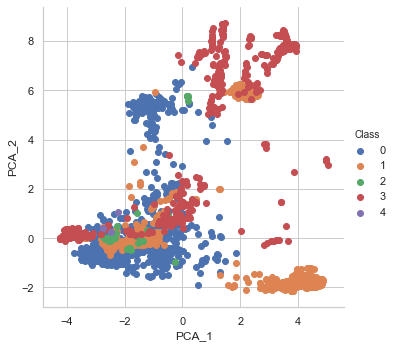

In [63]:
#pca plot
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#PCA implementation of an algorithm
from sklearn import decomposition

import seaborn as sns
import matplotlib.pyplot as plt

pca = decomposition.PCA(n_components=3)
pca_data = pca.fit_transform(X_tr)

# pca_reduced will contain the 2-d projects of simple data
print("pca matrix = ", pca_data.shape)

print(pca_data.shape,y_tr.shape)
8
pca_data=pd.DataFrame(pca_data, columns=("PCA_1", "PCA_2", "PCA_3"))


label=pd.DataFrame(data=y_tr)

pca_df=pd.concat([pca_data,label],axis=1)

# creating a new data fram which help us in ploting the result data
print(pca_df.head())

#randomly sample only 5 %age of the points from the original dataframe for visualization
small_df=pca_df.sample(frac=0.05, replace=False, random_state=1)



sns_plot=sns.FacetGrid(small_df, hue="Class", height=5).map(plt.scatter, 'PCA_1', 'PCA_2').add_legend()
plt.show()



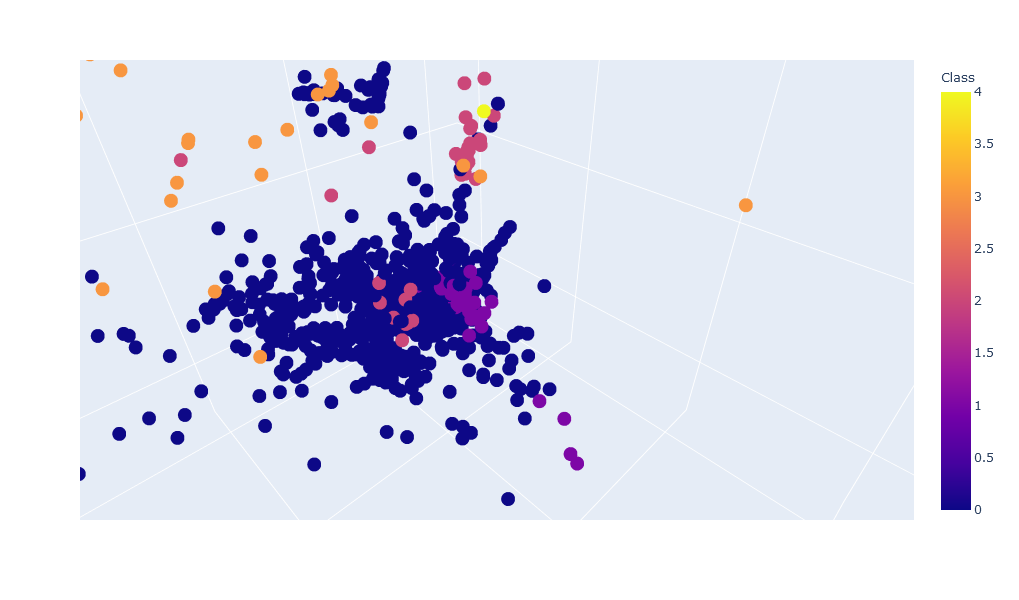

In [64]:
#3d plot on pca
import plotly.express as px

fig = px.scatter_3d(small_df, x="PCA_1", y="PCA_2", z="PCA_3",
                    color="Class")
fig.show()

StandardScaler(copy=True, with_mean=True, with_std=True)
(125973, 122) (125973,)
(1260,) (1260, 122)
(1260, 4)


/Users/mv96/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



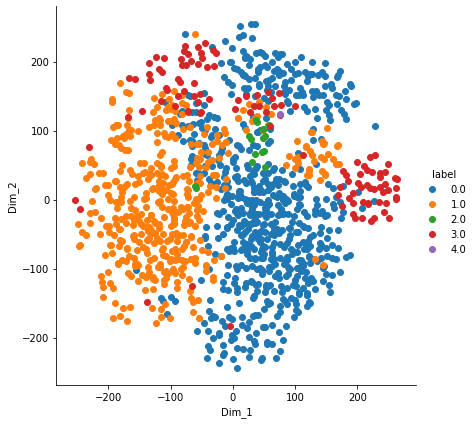

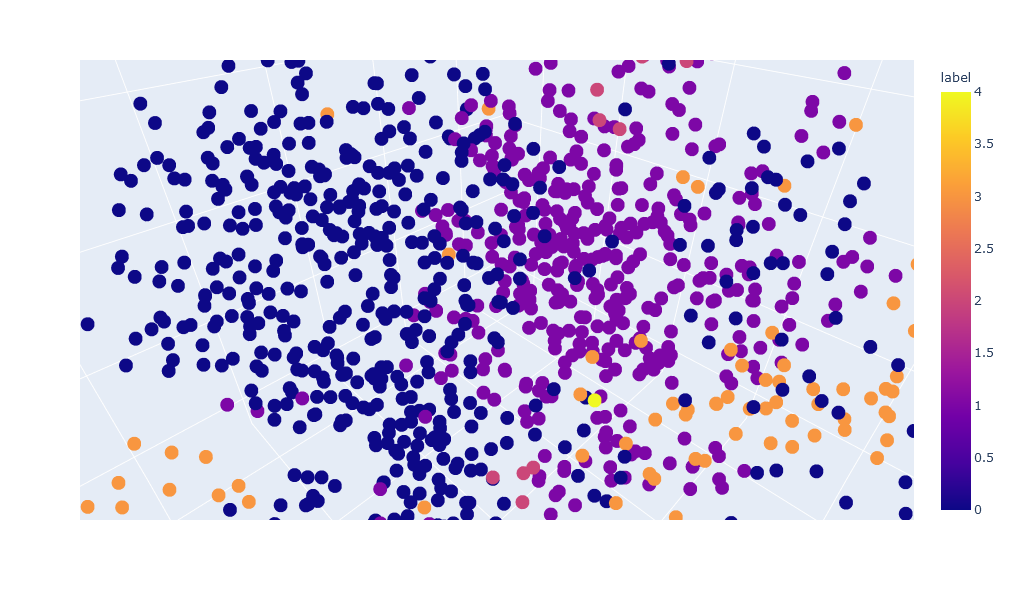

In [13]:
#tsne based visualization
from joblib import dump, load
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# https://github.com/pavlin-policar/fastTSNE you can try this also, this version is little faster than sklearn 
X_tr=load('X_tr.joblib') 
labels=load("y_tr.joblib")

#now we apply standard scaling 
##############################################################
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
# https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print(scale.fit(X_tr))
X_tr=scale.fit_transform(X_tr)


print(X_tr.shape,labels.shape)
#################################################################


from sklearn.manifold import TSNE
model = TSNE(n_components=3, random_state=0 ,n_iter=5000,perplexity=50,n_jobs=-1) #random states for reproducable results
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000(n_iter)
#labels=copy.deepcopy(y_tr)

tsne_data = np.vstack((X_tr.T, labels)).T


tsne_df = pd.DataFrame(data=tsne_data)
#randomly sample only 1 %age of the points from the original dataframe
tsne_df=tsne_df.sample(frac=0.01, replace=False, random_state=1)

labels= tsne_df.iloc[:,-1]
tsne_df = tsne_df.iloc[:, :-1]

print(labels.shape,tsne_df.shape)

tsne_data = model.fit_transform(tsne_df)

tsne_data = np.vstack((tsne_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "Dim_3","label"))
print(tsne_df.shape)

# Ploting the result of tsne
sns_plot=sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
sns_plot.savefig("output_tsne.png")


import plotly.express as px

fig = px.scatter_3d(tsne_df, x='Dim_1', y='Dim_2', z='Dim_3',
                    color='label')
fig.show()




# run knn algorithm 

In [157]:
# Loading the joblibs
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

# Calculating class priors for assigning the weights
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]
for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)

(125973, 122) (125973,) (22544, 122) (22544,)
[0.5345828074269883, 0.3645781238836894, 0.09252776388591206, 0.007898517936383194, 0.00041278686702706137]


In [158]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

#k nearest neigbour based approach
myList=range(1,50)
neighbors = list(filter(lambda x: x % 2 != 0, myList)) #neighbours is a list of numbers like 1,3,5....49

# Defing the initial parameters. Building KNN classifier
clf_1=KNeighborsClassifier(algorithm="brute")

# Parameters that have to be tuned for optimum results
tuned_parameters = {'n_neighbors': neighbors,"weights":["uniform","distance"],"metric":["cosine","euclidean","manhattan"]}

# Using "macro" F1 for Multi class classification
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1 = GridSearchCV(clf_1, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1.fit(X_tr, y_tr)

best_k=model_1.best_params_["n_neighbors"]
best_distance_type=model_1.best_params_["weights"]
best_distance_metric=model_1.best_params_["metric"]

print(best_k,best_distance_metric,best_distance_type)
print("\nthis is the hyper parameter optimized k value: {} and this is the distance metric used: {}".format(best_k,best_distance_metric))


y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

# Plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("KNN confusion matrix using brute:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

# run Naive bayes algorithm

In [4]:
# Same as KNN
from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')


print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
# Setting Class piors for Imbalanced data
priors=list(y_tr.value_counts())
eles=[]
for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)

(125973, 122) (125973,) (22544, 122) (22544,)
[0.5345828074269883, 0.3645781238836894, 0.09252776388591206, 0.007898517936383194, 0.00041278686702706137]


In [5]:
numerical_features_train=list(X_tr.columns[:27])
print(numerical_features_train)
categorical_features_train=list(X_tr.columns[27:27+11])
print(categorical_features_train)
one_hot_encoded_features_train=list(X_tr.columns[27+11:])
print(one_hot_encoded_features_train)

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level']
['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login']
['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 's

In [6]:
numerical_features_test=list(X_test.columns[:27])
print(numerical_features_test)
categorical_features_test=list(X_test.columns[27:27+11])
print(categorical_features_test)
one_hot_encoded_features_test=list(X_test.columns[27+11:])
print(one_hot_encoded_features_test)

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level']
['land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login']
['protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 's

In [7]:
numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

(125973, 27)
(125973, 11)
(125973, 84)
(22544, 27)
(22544, 11)
(22544, 84)


In [8]:
#now we apply standard scaling to make features look like gaussian

from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
#https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print(scale.fit(numerical_features_train))
num_features_train_std=scale.fit_transform(numerical_features_train)

#transformingthe testing data so that it has the same mean and variance as we applied in train
num_features_test_std=scale.fit_transform(numerical_features_test)


print(numerical_features_train.shape,numerical_features_test.shape)

StandardScaler(copy=True, with_mean=True, with_std=True)
(125973, 27) (22544, 27)


# Gaussian Naive-Bayes

(125973, 27) (125973,) (22544, 27) (22544,)
[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9]
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

0.9

this is the hyper parameter optimized alpha value: 0.9

this is my models accuracy :0.7176632363378282
naive bayes confusion matrix using tuned alphas:

tn:9086
fp:464
fn:1883
tp:5351

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.5101718510626114
my accuracy score on test:  0.7176632363378282


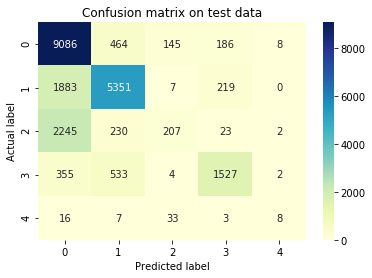

In [10]:
#get the naive bayes running
print(numerical_features_train.shape,y_tr.shape,numerical_features_test.shape,y_test.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #for confusion matrix
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score


# Defing the initial parameters. Building NB classifier
clf_2=GaussianNB() 
alphas=[x*0.1 for x in range(1,50)]
print(alphas)

# Parameters that have to be tuned for optimum results
tuned_parameters = {'var_smoothing': alphas}

# F1 as macro for multi-class classification
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1_a = GridSearchCV(clf_2, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1_a.fit(num_features_train_std, y_tr)

best_alpha=model_1_a.best_params_["var_smoothing"]

print(best_alpha)
print("\nthis is the hyper parameter optimized alpha value: {}".format(best_alpha))


y_pred=model_1_a.predict(num_features_test_std)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("naive bayes confusion matrix using tuned alphas:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)





# Compliment Naive-Bayes

(125973, 11) (125973,) (22544, 11) (22544,)
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1513s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 242 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 314 tas

3.5

this is the hyper parameter optimized alpha value: 3.5

this is my models accuracy :0.480083392476934
naive bayes confusion matrix using tuned alphas:

tn:9773
fp:52
fn:7405
tp:55

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.3196789290556465
my accuracy score on test:  0.480083392476934


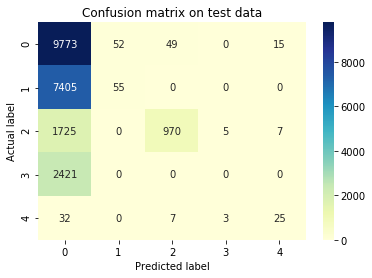

In [11]:
#get the naive bayes running over categorical data 
print(categorical_features_train.shape,y_tr.shape,categorical_features_test.shape,y_test.shape)

from sklearn.naive_bayes import ComplementNB
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

priors=list(y_tr.value_counts())
priors = list(map(lambda x: x/sum(priors), priors))

# Defing the initial parameters. Building Complement NB classifier
clf_2=ComplementNB() 
alphas=[x*0.1 for x in range(1,50)]

# Parameters that have to be tuned for optimum results
tuned_parameters = {'alpha': alphas}

f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1_b = GridSearchCV(clf_2, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1_b.fit(categorical_features_train, y_tr)

best_alpha=model_1_b.best_params_["alpha"]

print(best_alpha)
print("\nthis is the hyper parameter optimized alpha value: {}".format(best_alpha))


y_pred=model_1_b.predict(categorical_features_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("naive bayes confusion matrix using tuned alphas:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)






# Bernoulli Naive-Bayes

(125973, 84) (125973,) (22544, 84) (22544,)
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

4.6000000000000005

this is the hyper parameter optimized alpha value: 4.6000000000000005

this is my models accuracy :0.6589779985805536
naive bayes confusion matrix using tuned alphas:

tn:8751
fp:7
fn:1643
tp:5091

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.3722169061385846
my accuracy score on test:  0.6589779985805536


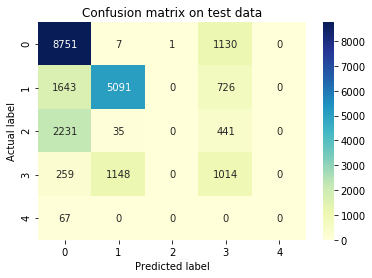

In [12]:
#get the naive bayes running over boolean categorical data 
print(one_hot_encoded_features_train.shape,y_tr.shape,one_hot_encoded_features_test.shape,y_test.shape)

from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

# Defing the initial parameters. Building Bernoulli NB classifier
clf_2=BernoulliNB()
alphas=[x*0.1 for x in range(1,50)]

# Parameters that have to be tuned for optimum results
tuned_parameters = {'alpha': alphas}

# F1 as macro for Multi Class
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1_c = GridSearchCV(clf_2, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1_c.fit(one_hot_encoded_features_train, y_tr)

best_alpha=model_1_c.best_params_["alpha"]

print(best_alpha)
print("\nthis is the hyper parameter optimized alpha value: {}".format(best_alpha))


y_pred=model_1_c.predict(one_hot_encoded_features_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("naive bayes confusion matrix using tuned alphas:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)







# Gaussian Naive-Bayes with all features

In [1]:
# Same as above. Put same code for direct run

from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]

for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)


numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

(125973, 122) (125973,) (22544, 122) (22544,)
[0.5345828074269883, 0.3645781238836894, 0.09252776388591206, 0.007898517936383194, 0.00041278686702706137]
(125973, 27)
(125973, 11)
(125973, 84)
(22544, 27)
(22544, 11)
(22544, 84)


In [2]:
#now we apply standard scaling to make features look like gaussian

from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
#https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print(scale.fit(numerical_features_train))
num_features_train_std=scale.fit_transform(numerical_features_train)

#transformingthe testing data so that it has the same mean and variance as we applied in train
num_features_test_std=scale.fit_transform(numerical_features_test)


print(numerical_features_train.shape,numerical_features_test.shape)

import pandas as pd
import numpy as np

train_df=np.hstack([num_features_train_std,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([num_features_test_std,categorical_features_test,one_hot_encoded_features_test])
print(train_df.shape)
print(test_df.shape)

StandardScaler()
(125973, 27) (22544, 27)
(125973, 122)
(22544, 122)


(125973, 27) (125973,) (22544, 27) (22544,)
Fitting 10 folds for each of 49 candidates, totalling 490 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

0.6808594478102418
1.0

this is the hyper parameter optimized alpha value: 1.0

this is my models accuracy :0.7166873669268985
naive bayes confusion matrix using tuned alphas:

tn:9153
fp:447
fn:1977
tp:5299

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.5202248467014893
my accuracy score on test:  0.7166873669268985


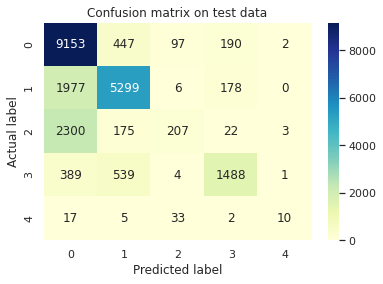

In [24]:
#get the naive bayes running
print(numerical_features_train.shape,y_tr.shape,numerical_features_test.shape,y_test.shape)

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score


# Defing the initial parameters. Building Gausian Naive-Bayes classifier
clf_2=GaussianNB() 
alphas=[x*0.1 for x in range(1,50)]

# Parameters that have to be tuned for optimum results
tuned_parameters = {'var_smoothing': alphas}

# F1 as Macro for Multi class
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1 = GridSearchCV(clf_2, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1.fit(train_df, y_tr)

best_alpha=model_1.best_params_["var_smoothing"]
print(model_1.best_score_)
print(best_alpha)
print("\nthis is the hyper parameter optimized alpha value: {}".format(best_alpha))


y_pred=model_1.predict(test_df)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("naive bayes confusion matrix using tuned alphas:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)







In [26]:
from joblib import load
model_1=load("NB.joblib")
print(model_1.get_params)

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.1, 0.2, 0.30000000000000004, 0.4,
                                           0.5, 0.6000000000000001,
                                           0.7000000000000001, 0.8, 0.9, 1.0,
                                           1.1, 1.2000000000000002, 1.3,
                                           1.4000000000000001, 1.5, 1.6,
                                           1.7000000000000002, 1.8,
                                           1.9000000000000001, 2.0, 2.1, 2.2,
                                           2.3000000000000003,
                                           2.4000000000000004, 2.5, 2.6, 2.7,
                                           2.8000000000000003,
                                           2.9000000000000004, 3.0, ...]},
             scoring=make_scorer(f1_score, average=macro), verbose=10)>


In [25]:
from joblib import load
model_1=load("NB.joblib")
print(model_1.best_params_)

{'var_smoothing': 1.0}


# Logistic Regression




In [105]:
# Same code as above for the intermediate run or direct run
from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]

for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)


numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

#now we apply standard scaling

from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
#https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print(scale.fit(numerical_features_train))
num_features_train_std=scale.fit_transform(numerical_features_train)

#transformingthe testing data so that it has the same mean and variance as we applied in train
num_features_test_std=scale.fit_transform(numerical_features_test)


print(numerical_features_train.shape,numerical_features_test.shape)

import pandas as pd
import numpy as np

train_df=np.hstack([num_features_train_std,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([num_features_test_std,categorical_features_test,one_hot_encoded_features_test])

(125973, 122) (125973,) (22544, 122) (22544,)
[0.5345828074269883, 0.3645781238836894, 0.09252776388591206, 0.007898517936383194, 0.00041278686702706137]
(125973, 27)
(125973, 11)
(125973, 84)
(22544, 27)
(22544, 11)
(22544, 84)
StandardScaler(copy=True, with_mean=True, with_std=True)
(125973, 27) (22544, 27)


In [106]:
X_tr=train_df
X_test=test_df

In [107]:
#get the logistic regression running
print(numerical_features_train.shape,y_tr.shape,numerical_features_test.shape,y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score


# Defing the initial parameters. Building Bernoulli NB classifier
clf_2=LogisticRegression(random_state=0,class_weight="balanced",solver="saga") 

C_vals=np.logspace(-3,3,20) #trying log space really helps

penalties=["l1","l2","elasticnet"]

l1_ratios=[x*0.1 for x in range(1,10)]

# Paramters to get tuned for optimum results
tuned_parameters = {'C': C_vals,"penalty":penalties,"l1_ratio":l1_ratios}

# F1 as macro for Multi-Class classification
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1 = GridSearchCV(clf_2, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1.fit(train_df, y_tr)

best_c=model_1.best_params_["C"]
best_penalty=model_1.best_params_["penalty"]
best_ratio=model_1.best_params_["l1_ratio"]
print(model_1.best_score_)
print(best_c,best_penalty,best_ratio)
print("\nthis is the hyper parameter optimized C value: {} , penalty :{}, l ratio: {}".format(best_c,penalty,))


y_pred=model_1.predict(test_df)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("Logistic Regression matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

(125973, 27) (125973,) (22544, 27) (22544,)
Fitting 10 folds for each of 540 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

# Support Vector Machines

In [4]:
# Same code till preprocessing as above for an intermediate run

from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]

for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)


numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

#now we apply standard scaling

from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #we will later use this function to transform the testing data to the same scale

# Scaling down both train and test data set
#https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models
print(scale.fit(numerical_features_train))
num_features_train_std=scale.fit_transform(numerical_features_train)

#transformingthe testing data so that it has the same mean and variance as we applied in train
num_features_test_std=scale.fit_transform(numerical_features_test)


print(numerical_features_train.shape,numerical_features_test.shape)

import pandas as pd
import numpy as np

train_df=np.hstack([num_features_train_std,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([num_features_test_std,categorical_features_test,one_hot_encoded_features_test])

X_tr=train_df
X_test=test_df

(125973, 122) (125973,) (22544, 122) (22544,)
[0.5345828074269883, 0.3645781238836894, 0.09252776388591206, 0.007898517936383194, 0.00041278686702706137]
(125973, 27)
(125973, 11)
(125973, 84)
(22544, 27)
(22544, 11)
(22544, 84)
StandardScaler(copy=True, with_mean=True, with_std=True)
(125973, 27) (22544, 27)


In [6]:
#svm with gridsearch
print(numerical_features_train.shape,y_tr.shape,numerical_features_test.shape,y_test.shape)

from sklearn.svm import SVC
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score


# Defing the initial parameters. Building SVM classifier
clf = SVC(class_weight="balanced") 

C_vals=np.logspace(-3,3,20) #trying log space really helps

kernels=["linear", "poly", "rbf", "sigmoid"]

# Paramters to get tuned for optimum results
tuned_parameters = {'C': C_vals,"kernel":kernels}

# F1 Score as Macro for Multi-Class classification
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1 = GridSearchCV(clf, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1.fit(X_tr, y_tr)

best_c=model_1.best_params_["C"]
best_penalty=model_1.best_params_["kernel"]
print(model_1.best_score_)
print(best_c,best_penalty,best_ratio)
print("\nthis is the hyper parameter optimized C value: {} , penalty :{}".format(best_c,penalty))
y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("Support Vector Machines confusion matrix using tuned C value:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

(125973, 27) (125973,) (22544, 27) (22544,)
Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

# Decision Tree

In [4]:
# Same code as above till pre-processing for an intermediate run

from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(list(X_tr.columns))
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]

for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)


numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

#no standardization required for decision trees

import pandas as pd
import numpy as np

train_df=np.hstack([numerical_features_train,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([numerical_features_test,categorical_features_test,one_hot_encoded_features_test])

print(train_df.shape,y_tr.shape,y_test.shape,test_df.shape)
#assign train and test 
X_tr=train_df
X_test=test_df

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'ser

(125973, 27) (125973,) (22544, 27) (22544,)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    3.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    4.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    4.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    4.8s finished


0.5867959522351794
3

this is the hyper parameter optimized max depth value: 3

this is my models accuracy :0.5951472675656494
naive bayes confusion matrix using tuned alphas:

tn:9065
fp:1
fn:739
tp:1330

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.41846877090005774
my accuracy score on test:  0.5951472675656494


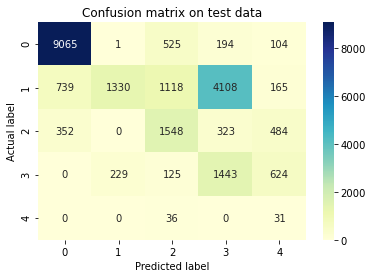

In [5]:
# Decision trees does not require standard scaling
print(numerical_features_train.shape,y_tr.shape,numerical_features_test.shape,y_test.shape)

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

# Defing the initial parameters. Building Decidsion Trees classifier
clf = DecisionTreeClassifier(max_features=122,class_weight="balanced",random_state=1) #takes into prior probabilites into account

max_depths=[x for x in range(2,4)]

#Parameter to get tuned
tuned_parameters = {'max_depth': max_depths}

# F1 as macro for multi-class
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1 = GridSearchCV(clf, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1.fit(X_tr, y_tr)

best_depth=model_1.best_params_["max_depth"]
print(model_1.best_score_)
print(best_depth)
print("\nthis is the hyper parameter optimized max depth value: {}".format(best_depth))
y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("naive bayes confusion matrix using tuned alphas:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

this is the decision tree with the accuracy of :59.51472675656494%


[Text(167.4, 190.26, 'X[26] <= 14.5\ngini = 0.8\nsamples = 125973\nvalue = [25194.6, 25194.6, 25194.6, 25194.6, 25194.6]'),
 Text(83.7, 135.9, 'X[17] <= 10.5\ngini = 0.552\nsamples = 3669\nvalue = [289.572, 542.545, 23092.94, 2036.146, 25194.6]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 181.0\ngini = 0.288\nsamples = 1112\nvalue = [99.143, 58.698, 3114.508, 1232.063, 22772.042]'),
 Text(20.925, 27.180000000000007, 'gini = 0.674\nsamples = 895\nvalue = [76.321, 36.206, 1772.484, 1193.155, 1453.535]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.118\nsamples = 217\nvalue = [22.822, 22.492, 1342.024, 38.907, 21318.508]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 29.0\ngini = 0.288\nsamples = 2557\nvalue = [190.429, 483.847, 19978.432, 804.083, 2422.558]'),
 Text(104.625, 27.180000000000007, 'gini = 0.351\nsamples = 367\nvalue = [38.535, 63.087, 227.891, 291.804, 2422.558]'),
 Text(146.475, 27.180000000000007, 'gini = 0.1\nsamples = 2190\nvalue = [151.894, 420.76,

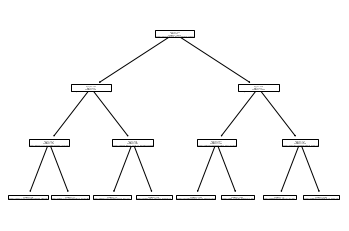

In [6]:
# we are limiting our depth uptil 10 max nodes because this reduces the interpretebility
best_tree=model_1.best_estimator_
from sklearn import tree
tree.export_graphviz(best_tree)
print("this is the decision tree with the accuracy of :{}%".format(acc*100))
tree.plot_tree(best_tree) 



In [ ]:
df=pd.read_csv("preprocessed_data.csv")
data_feature_names=list(df.columns)
print(len(data_feature_names))

In [ ]:
#refer-https://scikit-learn.org/stable/modules/tree.html
import graphviz 
from subprocess import check_call
mapping_dict={'Normal':0, 'DoS':1, 'R2L':2, 'Probe':3, 'U2R':4}
tmp=list(mapping_dict)

dot_data = tree.export_graphviz(best_tree, out_file=None, 
                     feature_names=data_feature_names,  
                     class_names=tmp,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph


# Random Forest

Fitting 10 folds for each of 70 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20

0.9704362683669572
460

this is the hyper parameter optimized number of trees value: 460

this is my models accuracy :0.7499556422995032
naive bayes confusion matrix using tuned alphas:

tn:9621
fp:67
fn:1632
tp:5775

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.536765426300927
my accuracy score on test:  0.7499556422995032


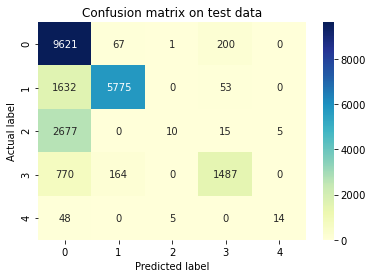

In [8]:
#Ensembling based on Random forest 
#random forest = bagging K large depth decision trees with Row sampling and column Sampling

from sklearn import metrics #for confusion matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score


#full rowSsampling and col sampling by rootn
# Defing the initial parameters. Building Random Forest classifier
clf = RandomForestClassifier(random_state=1) 

n_estimators=[x for x in range(150,500,10)]

class_weigting_types=["balanced","balanced_subsample"]

# Parameters to be tuned for optimum results
tuned_parameters = {'n_estimators': n_estimators,"class_weight":class_weigting_types}

# F1-Score is macro for Multi-Class classification
f1 = make_scorer(f1_score , average='macro')

# Defining the search space with the help of GridSearchCV where cross fold validation=10
model_1 = GridSearchCV(clf, tuned_parameters, scoring = f1, cv=10,n_jobs=-1, verbose=10)
model_1.fit(X_tr, y_tr)

best_estimator_counts=model_1.best_params_["n_estimators"]
best_weighing_scheme=model_1.best_params_["class_weight"]

print(model_1.best_score_)
print(best_estimator_counts)
print("\nthis is the hyper parameter optimized number of trees value: {}".format(best_estimator_counts))

y_pred=model_1.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("naive bayes confusion matrix using tuned alphas:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

# XG Boost

In [12]:
# Same code till pre-processing for an intermediate run.
# Standard scaling not required

from joblib import dump, load
X_tr = load('X_tr.joblib') 
y_tr = load('y_tr.joblib')
X_test = load('X_test.joblib')
y_test = load('y_test.joblib')

print(list(X_tr.columns))
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)
priors=list(y_tr.value_counts())
eles=[]

for element in priors:
    prob=element/125973
    eles.append(prob)
print(eles)


numerical_features_train=X_tr.iloc[:,:27]
print(numerical_features_train.shape)
categorical_features_train=X_tr.iloc[:,27:27+11]
print(categorical_features_train.shape)
one_hot_encoded_features_train=X_tr.iloc[:,27+11:]
print(one_hot_encoded_features_train.shape)

numerical_features_test=X_test.iloc[:,:27]
print(numerical_features_test.shape)
categorical_features_test=X_test.iloc[:,27:27+11]
print(categorical_features_test.shape)
one_hot_encoded_features_test=X_test.iloc[:,27+11:]
print(one_hot_encoded_features_test.shape)

#no standardization required for decision trees

import pandas as pd
import numpy as np

train_df=np.hstack([numerical_features_train,categorical_features_train,one_hot_encoded_features_train])
test_df=np.hstack([numerical_features_test,categorical_features_test,one_hot_encoded_features_test])

print(train_df.shape,y_tr.shape,y_test.shape,test_df.shape)
#assign train and test 
X_tr=train_df
X_test=test_df

['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level', 'land', 'wrong_fragment', 'urgent', 'num_failed_logins', 'logged_in', 'root_shell', 'su_attempted', 'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'ser


this is my models accuracy :0.7954222853087296
XG Boost confusion matrix:

tn:9446
fp:67
fn:1141
tp:6227

The F1 score is the harmonic mean between the precision and recall... 
my f1 score on test:  0.6454282820070695
my accuracy score on test:  0.7954222853087296


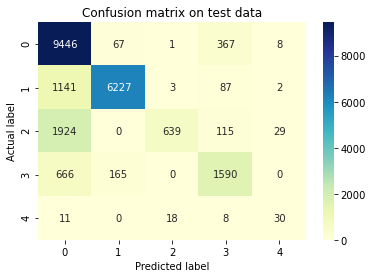

In [14]:
#boosting based algotihm-GBDT, but we will use xgboost becuase it has row sampling and column sampling
#bagging and boosting 

#let's do a normal implementation of xgboost


# import XGBClassifier
from xgboost import XGBClassifier

# instantiate the classifier 
xgb_clf = XGBClassifier()

# fit the classifier to the training data
xgb_clf.fit(X_tr, y_tr)

y_pred=xgb_clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("XG Boost confusion matrix:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall... ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

# CAT Boost

In [7]:
!pip install catboost

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Loading training set into dataframe
df = pd.read_csv('./KDDTrain+.txt', header=None)
print(df.shape)
#Loading testing set into dataframe query points
qp = pd.read_csv('./KDDTest+.txt', header=None)
print(qp.shape)
#Reset column names for training set
#obtained by domain knowledge
#present in the arff file
df.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
df.head()
#Reset column names for testing set
#obtained by domain knowledge
qp.columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
'num_access_files', 'num_outbound_cmds', 'is_host_login',
'is_guest_login', 'count', 'srv_count', 'serror_rate',
'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
'dst_host_srv_rerror_rate', 'subclass', 'difficulty_level']
qp.head()
#check for NAN values
print(df.isnull().values.any())
print(qp.isnull().values.any())
#combining the two data
combined_data = pd.concat([df,qp])
combined_data.shape
#these are all the attack categories
# Here we are printing the label column which is denoted from the subclass in the data.
# Also printing the unique values only with the help of unique function.
print(combined_data['subclass'].unique())
#Dropping subclass column for training set
y = combined_data.pop('subclass') #these are basically the labels
#let's now check the shape
combined_data.shape
#datafile_2 
#classifying broadly the attack types into roughly 3 categories

#Fixing labels for training set
classlist = []
category_1 = ("apache2","back","land","neptune","mailbomb","pod","processtable","smurf","teardrop","udpstorm","worm")
category_2 = ("ipsweep","mscan","nmap","portsweep","saint","satan")
category_3 = ("buffer_overflow","loadmodule","perl","ps","rootkit","sqlattack","xterm")
category_4 = ("ftp_write","guess_passwd","httptunnel","imap","multihop","named","phf","sendmail","Snmpgetattack","spy","snmpguess","warezclient","warezmaster","xlock","xsnoop")

for item in y:
    if item in category_1:
        classlist.append("DoS") #because category 1 denotes dos
    elif item in category_2:
        classlist.append("Probe") #category 2 denotes probe type 
    elif item in category_3:
        classlist.append("U2R") #this is some third type
    elif item in category_4:
        classlist.append("R2L")#fourth type
    else:
        classlist.append("Normal")#finally the majority points
        
#once we have generated the cheklist we wanna add this to the original data frame
#these now the data should have only 5 categories
combined_data["Class"] = classlist
#let's now check the shape
combined_data.shape

#print columns now
print("subclass" in list( combined_data.columns)) #subclass is absent
print("Class" in list( combined_data.columns)) #class is present
from sklearn.utils import class_weight
cw = list(class_weight.compute_class_weight('balanced',
                                             np.unique(combined_data['Class']),
                                             combined_data['Class']))
print(cw)

#these are all the attack categories
print(combined_data['Class'].unique())

print(list(combined_data.columns))
print(combined_data.shape)

x=combined_data.iloc[:,:43]
y=combined_data.iloc[:,-1]

def label_encoding(x):
    mapping_dict={'Normal':0, 'DoS':1, 'R2L':2, 'Probe':3, 'U2R':4}
    return mapping_dict[x]

combined_data["Class"]=combined_data["Class"].map(label_encoding)

print(x.shape,y.shape)

#select which to choose between scaing and standardization
#just select all the columns with numerical entries
import matplotlib.pyplot as plt
t_combined_data=combined_data.select_dtypes(include=[np.float64,np.int64])

print(combined_data.shape,t_combined_data.shape)

x=t_combined_data.iloc[:,:43]
y=t_combined_data.iloc[:,-1]

combined_data.pop('num_outbound_cmds')

x=combined_data.iloc[:,:42]
y=combined_data.iloc[:,-1]
x.pop("Class")
print(x.shape)

x=combined_data.iloc[:,:42]
y=combined_data.iloc[:,-1]
x.pop("Class")
print(x.shape)

categorical_string=['protocol_type', 'service', 'flag']

#numerical_features
possible_numerical=['duration', 'src_bytes', 'dst_bytes', 'hot', 'num_compromised', 'num_root', 'num_file_creations', 
                    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 
                    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level',
                    'num_failed_logins','urgent','wrong_fragment','num_shells', 'num_access_files']

#categorical features
possible_categorical=['land', 'logged_in', 'root_shell',
    'su_attempted', 'is_host_login', 'is_guest_login']


#look up table
element_count={}

for element in combined_data:
    element_count[element]=combined_data[element].nunique()

print(element_count)
print(len(element_count))

categorical_feat=categorical_string+possible_categorical
print(len(categorical_feat))



(125973, 43)
(22544, 43)
False
False
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl' 'saint' 'mscan' 'apache2' 'snmpgetattack'
 'processtable' 'httptunnel' 'ps' 'snmpguess' 'mailbomb' 'named'
 'sendmail' 'xterm' 'worm' 'xlock' 'xsnoop' 'sqlattack' 'udpstorm']
False
True
[0.556378893738176, 0.38459964781437744, 2.1100660652127585, 8.023608860075635, 249.60840336134453]
['Normal' 'DoS' 'R2L' 'Probe' 'U2R']
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass classes=['DoS' 'Normal' 'Probe' 'R2L' 'U2R'], y=0        Normal
1        Normal
2           DoS
3        Normal
4        Normal
          ...  
22539    Normal
22540    Normal
22541       DoS
22542    Normal
22543     Probe
Name: Class, Length: 148517, dtype: object as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


(148517, 43) (148517,)
(148517, 43) (148517, 40)
(148517, 41)
(148517, 41)
{'duration': 3424, 'protocol_type': 3, 'service': 70, 'flag': 11, 'src_bytes': 3601, 'dst_bytes': 10401, 'land': 2, 'wrong_fragment': 3, 'urgent': 4, 'hot': 29, 'num_failed_logins': 6, 'logged_in': 2, 'num_compromised': 96, 'root_shell': 2, 'su_attempted': 3, 'num_root': 91, 'num_file_creations': 36, 'num_shells': 4, 'num_access_files': 10, 'is_host_login': 2, 'is_guest_login': 2, 'count': 512, 'srv_count': 512, 'serror_rate': 99, 'srv_serror_rate': 94, 'rerror_rate': 98, 'srv_rerror_rate': 95, 'same_srv_rate': 101, 'diff_srv_rate': 101, 'srv_diff_host_rate': 87, 'dst_host_count': 256, 'dst_host_srv_count': 256, 'dst_host_same_srv_rate': 101, 'dst_host_diff_srv_rate': 101, 'dst_host_same_src_port_rate': 101, 'dst_host_srv_diff_host_rate': 75, 'dst_host_serror_rate': 101, 'dst_host_srv_serror_rate': 101, 'dst_host_rerror_rate': 101, 'dst_host_srv_rerror_rate': 101, 'difficulty_level': 22, 'Class': 5}
42
9


In [9]:
X_tr=x.iloc[:125973]
y_tr=y[:125973]
X_test=x.iloc[125973:]
y_test=y[125973:]
print(X_tr.shape,y_tr.shape,X_test.shape,y_test.shape)

(125973, 41) (125973,) (22544, 41) (22544,)


Learning rate set to 0.10126
0:	learn: 1.2555715	total: 310ms	remaining: 5m 10s
10:	learn: 0.3281962	total: 2.52s	remaining: 3m 46s
20:	learn: 0.1313669	total: 4.75s	remaining: 3m 41s
30:	learn: 0.0622841	total: 6.98s	remaining: 3m 38s
40:	learn: 0.0325908	total: 9.17s	remaining: 3m 34s
50:	learn: 0.0210994	total: 11.5s	remaining: 3m 33s
60:	learn: 0.0152976	total: 13.9s	remaining: 3m 34s
70:	learn: 0.0122220	total: 16.3s	remaining: 3m 33s
80:	learn: 0.0102243	total: 18.8s	remaining: 3m 33s
90:	learn: 0.0089381	total: 21.1s	remaining: 3m 30s
100:	learn: 0.0077557	total: 23.6s	remaining: 3m 29s
110:	learn: 0.0067474	total: 26s	remaining: 3m 27s
120:	learn: 0.0061910	total: 28.4s	remaining: 3m 26s
130:	learn: 0.0056704	total: 30.8s	remaining: 3m 24s
140:	learn: 0.0053049	total: 33.3s	remaining: 3m 22s
150:	learn: 0.0047481	total: 35.7s	remaining: 3m 20s
160:	learn: 0.0044155	total: 38.3s	remaining: 3m 19s
170:	learn: 0.0042134	total: 40.8s	remaining: 3m 17s
180:	learn: 0.0039577	total: 4

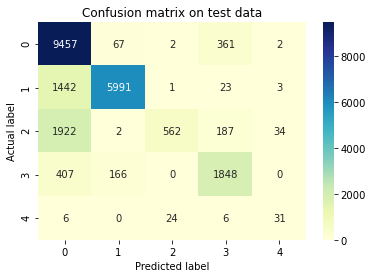

In [10]:
from sklearn import metrics #for confusion matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, accuracy_score

from catboost import CatBoostClassifier

# Direct model implementation
model=CatBoostClassifier()
model.fit(X_tr,y_tr,cat_features=categorical_feat,verbose=10)

y_pred=model.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("\nthis is my models accuracy :{}".format(acc))

#plotting the confusion matrix from the data
confusion_matrix= metrics.confusion_matrix(y_test,y_pred)
(tn, fp, fn, tp)=(confusion_matrix[0][0],confusion_matrix[0][1],confusion_matrix[1][0],confusion_matrix[1][1])
print("catboost confusion matrix using brute:")
print("\ntn:%d\nfp:%d\nfn:%d\ntp:%d\n"%(tn, fp, fn, tp))

p = sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix on test data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("="*20)
print("The F1 score is the harmonic mean between the precision and recall hence we really don't need to calculate both of them ")
print("my f1 score on test: ",f1_score(y_test,y_pred ,average="macro"))
print("my accuracy score on test: ",accuracy_score(y_test,y_pred))
print("="*20)

In [11]:
np.array(model.get_feature_importance(prettified=True))

array([['src_bytes', 19.50390509077058],
       ['service', 12.149847554687957],
       ['difficulty_level', 6.130253330175179],
       ['protocol_type', 6.0042803333410815],
       ['count', 5.84277343216461],
       ['dst_host_diff_srv_rate', 5.576692525385065],
       ['dst_host_srv_count', 4.442475309499176],
       ['dst_host_same_src_port_rate', 4.3821232628559486],
       ['dst_bytes', 3.8765368619596994],
       ['flag', 3.015785587412942],
       ['dst_host_same_srv_rate', 2.871254430311953],
       ['dst_host_rerror_rate', 2.8142074578287466],
       ['dst_host_serror_rate', 2.667172960609174],
       ['srv_count', 2.5917178355492188],
       ['dst_host_count', 2.1549126720618457],
       ['serror_rate', 2.0634210689993315],
       ['same_srv_rate', 1.969589249461923],
       ['diff_srv_rate', 1.7688423511550397],
       ['dst_host_srv_serror_rate', 1.7682061421391533],
       ['srv_serror_rate', 1.6305675065337446],
       ['dst_host_srv_diff_host_rate', 1.454072048924656],
